In [4]:
import pandas as pd
import numpy as np
import glob
from scipy import stats

In [5]:
print(pd.__version__)

1.4.1


In [6]:
carpeta="data/training_textos_hipotesis_salida/"

In [7]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [8]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/training_textos_hipotesis_salida/pTEST_new_0.2_9.csv.pickle'

In [9]:
df= pd.read_pickle(a[0])
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,ADJ}, two{two,NUM}, humans{human,NO...","[NULL{null,ADJ}, two{two,NUM}, people{people,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.16620766, 0.01119...","[0.101916574, 0.40303633, 0.49504718]","[0.0, 0.0, 1.0]",0,9686,contradiction,contradiction
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.01616...","[0.0032416224, 0.034757353, 0.9620011]","[0.0, 0.0, 1.0]",0,2051,contradiction,contradiction
2,2,"[NULL{null,PROPN}, sled{sl,VERB}, and{and,CCON...","[NULL{null,ADJ}, there{there,ADV}, are{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.011193112, 0.0868...","[0.930699, 0.051939595, 0.017361308]","[1.0, 0.0, 0.0]",0,2336,entailment,entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, dad{dad,NOUN}, wi...","[NULL{null,PROPN}, a{a,DET}, dad{dad,NOUN}, an...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.21444096, 0.0073...","[0.028838182, 0.72457194, 0.24658988]","[0.0, 0.0, 1.0]",0,7513,neutral,contradiction
4,4,"[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, ta...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, is...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1816948, 0.01616...","[0.7620637, 0.19679011, 0.04114619]","[1.0, 0.0, 0.0]",0,7057,entailment,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...
2855,2855,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,INTJ}, no{no,DET}, one{one,NOUN}, w...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.5133731, 0.103053674, 0.21640...","[0.010484933, 0.013014929, 0.97650015]","[1.0, 0.0, 0.0]",1,9792,contradiction,entailment
2856,2856,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, an{an,DET}, crew{crew,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.020928295, 0.15949261, 0.2164...","[0.19093776, 0.7909824, 0.018079832]","[1.0, 0.0, 0.0]",1,9793,neutral,entailment
2857,2857,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,ADJ}, theker{theker,NOUN}, is{be,VE...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.06849635, 0.016168319, 0.1292...","[0.38071898, 0.57142466, 0.047856346]","[0.0, 1.0, 0.0]",1,9794,neutral,neutral
2858,2858,"[NULL{null,PROPN}, a{a,DET}, lady{lady,NOUN}, ...","[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21101676, 0.01119...","[0.015296049, 0.040066022, 0.94463795]","[0.0, 0.0, 1.0]",1,9813,contradiction,contradiction


In [10]:
df.Hipotesis[0]

['NULL{null,ADJ}',
 'two{two,NUM}',
 'people{people,NOUN}',
 'are{be,VERB}',
 'rolling{roll,VERB}',
 'down{down,ADP}',
 'the{the,DET}',
 'hill{hill,NOUN}',
 '.{.,PUNCT}']

In [11]:
df.Text[0]

['NULL{null,ADJ}',
 'two{two,NUM}',
 'humans{human,NOUN}',
 'looking{look,VERB}',
 'out{out,PART}',
 'in{in,ADP}',
 'the{the,DET}',
 'distance{distance,NOUN}',
 'from{from,ADP}',
 'a{a,DET}',
 'hill{hill,NOUN}',
 '.{.,PUNCT}']

In [12]:
print(len(df.Hipotesis[0]))
print(len(df.Text[0]))

9
12


In [13]:
m=df.M_Align[0][1:11,1:10]

In [17]:
m

array([[5.87826848e-01, 4.53641057e-01, 2.69138515e-02, 1.90121725e-01,
        1.40165031e-01, 4.87095769e-03, 1.01116113e-01, 3.19245068e-04,
        0.00000000e+00],
       [1.76230565e-01, 9.04980838e-01, 7.02589005e-02, 5.17935574e-01,
        2.66473770e-01, 1.52682681e-02, 8.79239589e-02, 1.09790966e-01,
        0.00000000e+00],
       [5.49423844e-02, 5.18529117e-01, 4.42439280e-02, 8.07961524e-01,
        5.81726551e-01, 1.35365650e-02, 1.13904610e-01, 7.00465739e-02,
        0.00000000e+00],
       [5.72132394e-02, 1.10722393e-01, 2.82468274e-02, 6.51197016e-01,
        7.08846569e-01, 3.47574055e-02, 2.71163702e-01, 5.86575121e-02,
        0.00000000e+00],
       [1.12358872e-02, 1.82236396e-02, 0.00000000e+00, 7.41304979e-02,
        1.26123026e-01, 1.58361718e-02, 3.35766405e-01, 1.69513002e-02,
        0.00000000e+00],
       [4.87095769e-03, 1.74703047e-04, 0.00000000e+00, 3.33873257e-02,
        3.71778794e-02, 1.05873570e-02, 4.55332622e-02, 5.68833202e-04,
        0.0

In [14]:
import scipy.stats

In [18]:
c=np.corrcoef(m)

In [19]:
c

array([[ 1.        ,  0.59481588,  0.28128861,  0.02999401, -0.10358594,
        -0.09324073,  0.12687336, -0.01356041,  0.72379057, -0.09681829],
       [ 0.59481588,  1.        ,  0.75786185,  0.32177554, -0.08021545,
         0.01943296,  0.28567213,  0.09073321,  0.78453294, -0.11342381],
       [ 0.28128861,  0.75786185,  1.        ,  0.83881762,  0.1367829 ,
         0.48390853,  0.55935275,  0.40785623,  0.21284173,  0.04050786],
       [ 0.02999401,  0.32177554,  0.83881762,  1.        ,  0.43595923,
         0.80101867,  0.7080986 ,  0.64116187, -0.24250864,  0.304623  ],
       [-0.10358594, -0.08021545,  0.1367829 ,  0.43595923,  1.        ,
         0.85609995,  0.87195323,  0.92897712, -0.14639781,  0.97847822],
       [-0.09324073,  0.01943296,  0.48390853,  0.80101867,  0.85609995,
         1.        ,  0.91414126,  0.93511165, -0.32973953,  0.78134761],
       [ 0.12687336,  0.28567213,  0.55935275,  0.7080986 ,  0.87195323,
         0.91414126,  1.        ,  0.97861372

In [20]:
import seaborn as sns

In [21]:
df.Hipotesis[0]

['NULL{null,ADJ}',
 'two{two,NUM}',
 'people{people,NOUN}',
 'are{be,VERB}',
 'rolling{roll,VERB}',
 'down{down,ADP}',
 'the{the,DET}',
 'hill{hill,NOUN}',
 '.{.,PUNCT}']

In [22]:
df.Text[0]

['NULL{null,ADJ}',
 'two{two,NUM}',
 'humans{human,NOUN}',
 'looking{look,VERB}',
 'out{out,PART}',
 'in{in,ADP}',
 'the{the,DET}',
 'distance{distance,NOUN}',
 'from{from,ADP}',
 'a{a,DET}',
 'hill{hill,NOUN}',
 '.{.,PUNCT}']

<AxesSubplot:>

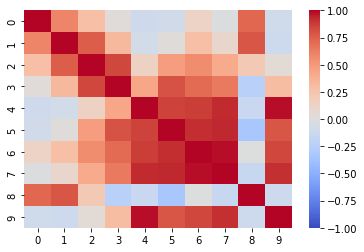

In [23]:
sns.heatmap(c,vmin=-1,vmax=1,cmap="coolwarm")

<AxesSubplot:>

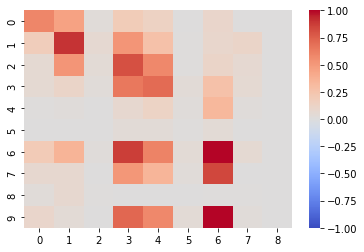

In [24]:
sns.heatmap(m,vmin=-1,vmax=1,cmap="coolwarm")

In [25]:
def normalize_2d(matrix,axis):
    norm = np.linalg.norm(matrix,axis=axis)
    if(axis==1):
        print(norm)
        matrix = matrix.T/norm  # normalized matrix
        return matrix.T
    else:
        matrix = matrix/norm  # normalized matrix
        return matrix

In [26]:
A=np.array([[1,2],[0,4],[5,6]]) 
B=np.array([[1,2,3],[3,4,5]])

In [27]:
np.dot(A,B)

array([[ 7, 10, 13],
       [12, 16, 20],
       [23, 34, 45]])

In [28]:
A

array([[1, 2],
       [0, 4],
       [5, 6]])

In [29]:
normalize_2d(A,1)

[2.23606798 4.         7.81024968]


array([[0.4472136 , 0.89442719],
       [0.        , 1.        ],
       [0.6401844 , 0.76822128]])

In [32]:
sas=pd.read_pickle(a[0])
sas

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,ADJ}, two{two,NUM}, humans{human,NO...","[NULL{null,ADJ}, two{two,NUM}, people{people,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.16620766, 0.01119...","[0.101916574, 0.40303633, 0.49504718]","[0.0, 0.0, 1.0]",0,9686,contradiction,contradiction
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.01616...","[0.0032416224, 0.034757353, 0.9620011]","[0.0, 0.0, 1.0]",0,2051,contradiction,contradiction
2,2,"[NULL{null,PROPN}, sled{sl,VERB}, and{and,CCON...","[NULL{null,ADJ}, there{there,ADV}, are{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.18873432, 0.011193112, 0.0868...","[0.930699, 0.051939595, 0.017361308]","[1.0, 0.0, 0.0]",0,2336,entailment,entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, dad{dad,NOUN}, wi...","[NULL{null,PROPN}, a{a,DET}, dad{dad,NOUN}, an...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.21444096, 0.0073...","[0.028838182, 0.72457194, 0.24658988]","[0.0, 0.0, 1.0]",0,7513,neutral,contradiction
4,4,"[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, ta...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, is...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1816948, 0.01616...","[0.7620637, 0.19679011, 0.04114619]","[1.0, 0.0, 0.0]",0,7057,entailment,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...
2855,2855,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,INTJ}, no{no,DET}, one{one,NOUN}, w...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.5133731, 0.103053674, 0.21640...","[0.010484933, 0.013014929, 0.97650015]","[1.0, 0.0, 0.0]",1,9792,contradiction,entailment
2856,2856,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, an{an,DET}, crew{crew,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.020928295, 0.15949261, 0.2164...","[0.19093776, 0.7909824, 0.018079832]","[1.0, 0.0, 0.0]",1,9793,neutral,entailment
2857,2857,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,ADJ}, theker{theker,NOUN}, is{be,VE...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.06849635, 0.016168319, 0.1292...","[0.38071898, 0.57142466, 0.047856346]","[0.0, 1.0, 0.0]",1,9794,neutral,neutral
2858,2858,"[NULL{null,PROPN}, a{a,DET}, lady{lady,NOUN}, ...","[NULL{null,ADJ}, two{two,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21101676, 0.01119...","[0.015296049, 0.040066022, 0.94463795]","[0.0, 0.0, 1.0]",1,9813,contradiction,contradiction


In [33]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'eigenvalues' : [],'eigenvectors' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_eigenvalues=[]
                l_eigenvectors=[]
                for index,strings in temp.iterrows():
                    m=strings[5][1:len(strings[1]),1:len(strings[2])]
                    m_norm=np.dot(stats.zscore(np.transpose(m),1),stats.zscore(m))
                    x, v = np.linalg.eig (m_norm)
                    l_eigenvalues.append(x)
                    l_eigenvectors.append(v)
                new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
                new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
                new_data['Paraphrase'].append(i)
                l_eigenvalues.clear()
                l_eigenvectors.clear()
dfn=pd.DataFrame(new_data)

/tmp/ipykernel_305267/2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
/tmp/ipykernel_305267/2097832507.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
/tmp/ipykernel_305267/2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
dfn.to_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [24]:
dfn=pd.read_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [25]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,391,347,entailment_entailment,"[[42.08087, 31.501606, 6.544958, 0.7520333, 4....","[[[0.120542236, 0.65792817, 0.49025238, 0.1784...",0
1,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,391,39,entailment_neutral,"[[85.07136, 39.71359, 27.533789, 20.878782, 6....","[[[0.31655023, 0.29569164, 0.015177588, 0.4186...",0
2,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,391,5,entailment_contradiction,"[[63.068733, 38.50297, 18.242992, 12.932028, 5...","[[[0.253209, 0.3799084, -0.0852248, 0.06061114...",0
3,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,423,52,neutral_entailment,"[[65.88198, 18.591314, 6.548632, 3.3476417, 2....","[[[-0.3771718, -0.19499423, -0.23925667, -0.29...",0
4,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,423,342,neutral_neutral,"[[(116.06365+0j), (39.470318+0j), (27.617624+0...","[[[(-0.14821187+0j), (0.3930333+0j), (0.071059...",0
...,...,...,...,...,...,...,...,...,...
2515,salida2/pTEST_new_0.5_12.csv.pickle,50.0,12.csv.pickle,1021,791,neutral_neutral,"[[26.09006, 21.702818, 5.001084, 7.2060432], [...","[[[-0.551719, -0.4622124, 0.6905038, 0.0719050...",1
2516,salida2/pTEST_new_0.5_12.csv.pickle,50.0,12.csv.pickle,1021,118,neutral_contradiction,"[[59.185802, 9.000408, 0.23166473, 2.059847, 4...","[[[0.46853003, 0.2729164, 0.34152922, -0.74183...",1
2517,salida2/pTEST_new_0.5_12.csv.pickle,50.0,12.csv.pickle,1023,50,contradiction_entailment,"[[115.013985, 14.479788, 10.119492, 2.1156309,...","[[[0.31971943, 0.21179421, 0.028826626, 0.4732...",1
2518,salida2/pTEST_new_0.5_12.csv.pickle,50.0,12.csv.pickle,1023,138,contradiction_neutral,"[[79.3743, 16.994654, 11.041972, 2.1281319, 0....","[[[-0.47718635, -0.31497672, -0.3016384, -0.76...",1


In [26]:
ejemplo1=dfn.eigenvalues[0][0]
ejemplo2=dfn.eigenvalues[0][1]
ejemplo3=dfn.eigenvalues[0][2]

In [27]:
import matplotlib.pyplot as plt
import math

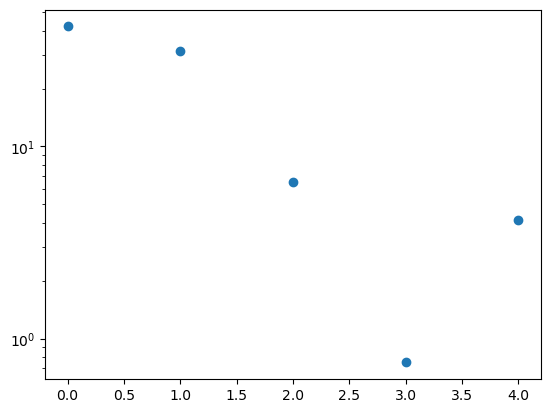

In [28]:
plt.scatter(x=np.arange(len(ejemplo1)),y=ejemplo1)
plt.yscale("log")

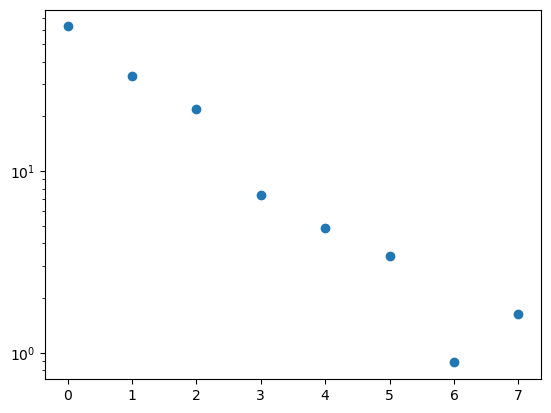

In [29]:
plt.scatter(x=np.arange(len(ejemplo2)),y=ejemplo2)
plt.yscale("log")

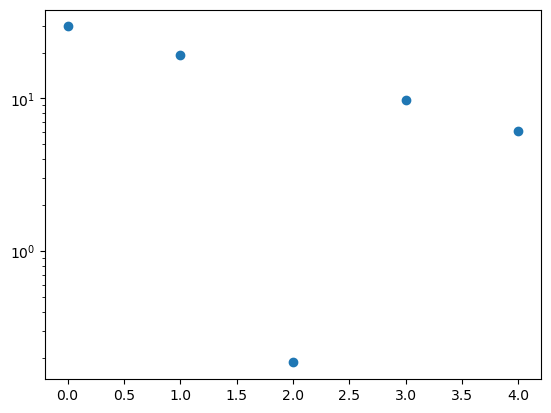

In [30]:
plt.scatter(x=np.arange(len(ejemplo3)),y=ejemplo3)
plt.yscale("log")

In [31]:
a=dfn.eigenvalues[0][4]

In [32]:
a

array([ 9.2120628e+01,  6.6568199e+01,  2.0048069e+01,  1.8314186e+01,
        1.3729400e+01,  7.9293828e+00,  1.0433730e+00,  2.4676107e-01,
       -1.0440456e-14, -2.1295849e-17], dtype=float32)

In [63]:
lista_eigenvalues=[]

In [57]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,391,347,entailment_entailment,"[[42.08087, 31.501606, 6.544958, 0.7520333, 4....","[[[0.120542236, 0.65792817, 0.49025238, 0.1784...",0
1,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,391,39,entailment_neutral,"[[85.07136, 39.71359, 27.533789, 20.878782, 6....","[[[0.31655023, 0.29569164, 0.015177588, 0.4186...",0
2,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,391,5,entailment_contradiction,"[[63.068733, 38.50297, 18.242992, 12.932028, 5...","[[[0.253209, 0.3799084, -0.0852248, 0.06061114...",0
3,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,423,52,neutral_entailment,"[[65.88198, 18.591314, 6.548632, 3.3476417, 2....","[[[-0.3771718, -0.19499423, -0.23925667, -0.29...",0
4,salida2/pTEST_new_0.2_9.csv.pickle,20.0,9.csv.pickle,423,342,neutral_neutral,"[[(116.06365+0j), (39.470318+0j), (27.617624+0...","[[[(-0.14821187+0j), (0.3930333+0j), (0.071059...",0
...,...,...,...,...,...,...,...,...,...
2515,salida2/pTEST_new_0.5_12.csv.pickle,50.0,12.csv.pickle,1021,791,neutral_neutral,"[[26.09006, 21.702818, 5.001084, 7.2060432], [...","[[[-0.551719, -0.4622124, 0.6905038, 0.0719050...",1
2516,salida2/pTEST_new_0.5_12.csv.pickle,50.0,12.csv.pickle,1021,118,neutral_contradiction,"[[59.185802, 9.000408, 0.23166473, 2.059847, 4...","[[[0.46853003, 0.2729164, 0.34152922, -0.74183...",1
2517,salida2/pTEST_new_0.5_12.csv.pickle,50.0,12.csv.pickle,1023,50,contradiction_entailment,"[[115.013985, 14.479788, 10.119492, 2.1156309,...","[[[0.31971943, 0.21179421, 0.028826626, 0.4732...",1
2518,salida2/pTEST_new_0.5_12.csv.pickle,50.0,12.csv.pickle,1023,138,contradiction_neutral,"[[79.3743, 16.994654, 11.041972, 2.1281319, 0....","[[[-0.47718635, -0.31497672, -0.3016384, -0.76...",1


In [69]:
grupos_box=dfn["grupo"].unique()

In [70]:
eti_box=dfn["E_P"].unique()

/tmp/ipykernel_15175/3931257323.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
/tmp/ipykernel_15175/3931257323.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
/tmp/ipykernel_15175/3931257323.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
/tmp/ipykernel_15175/3931257323.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
/tmp/ipykernel_15175/3931257323.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]
/tmp/ipykernel_15175/3931257323.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
 

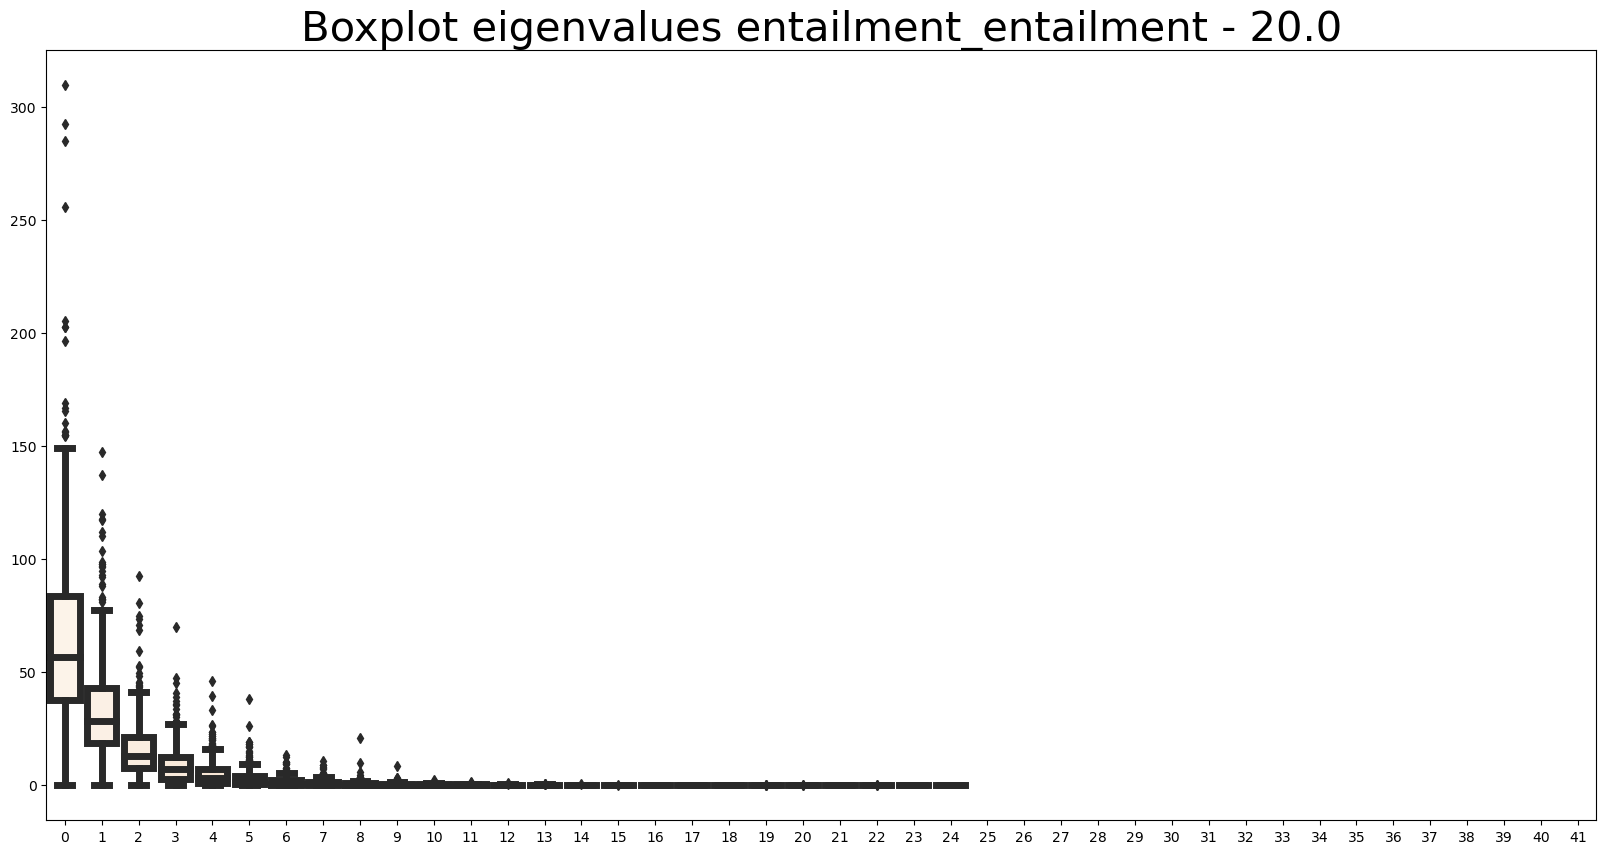

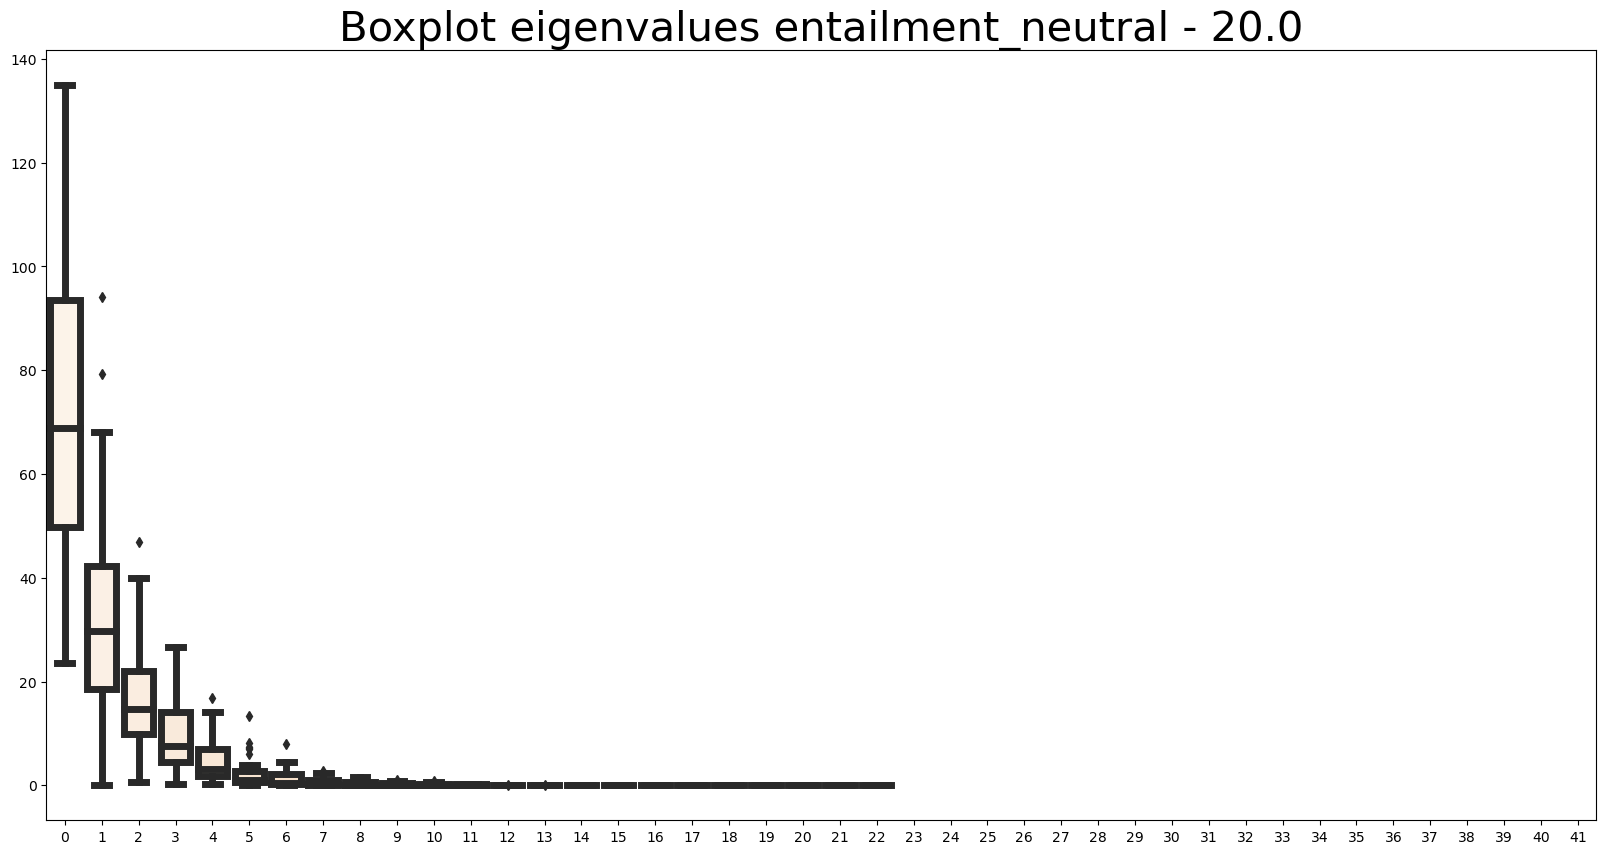

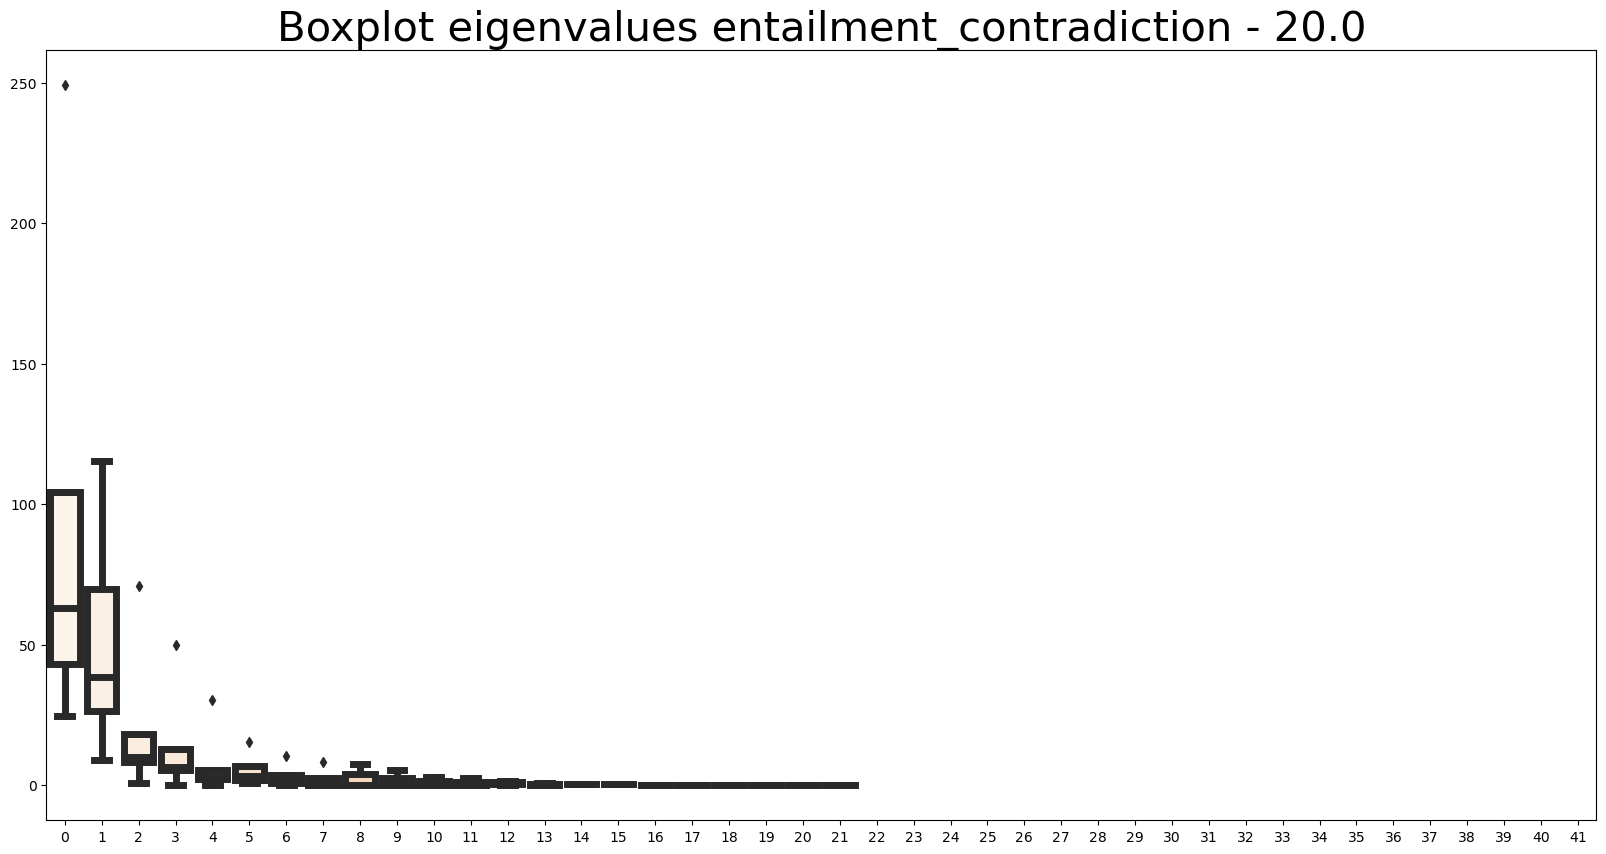

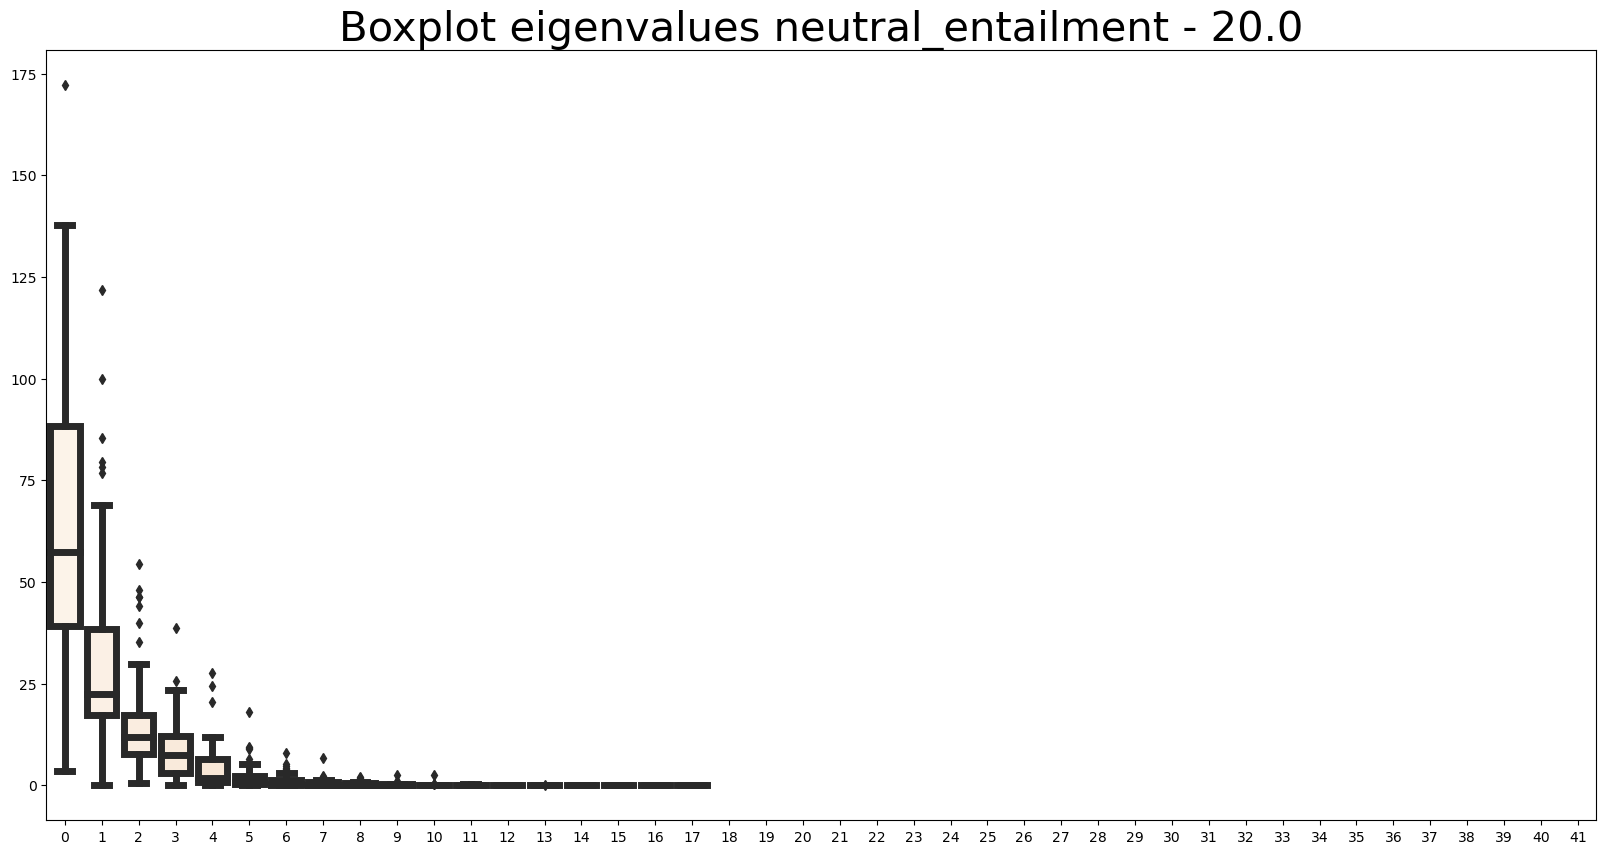

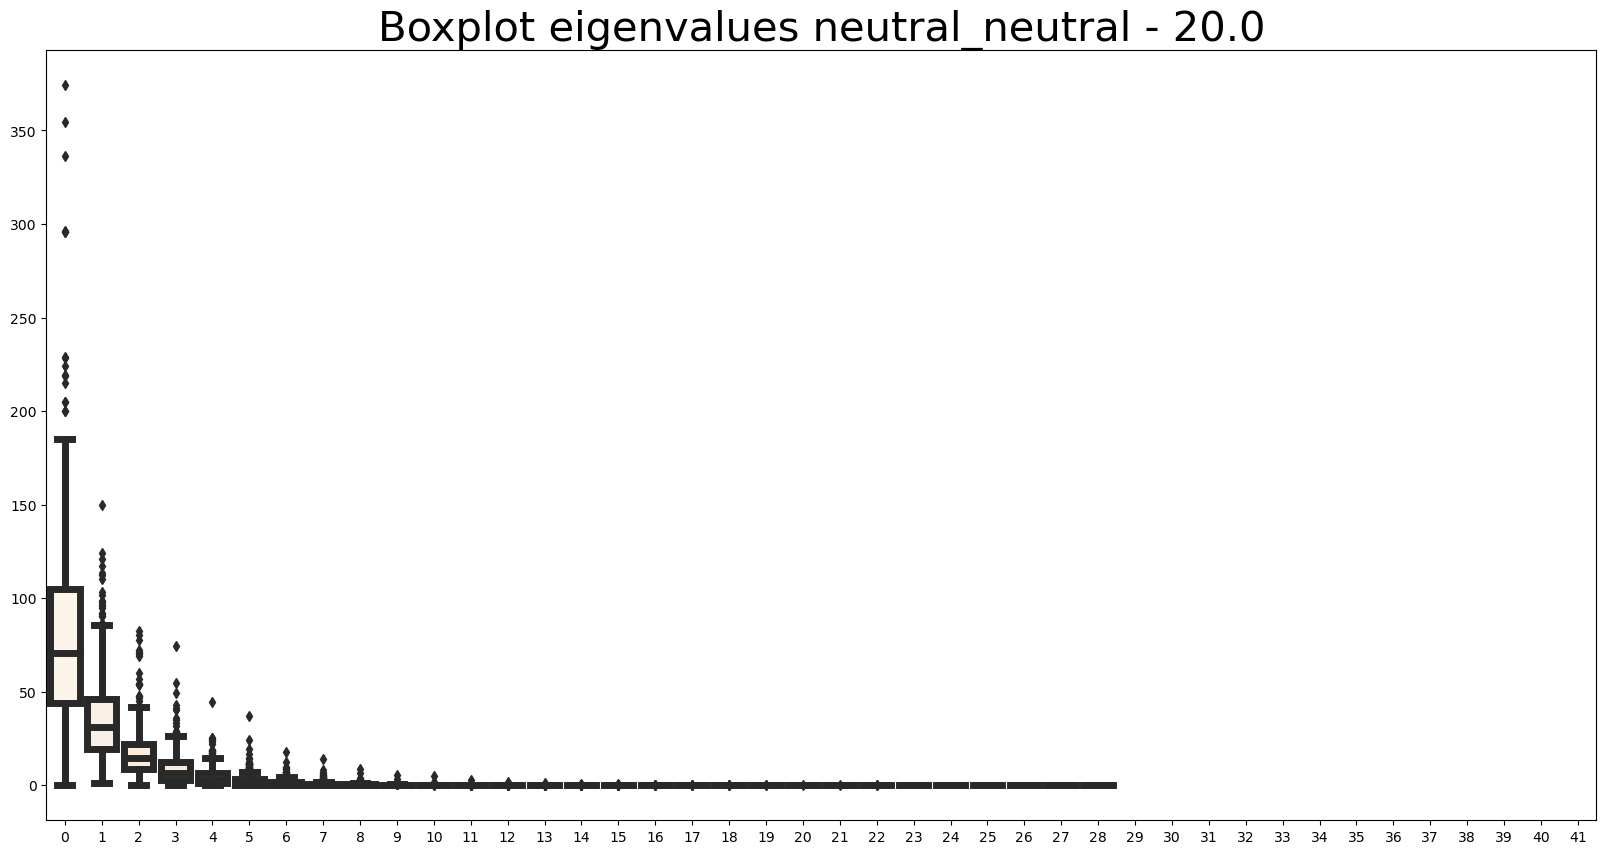

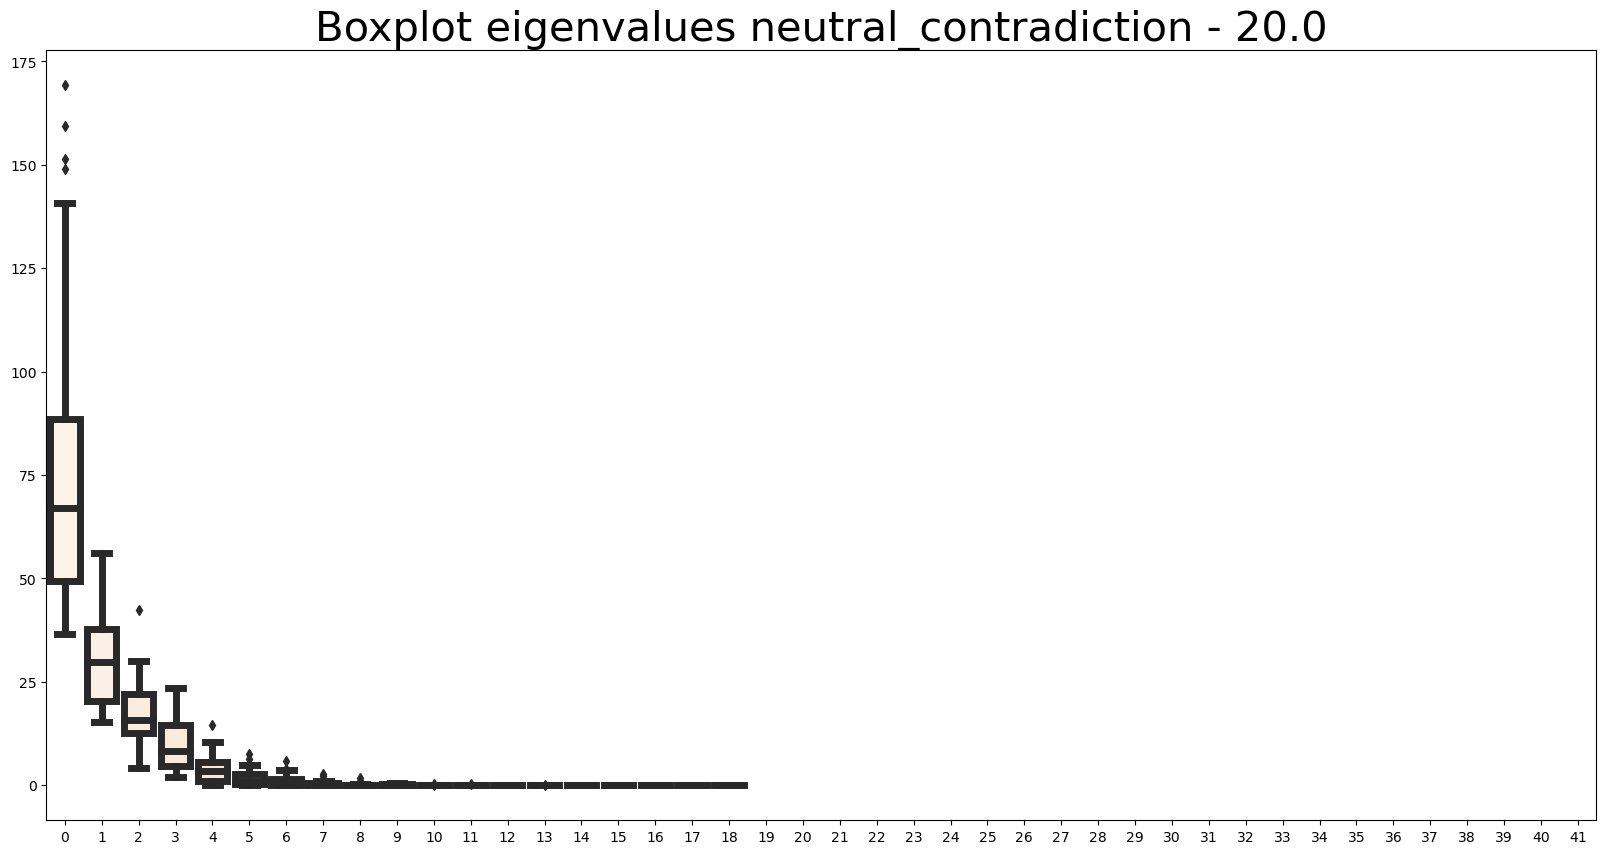

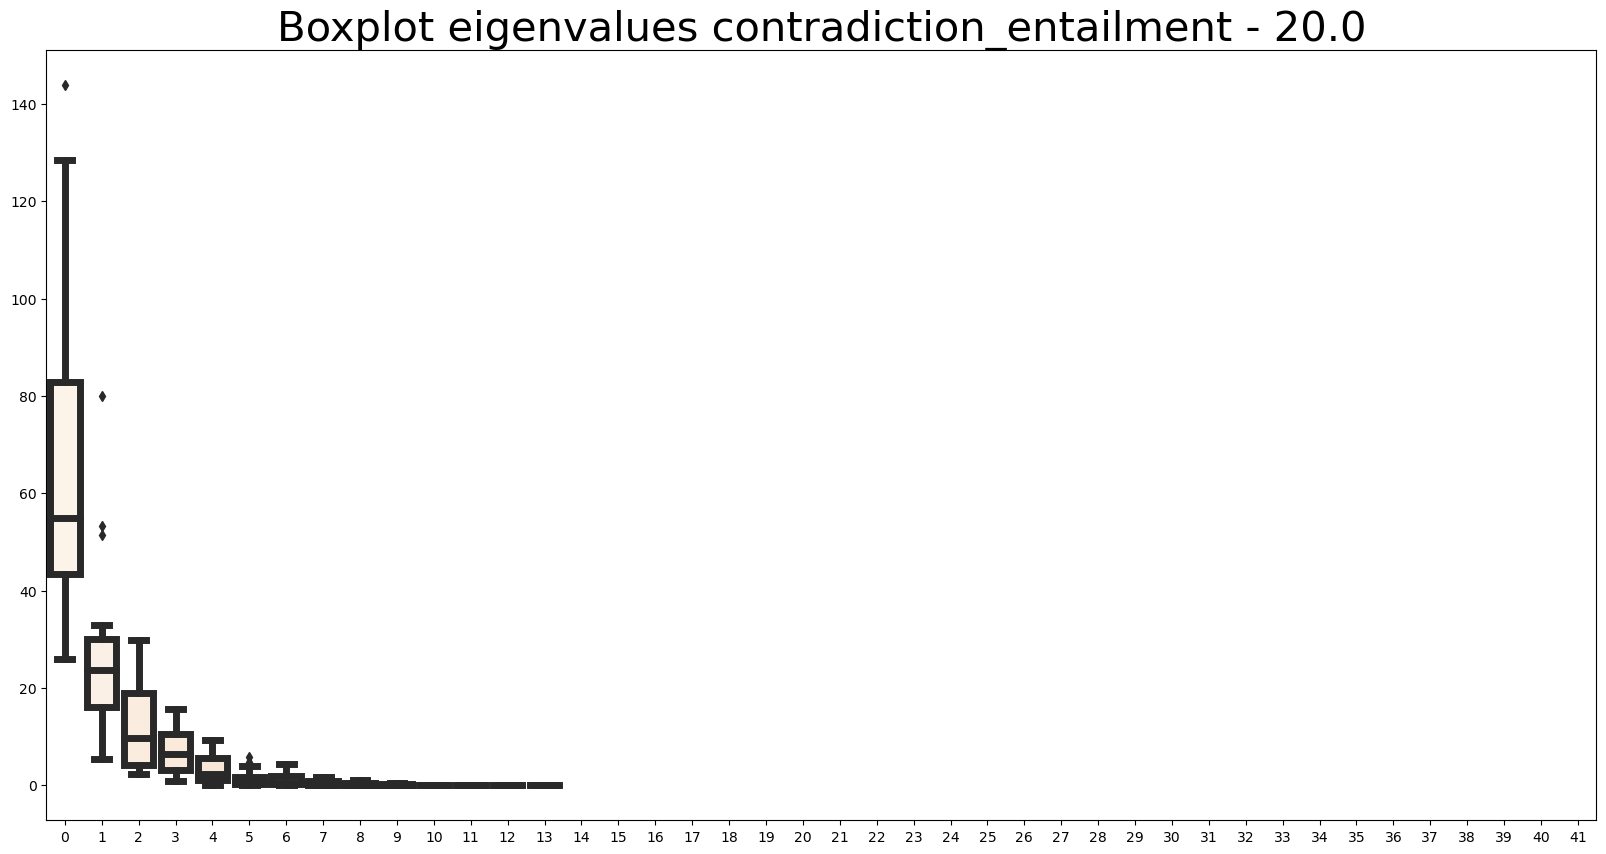

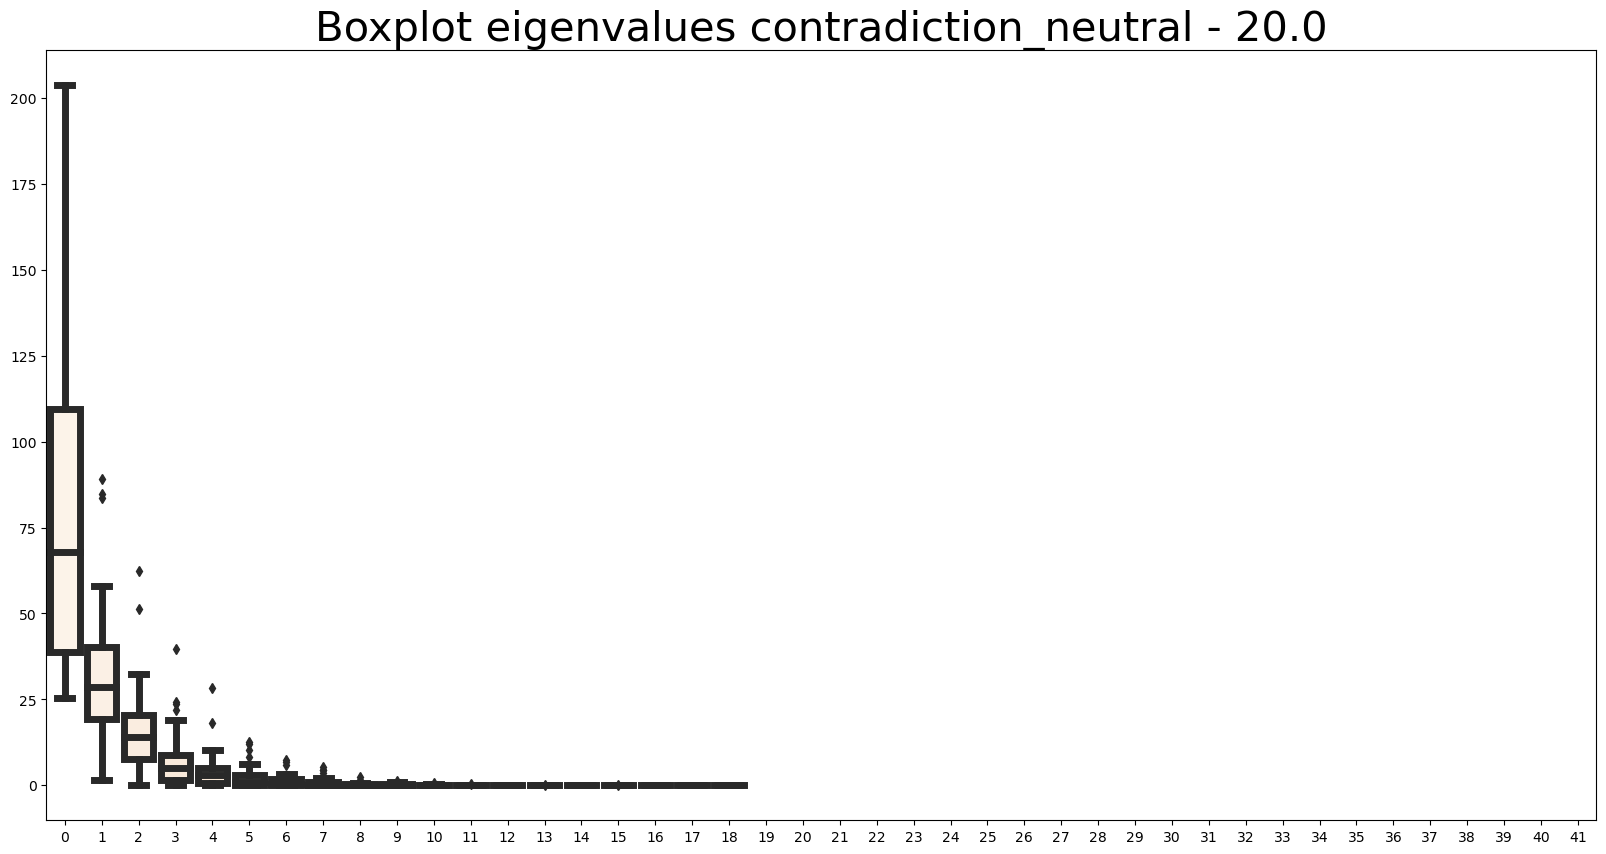

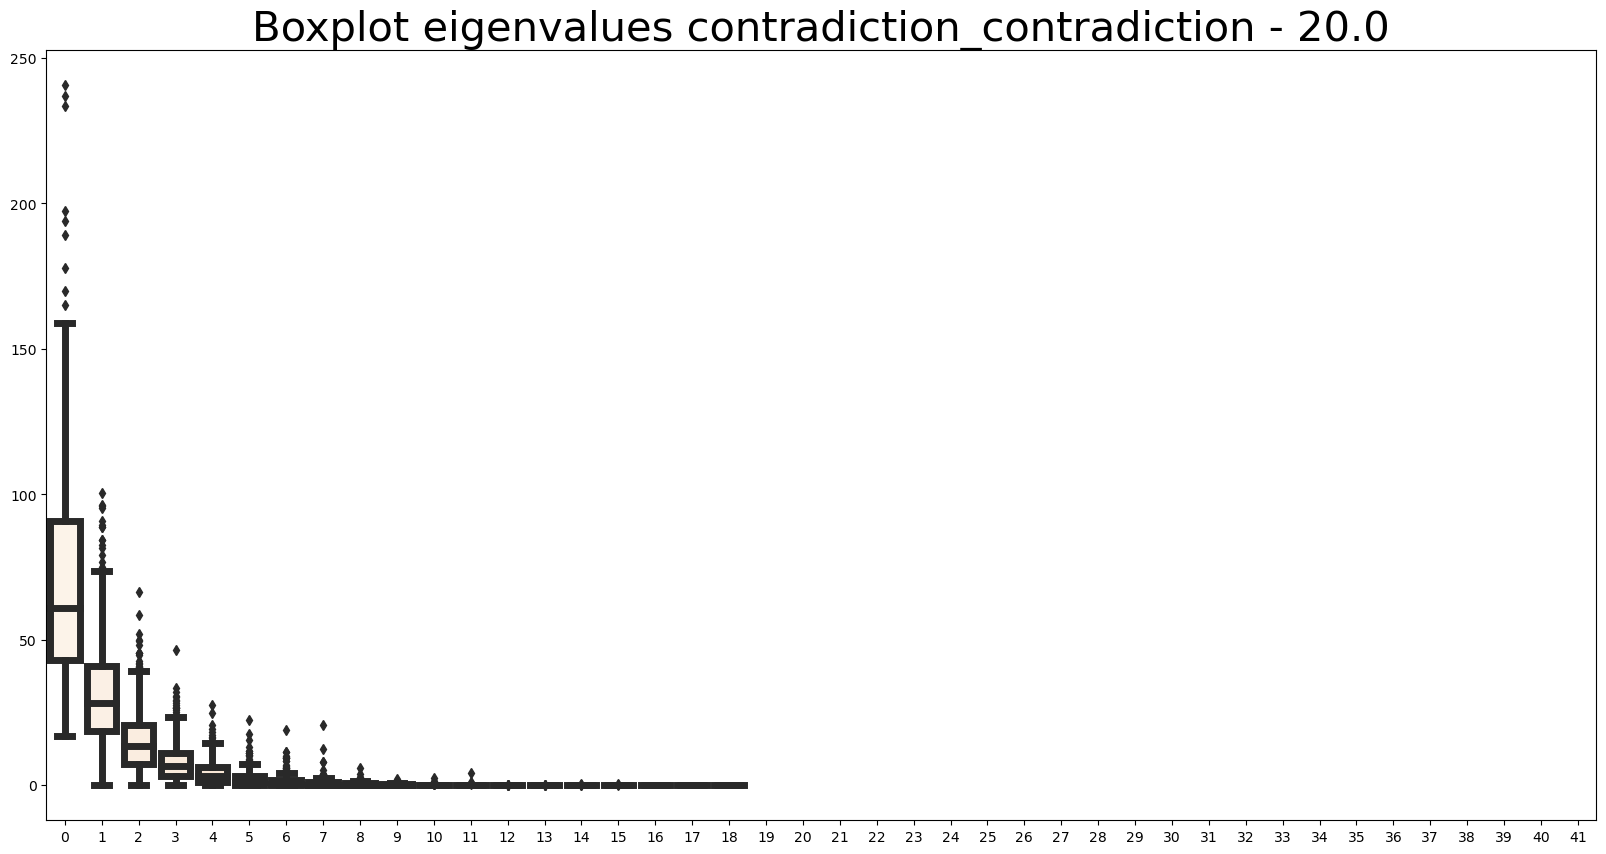

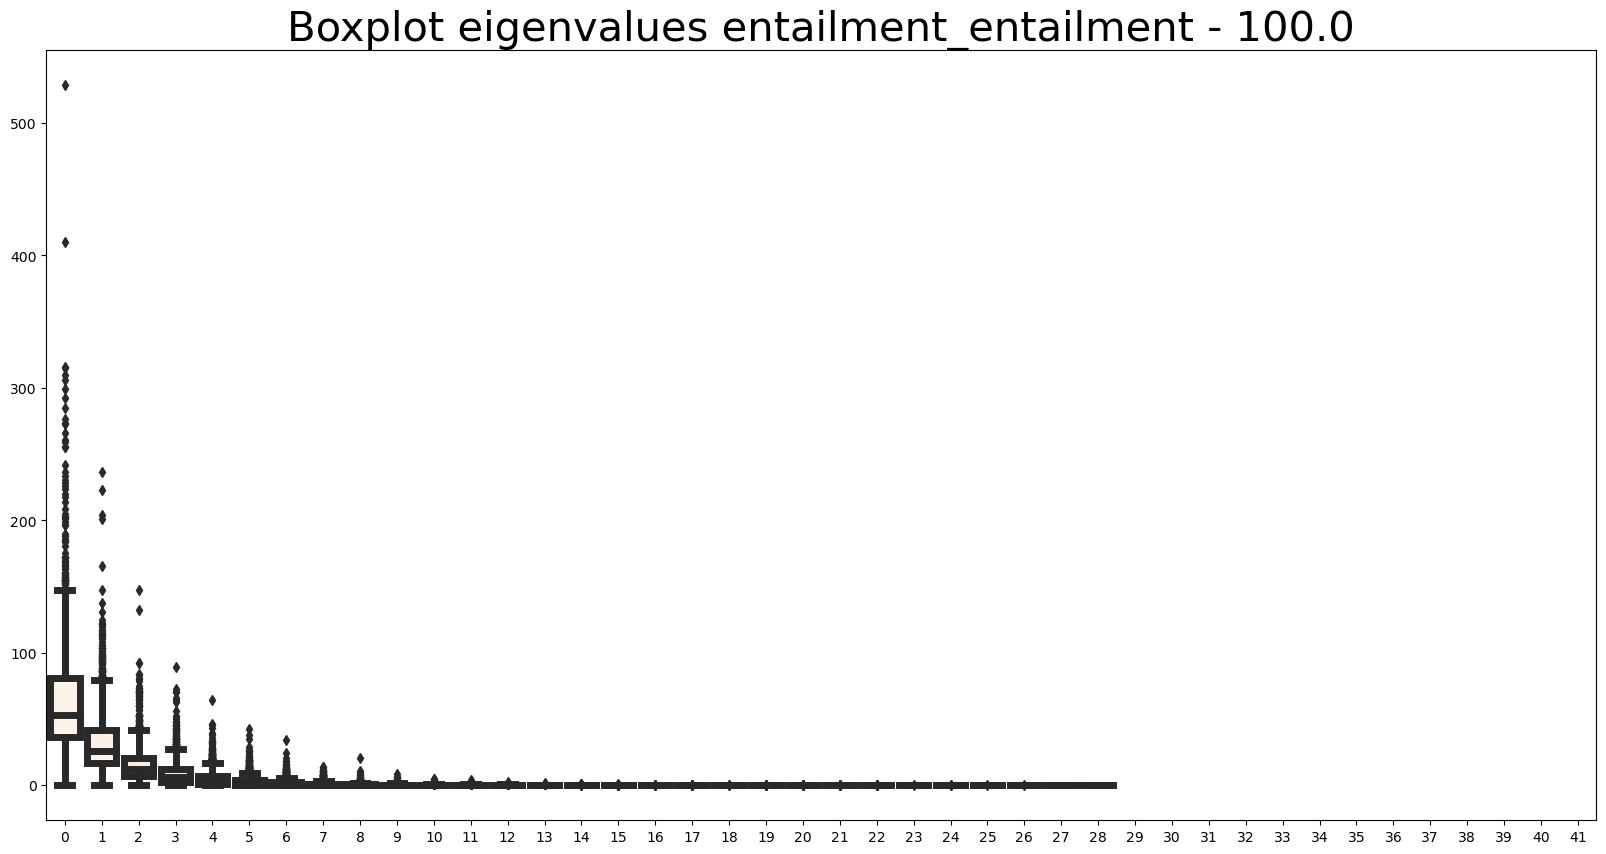

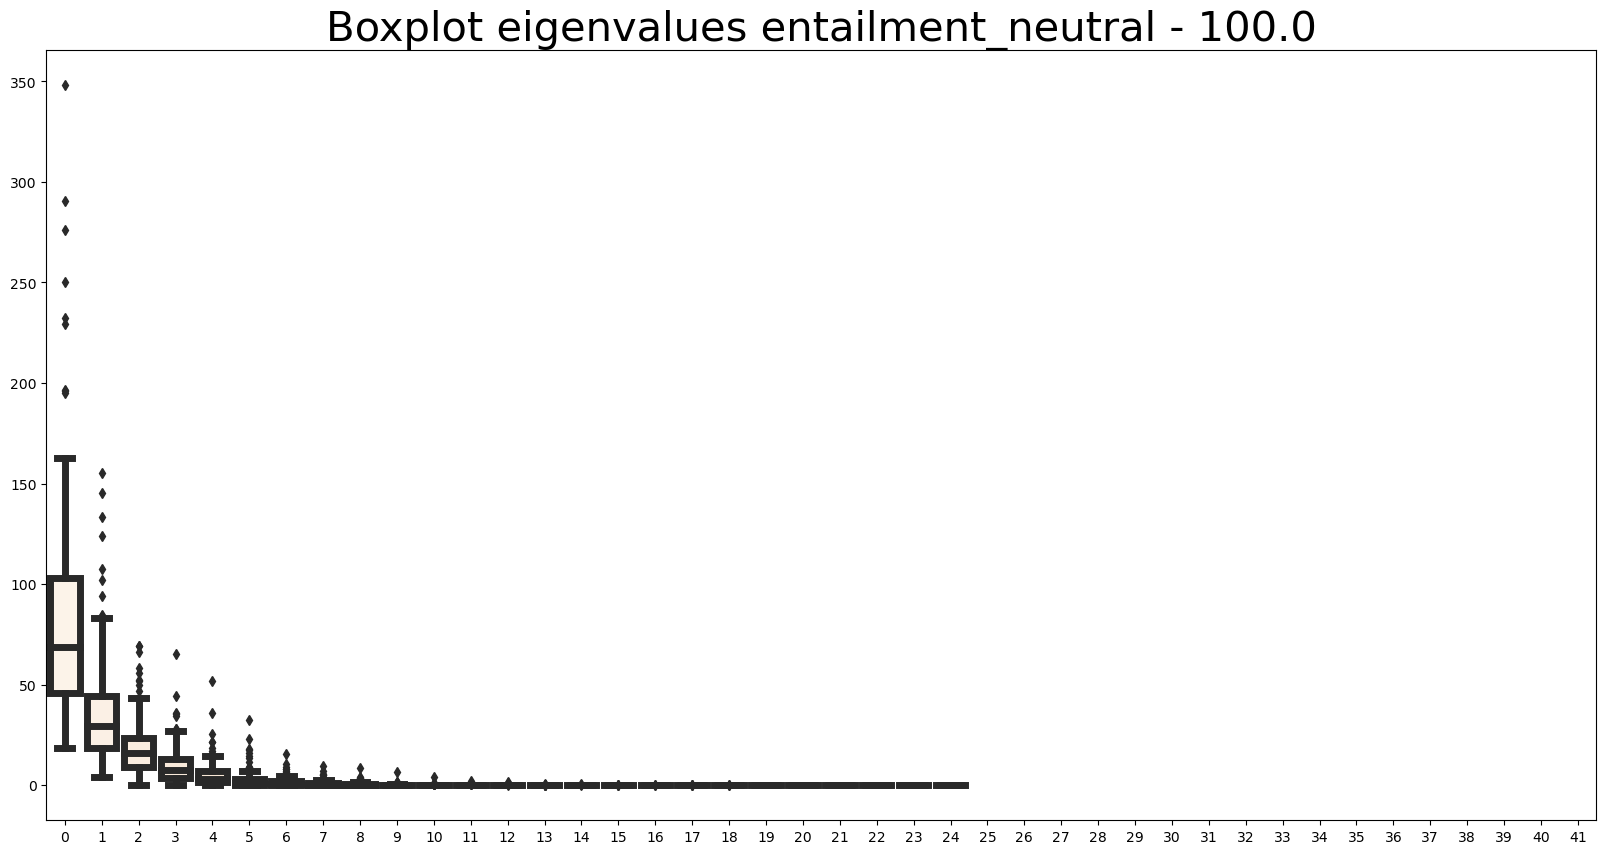

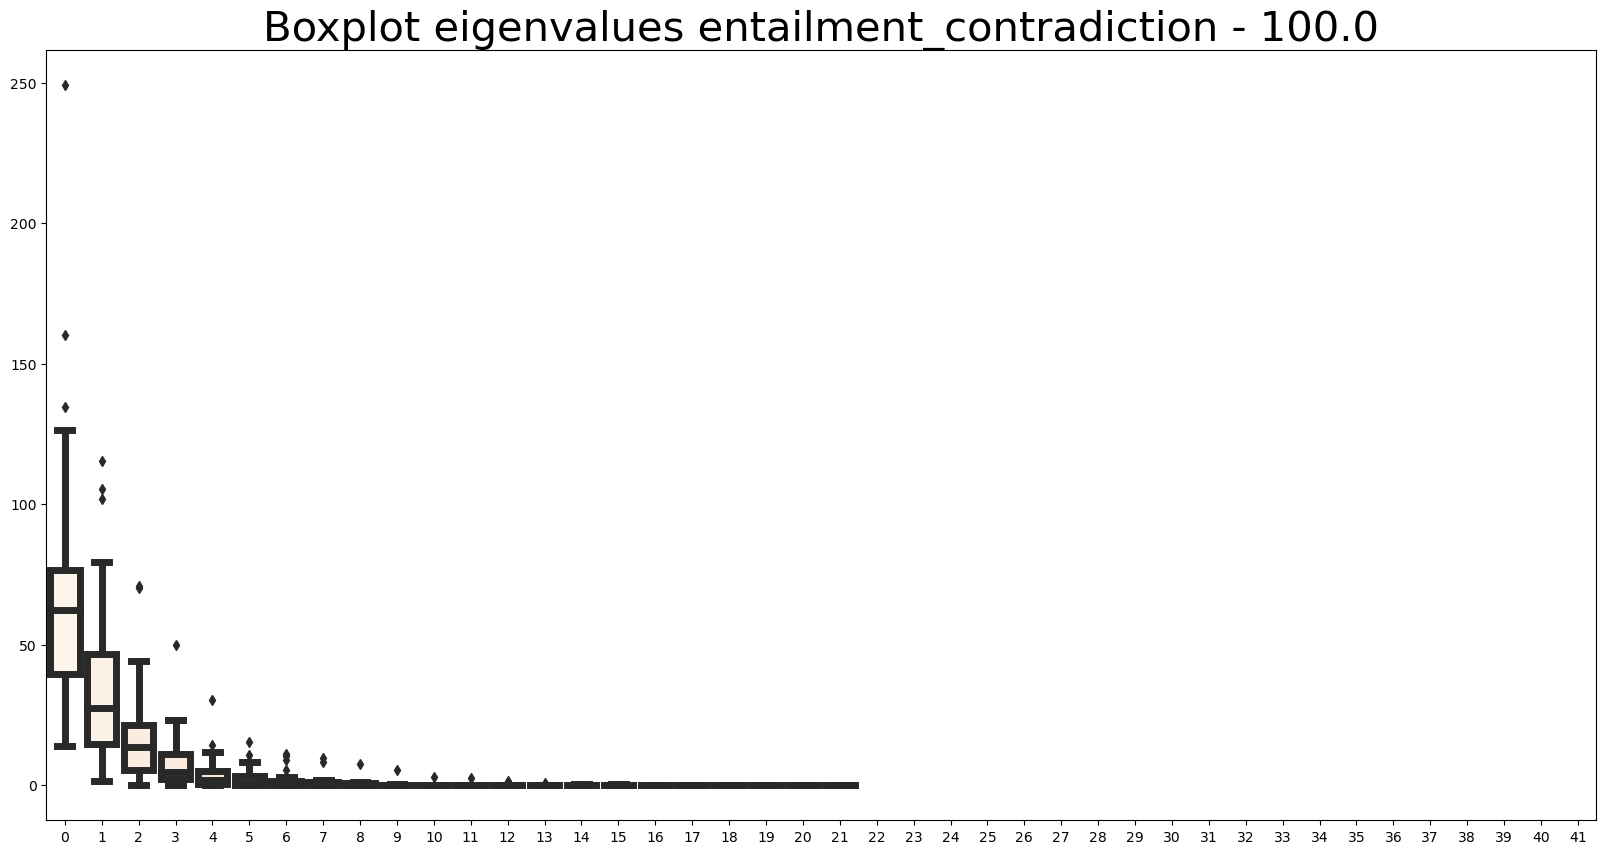

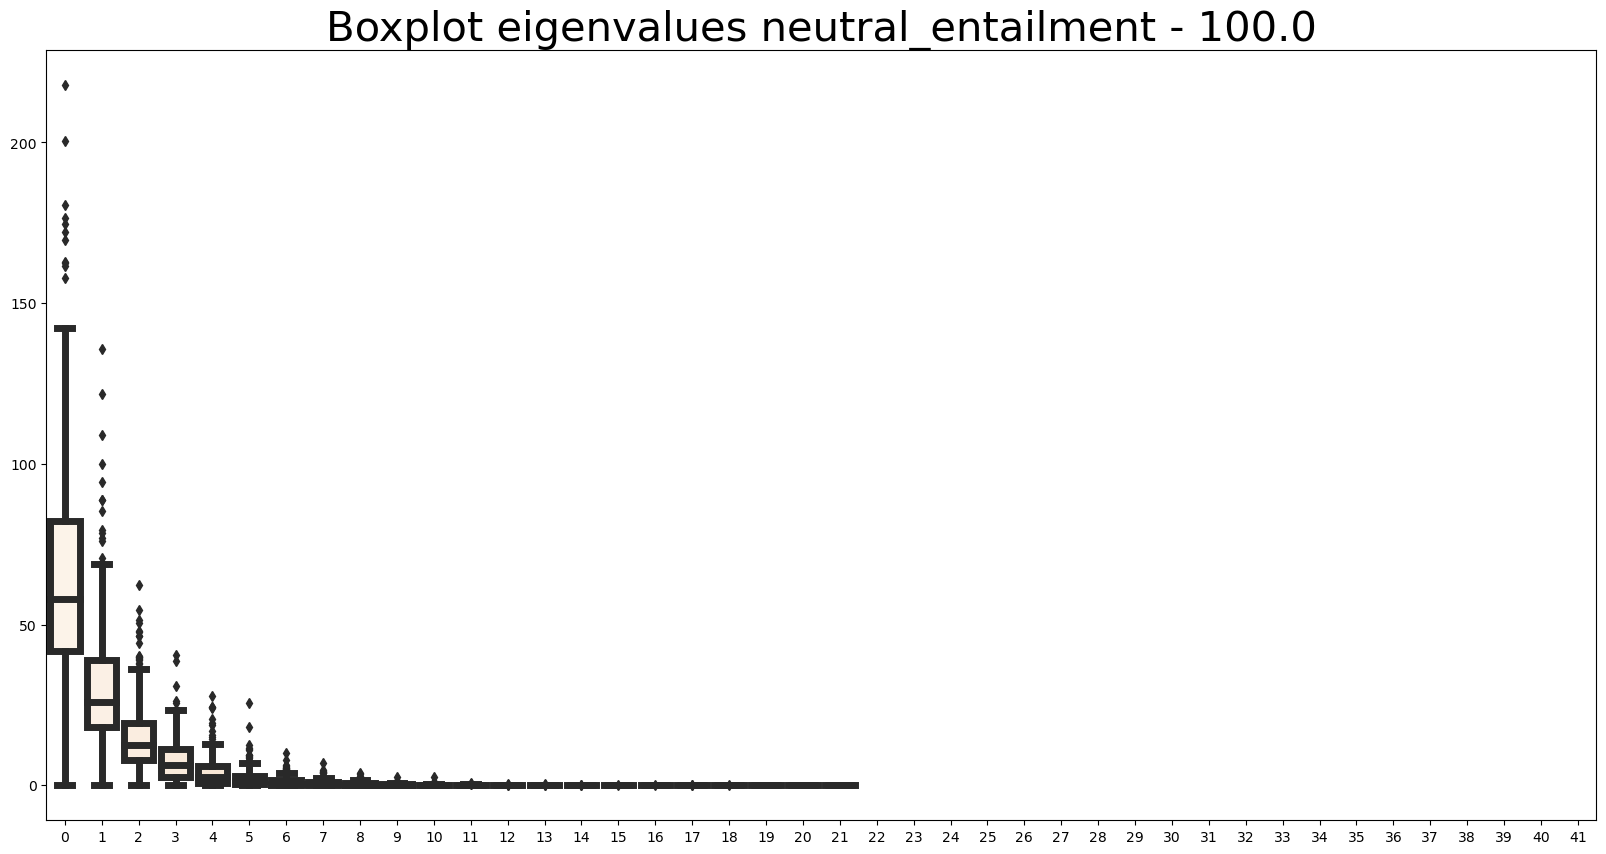

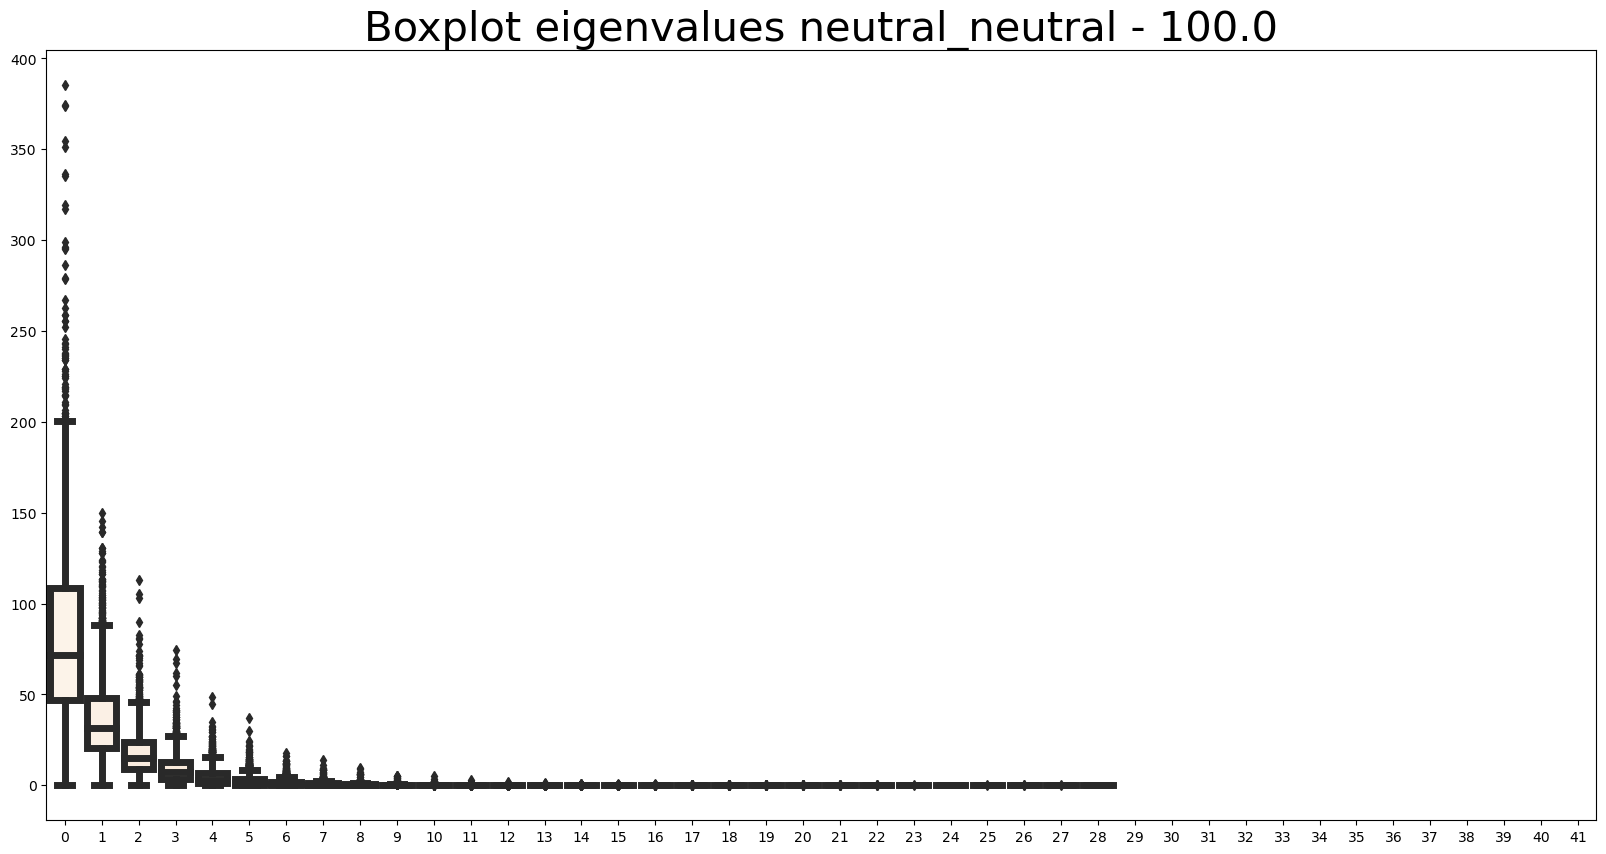

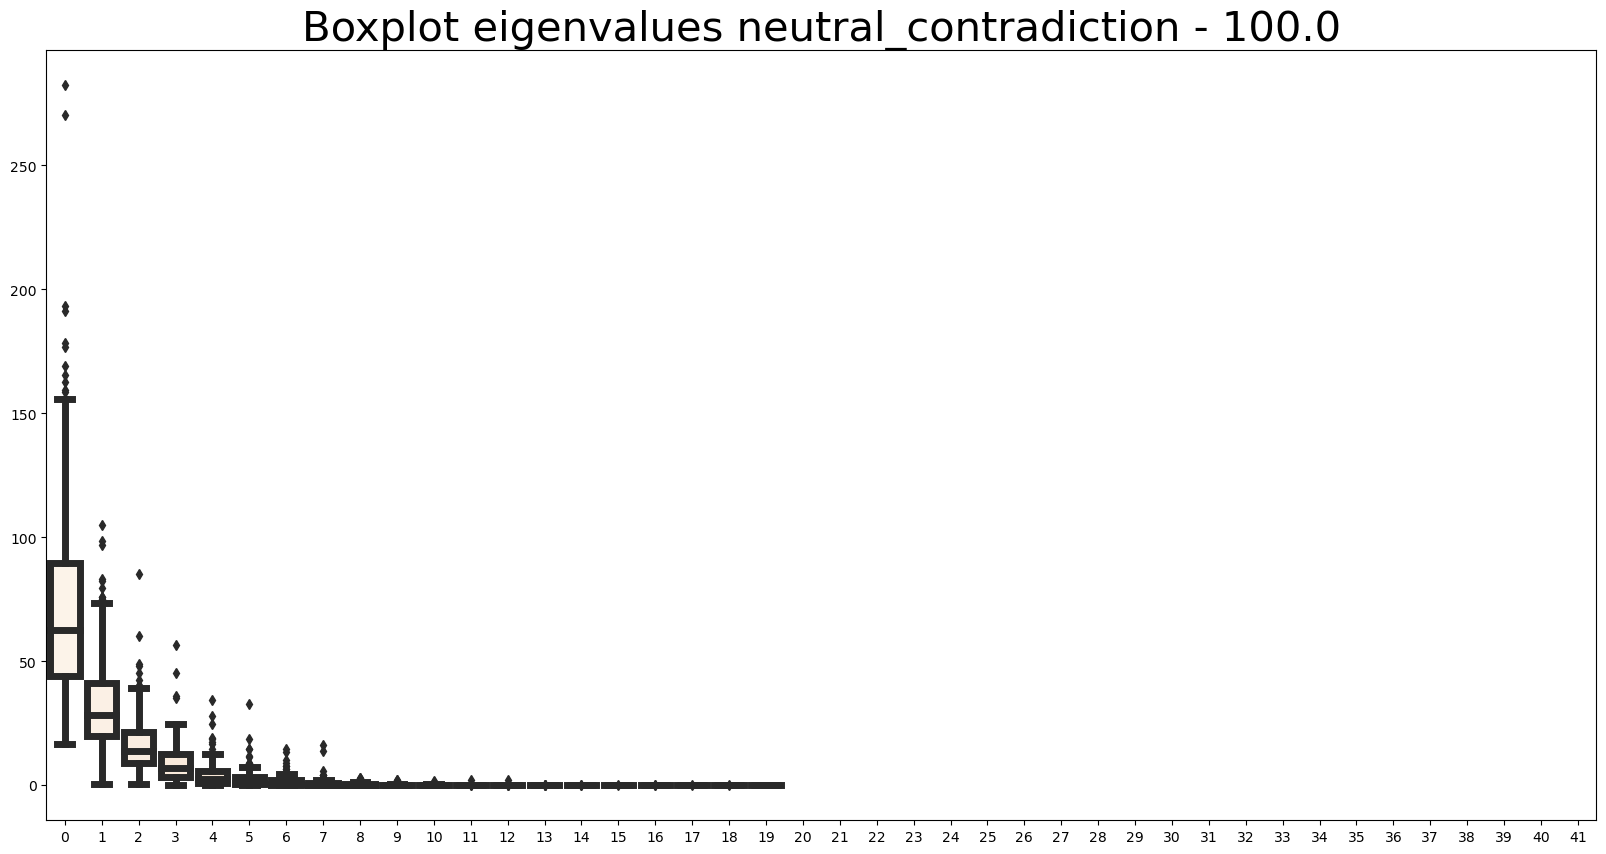

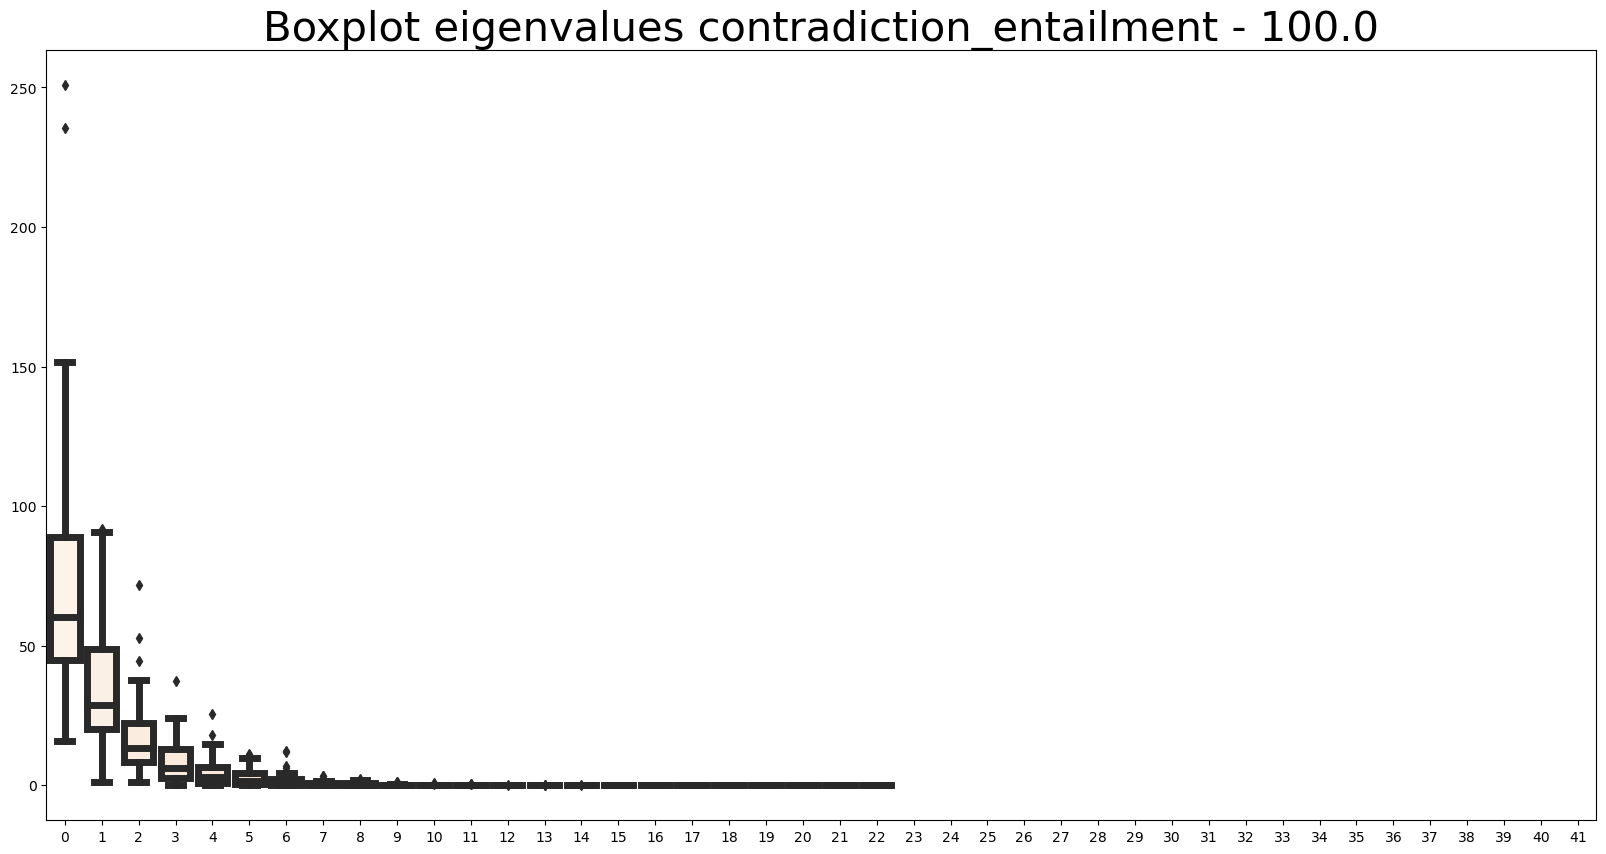

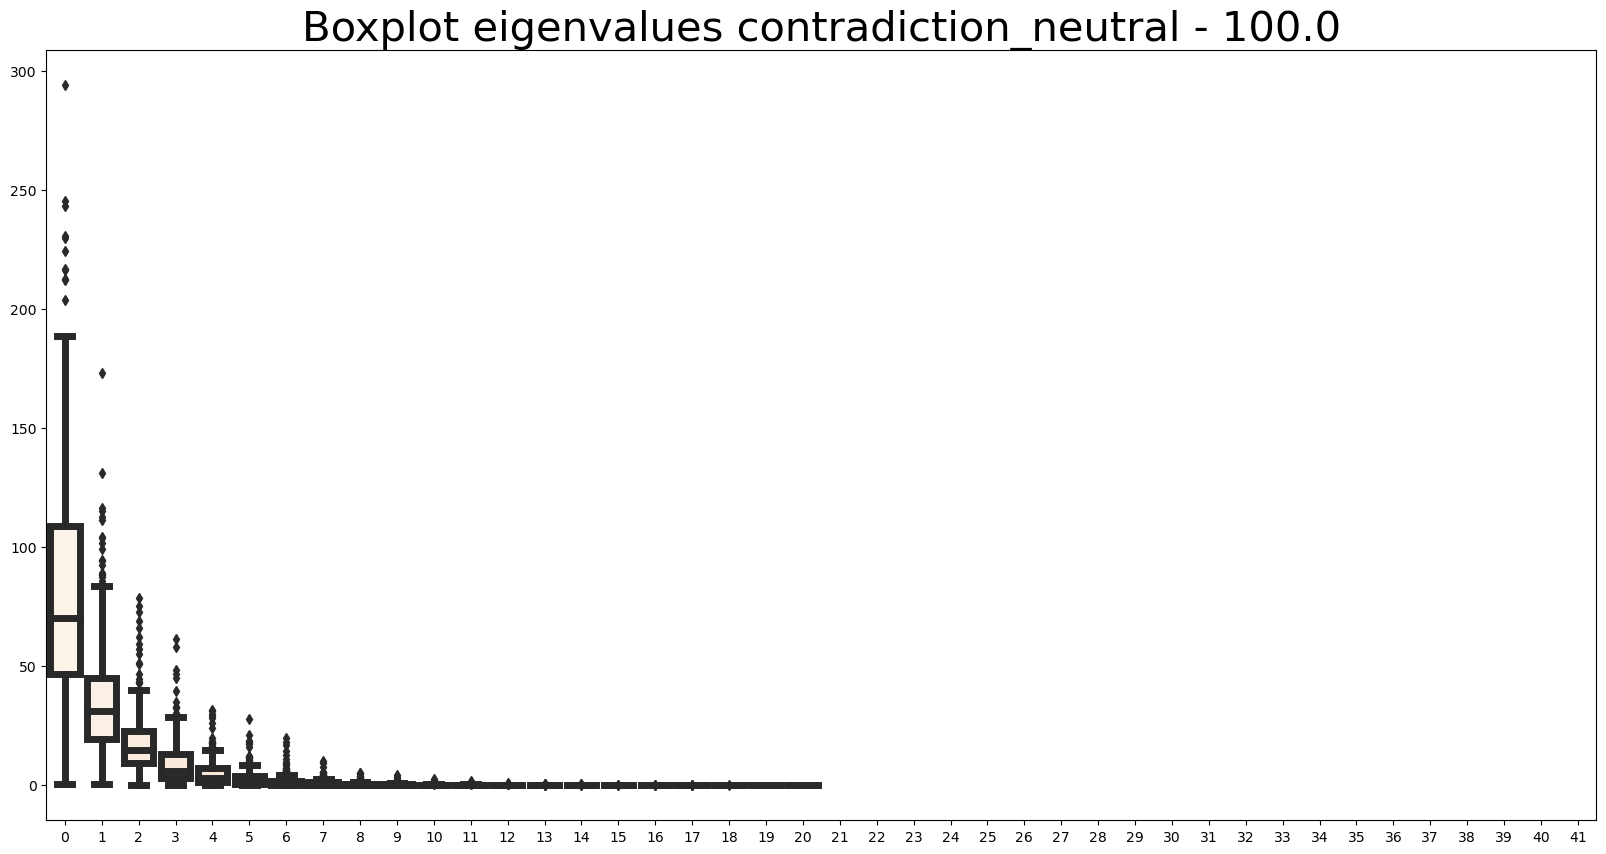

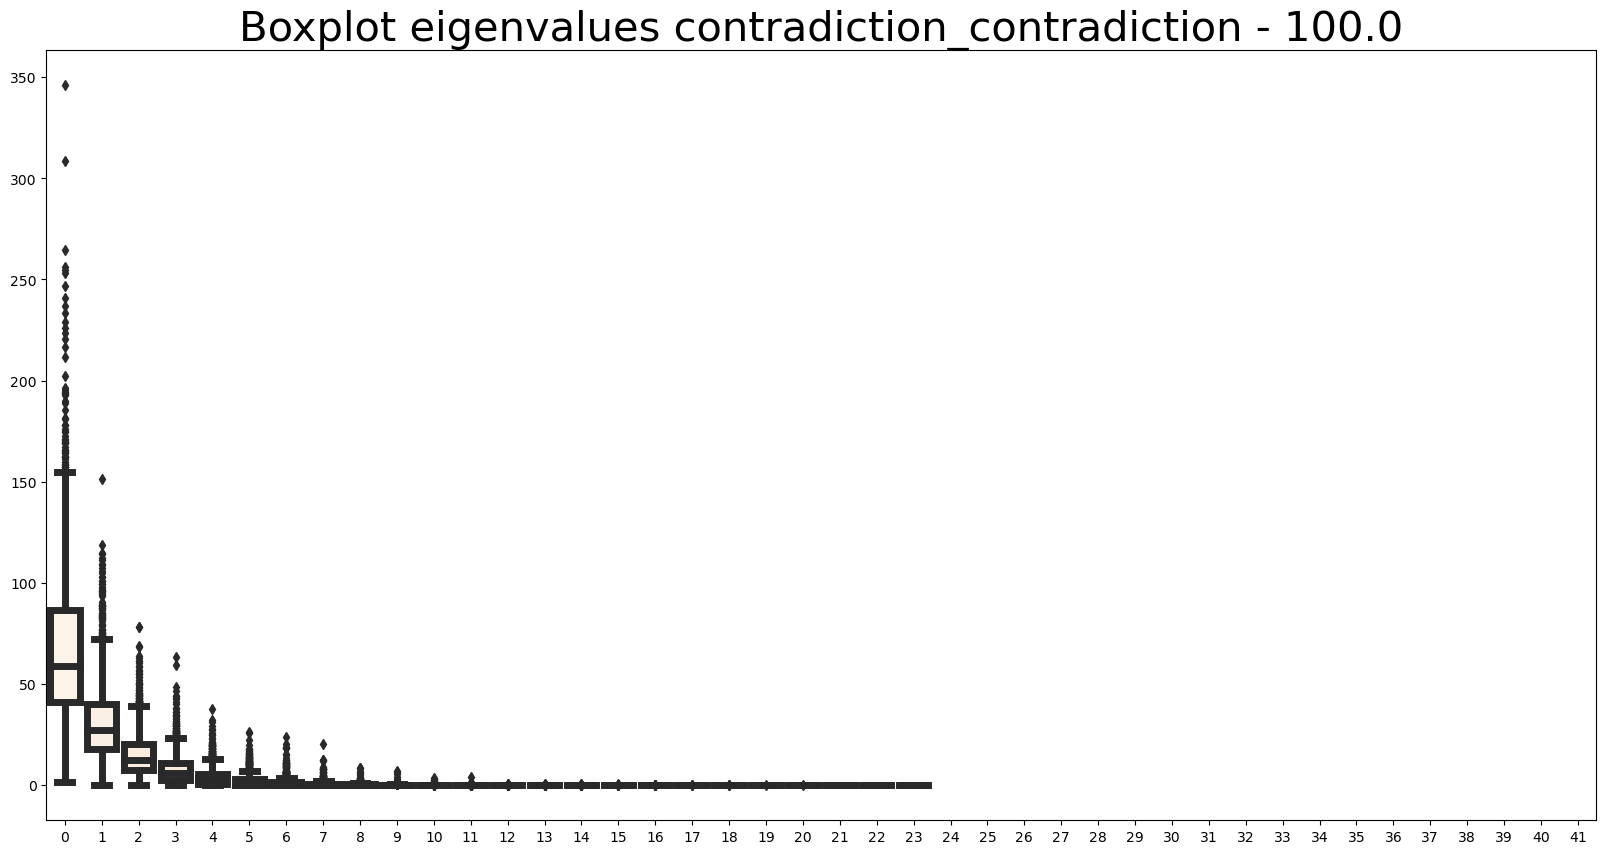

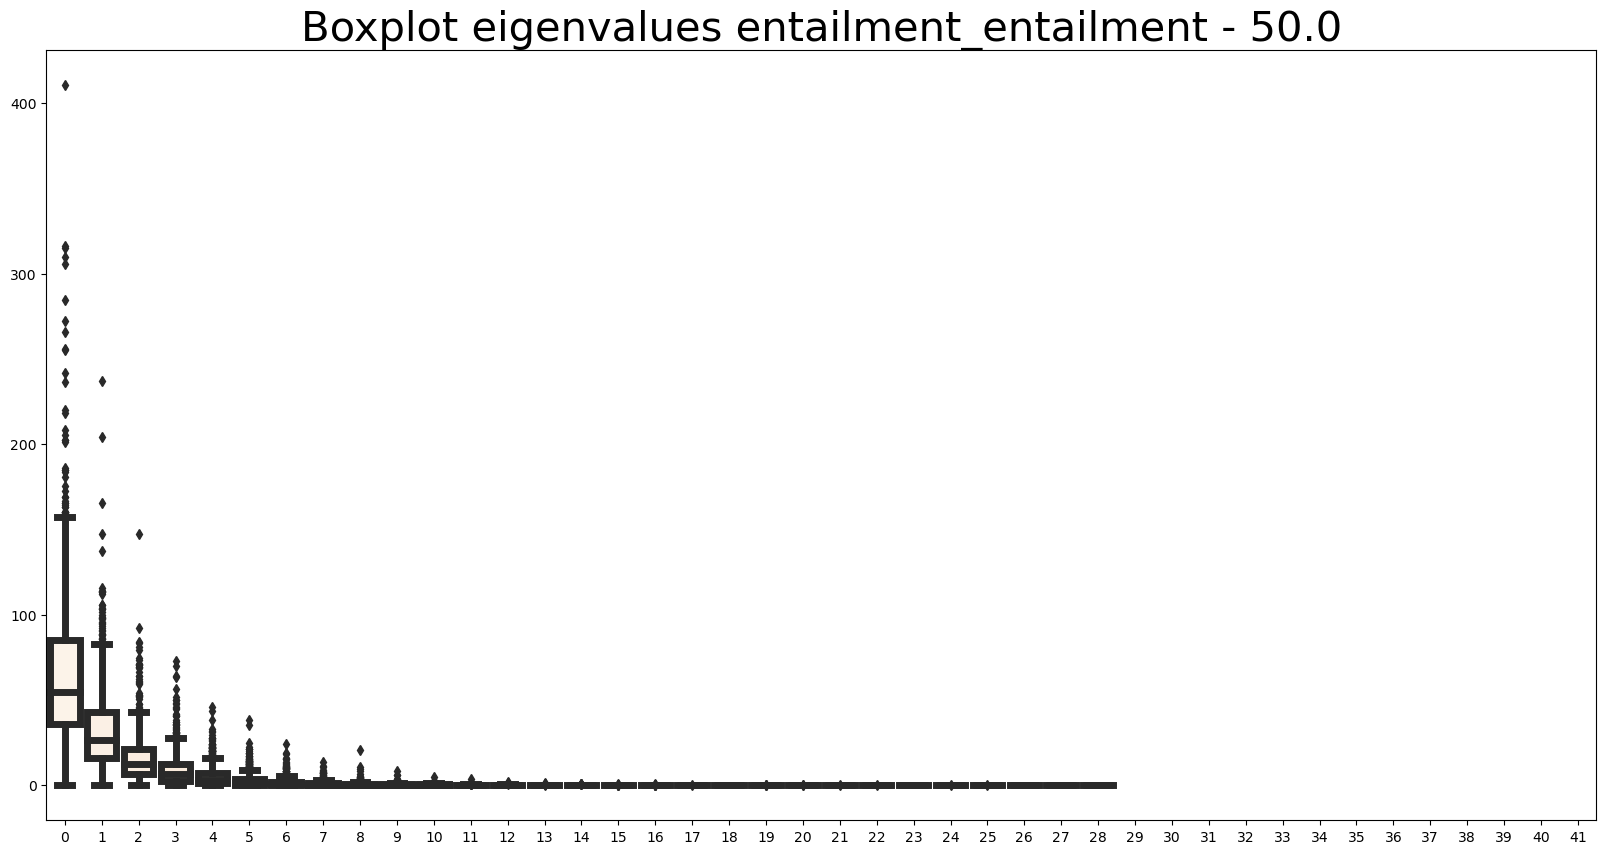

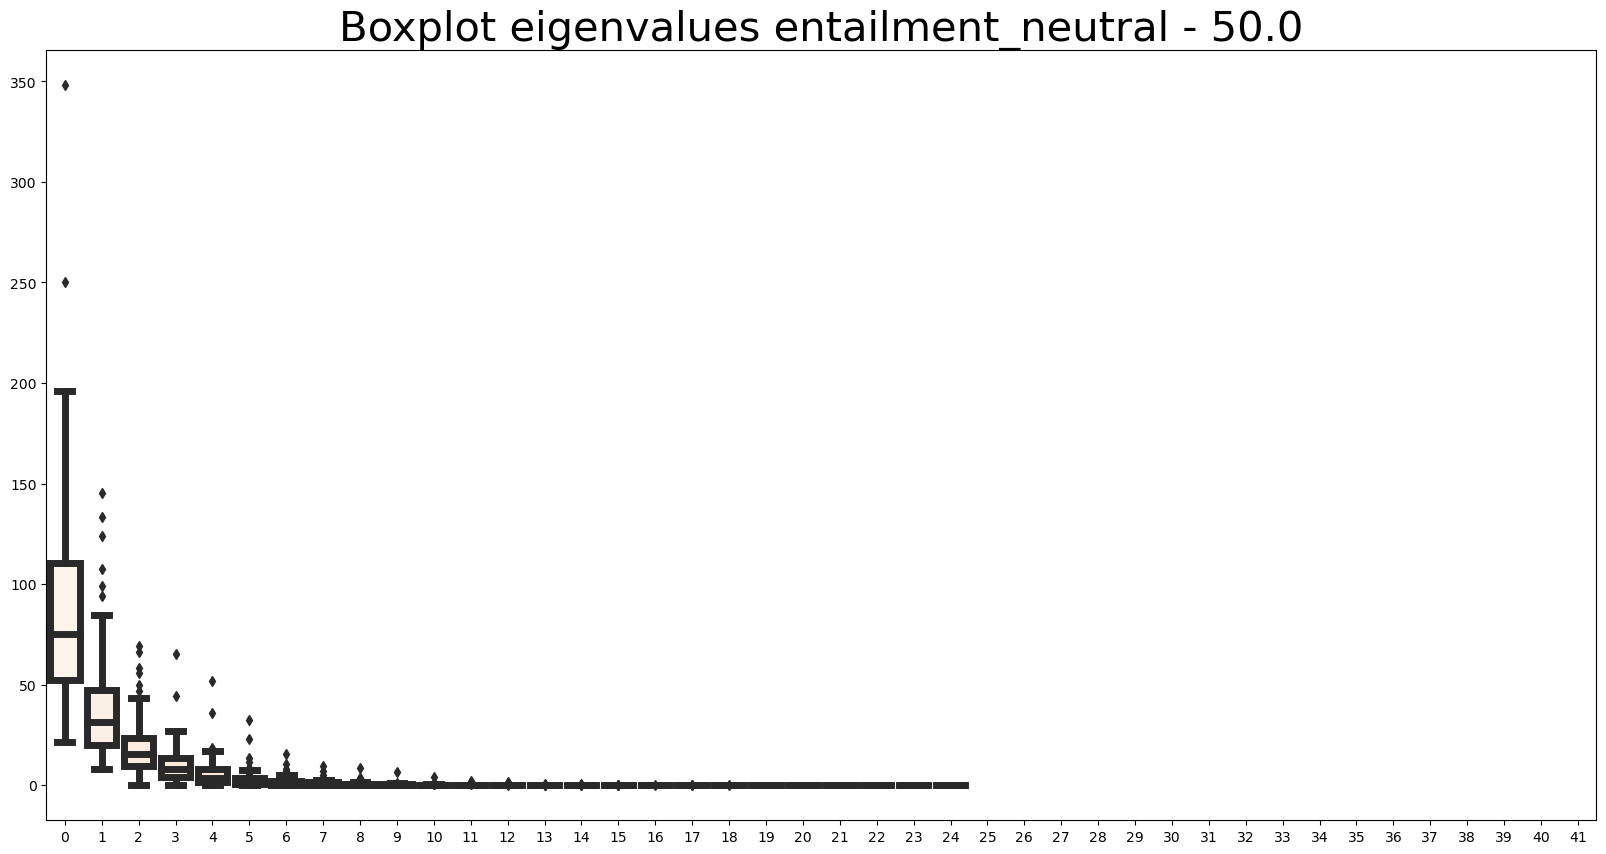

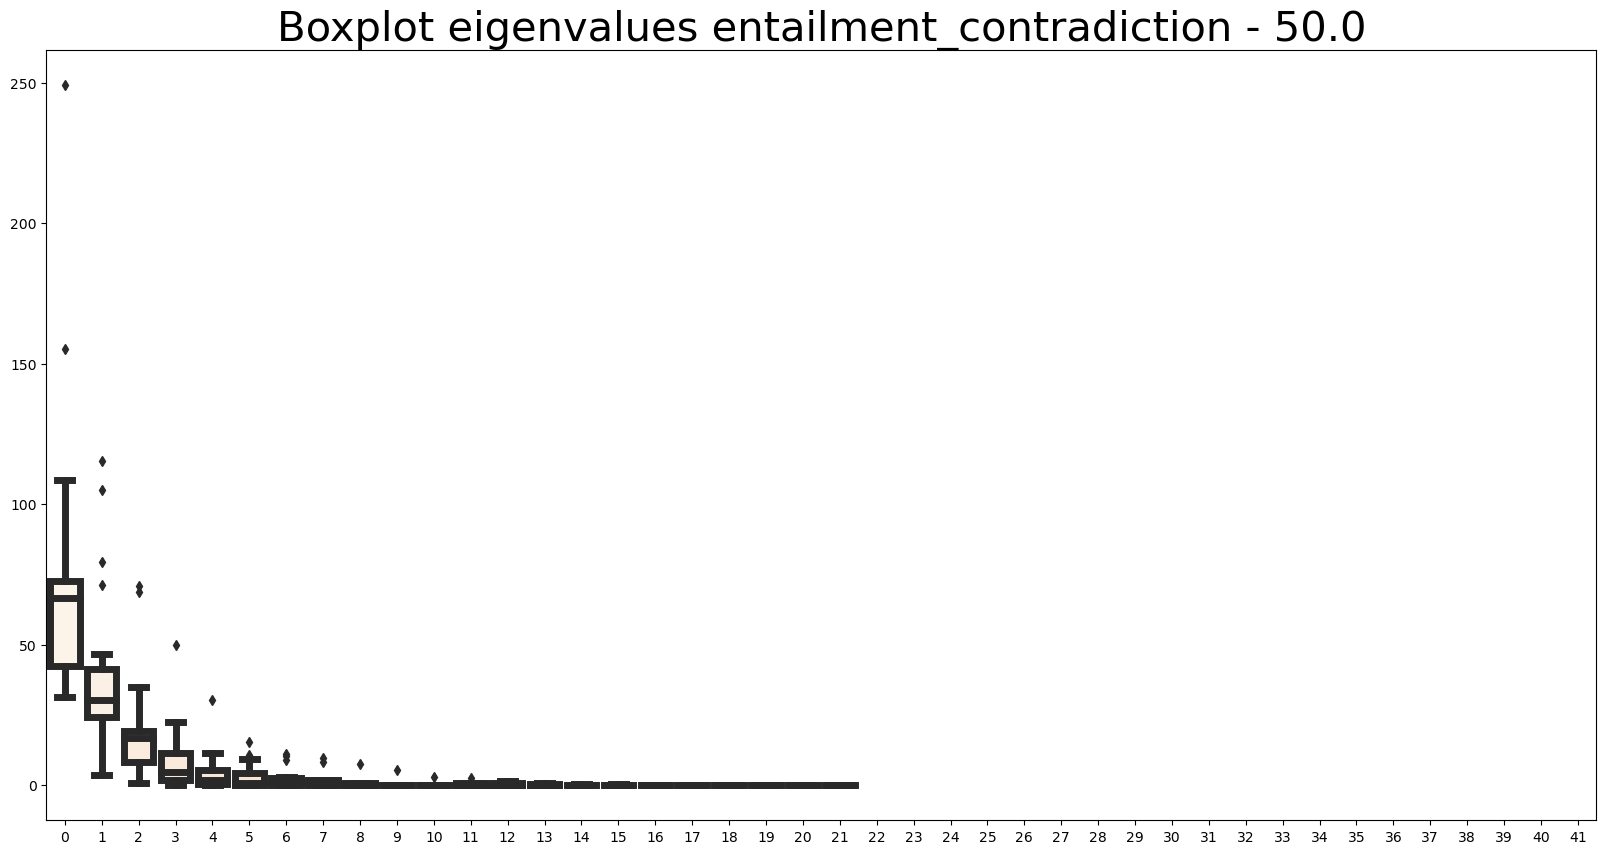

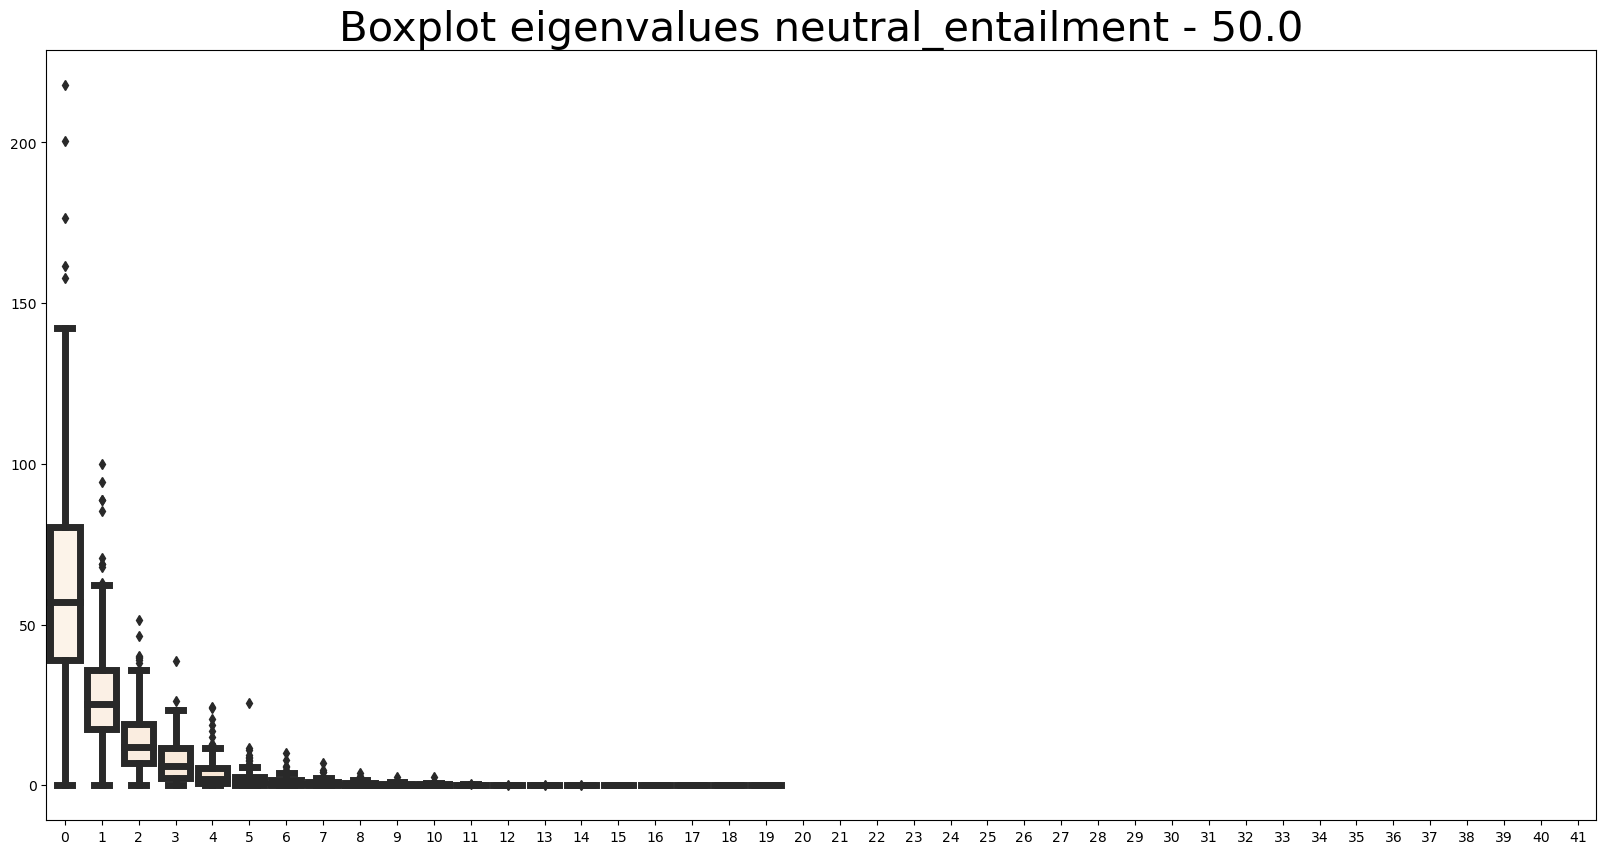

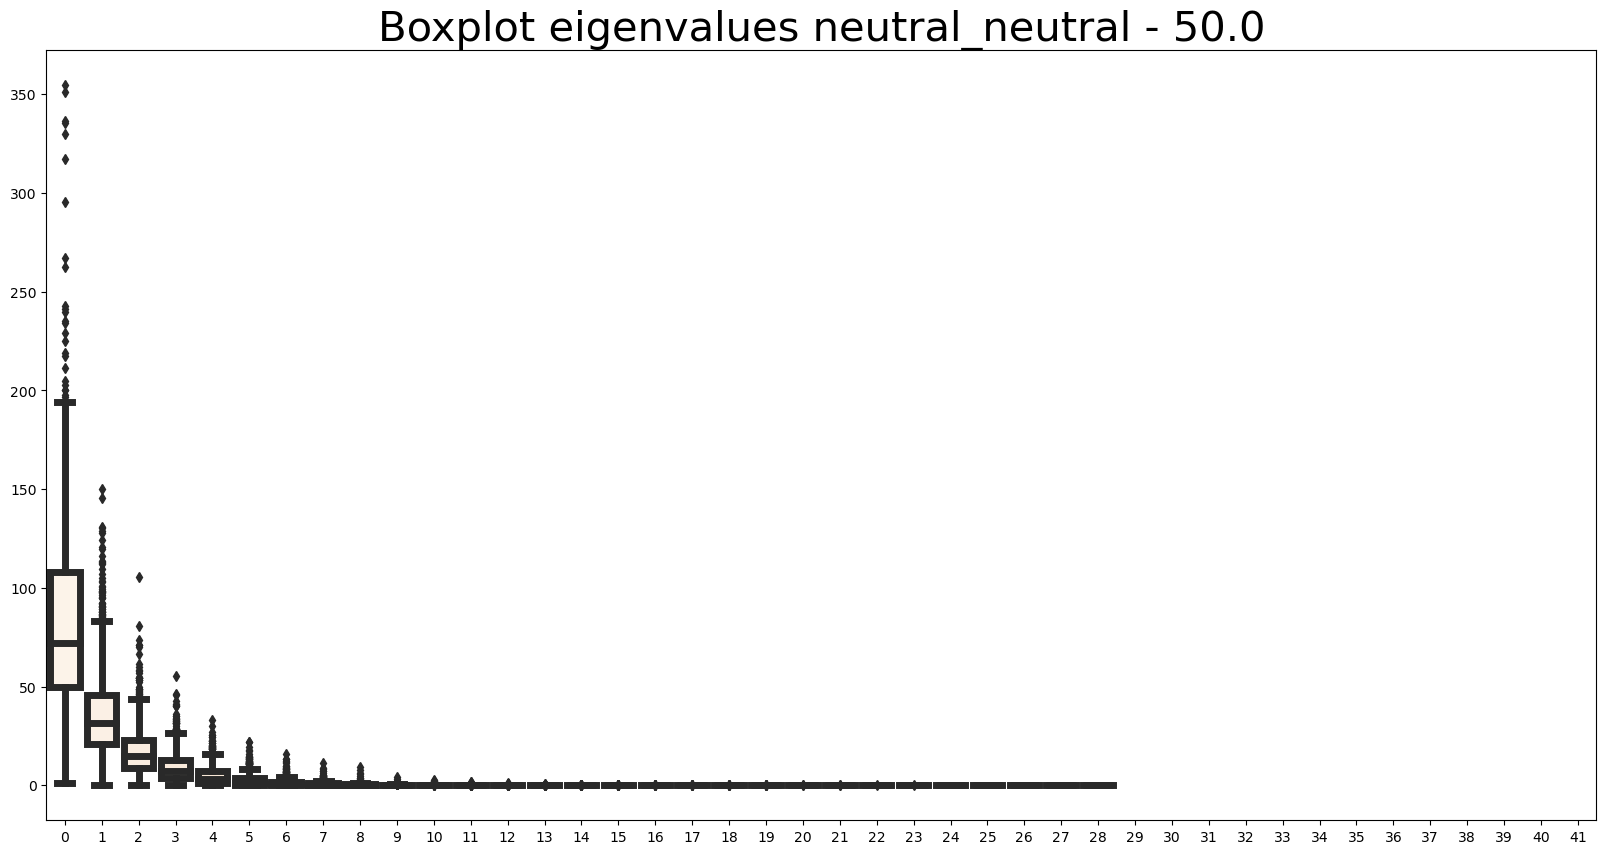

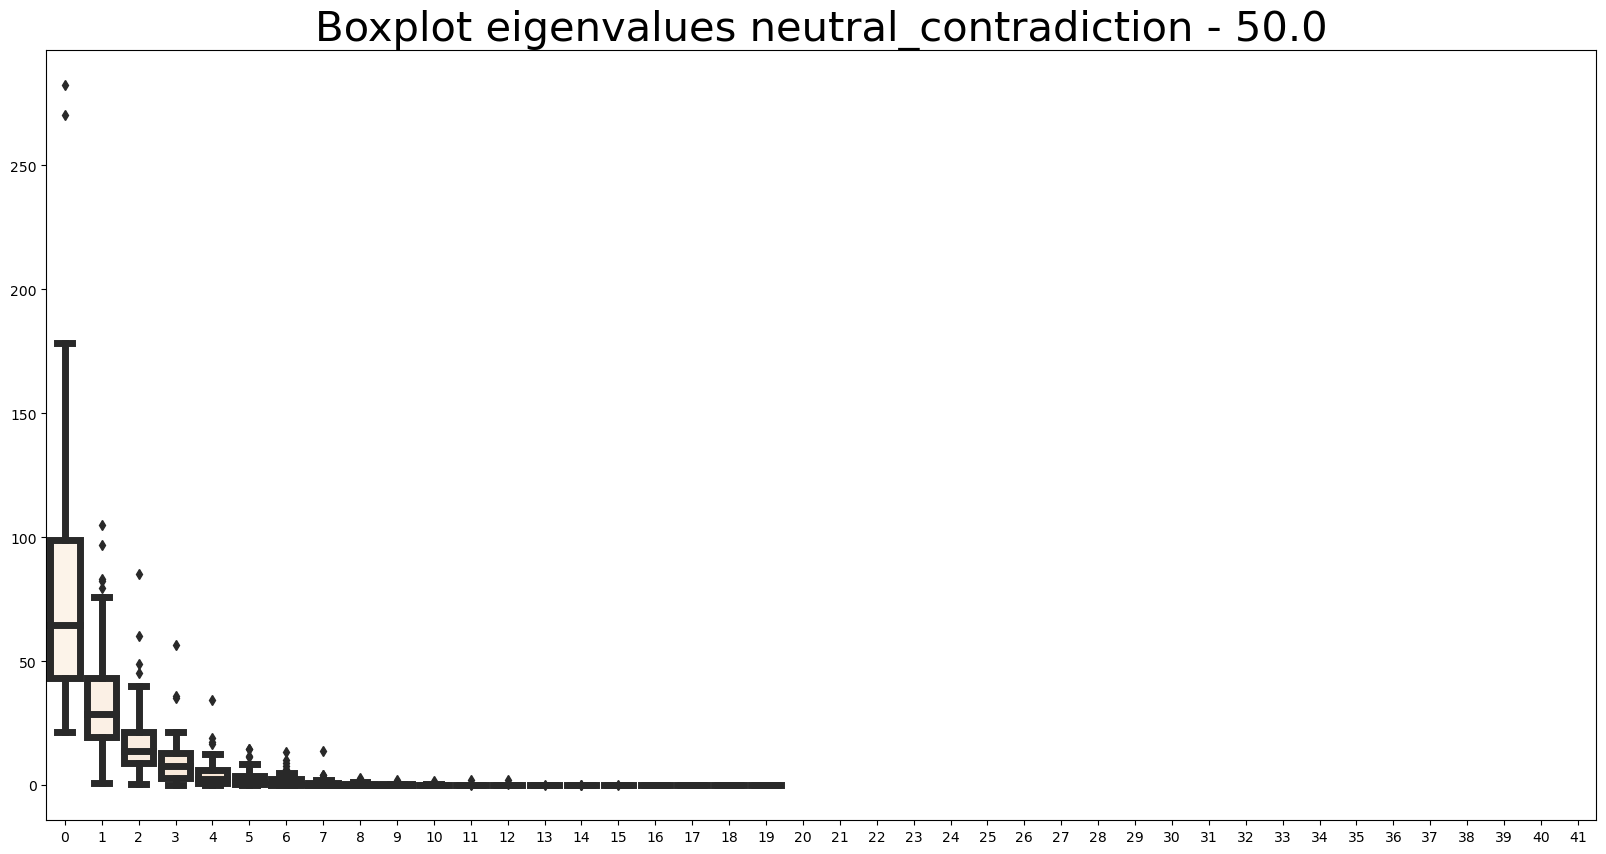

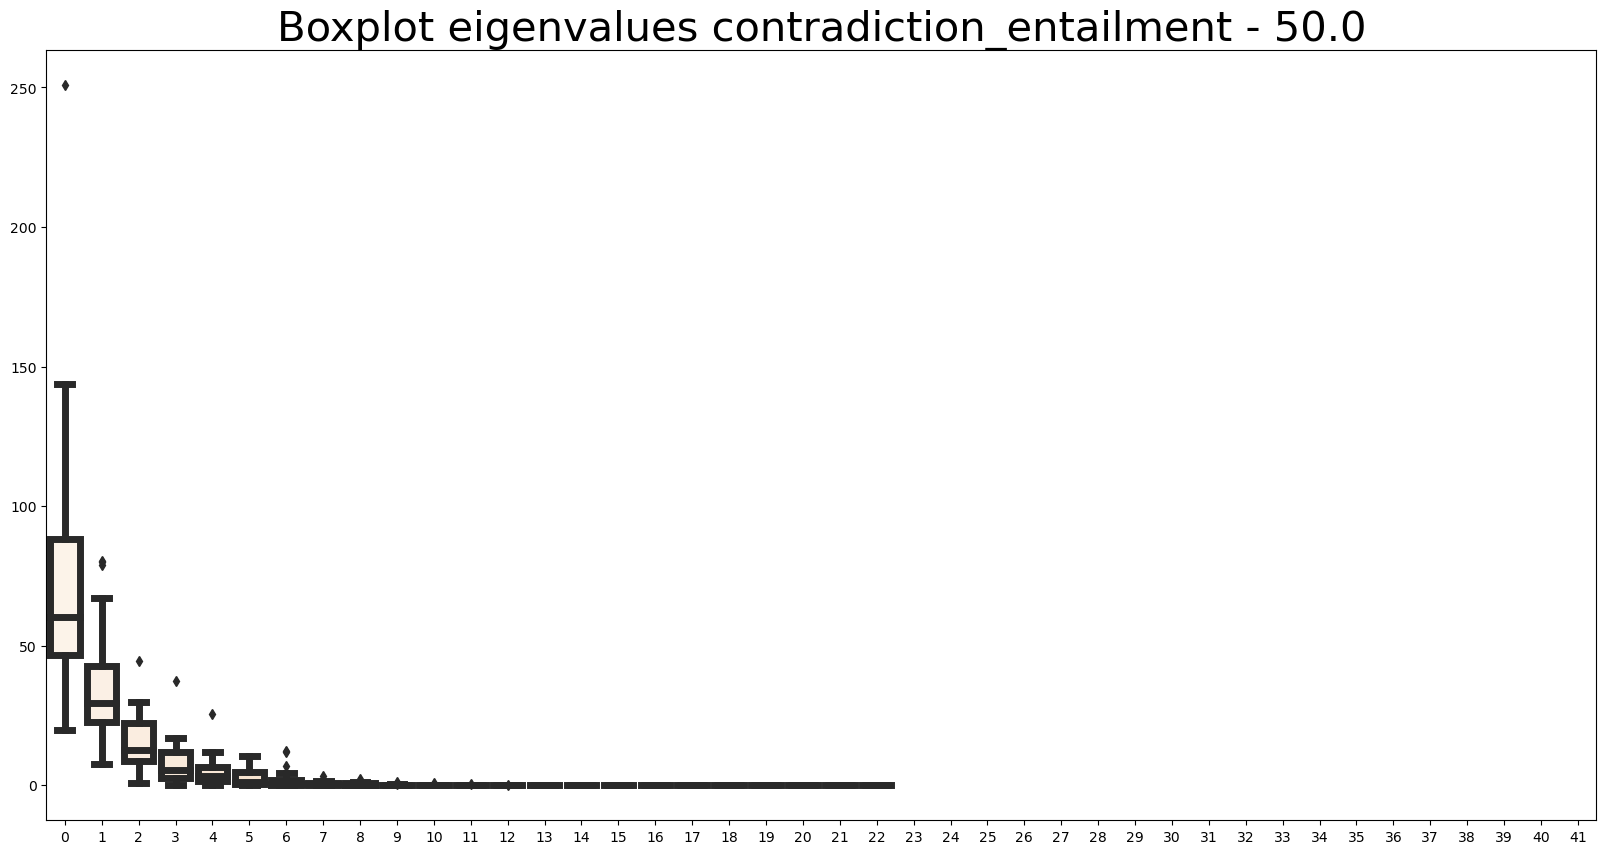

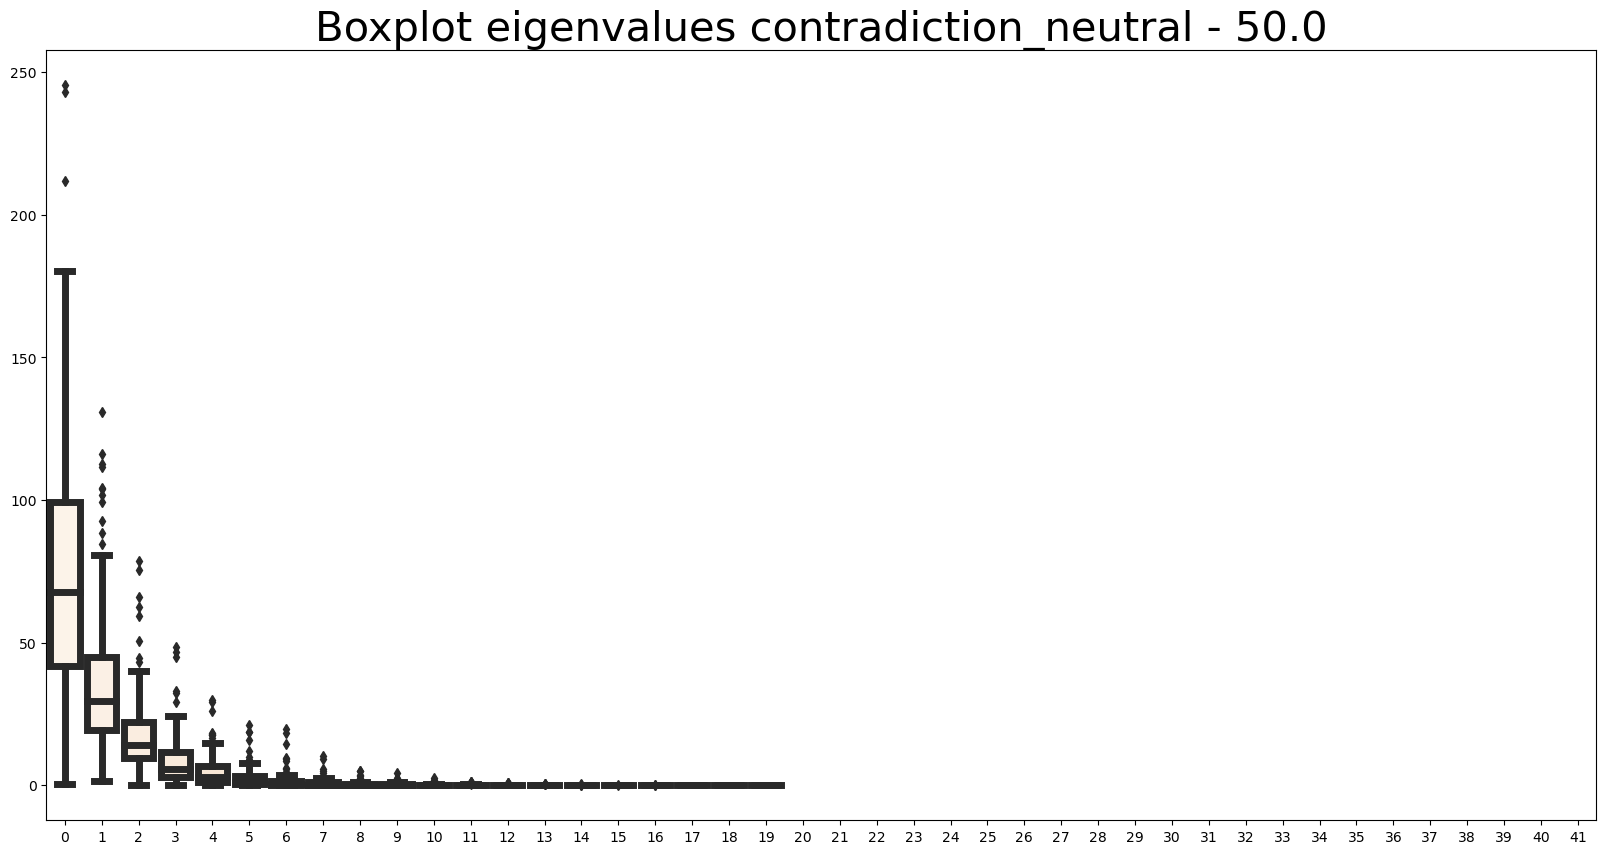

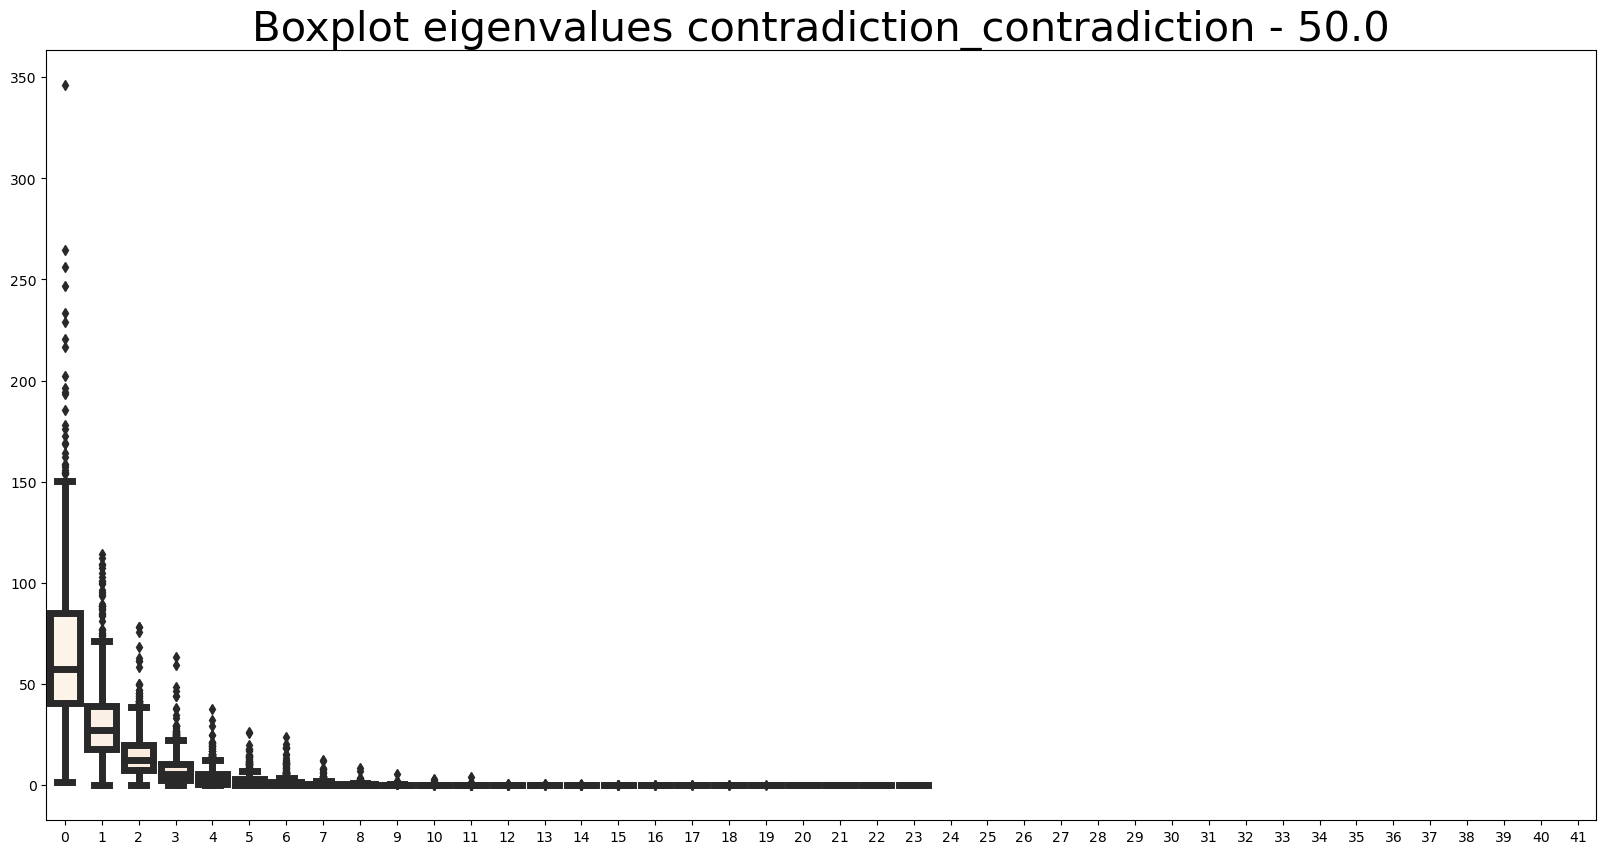

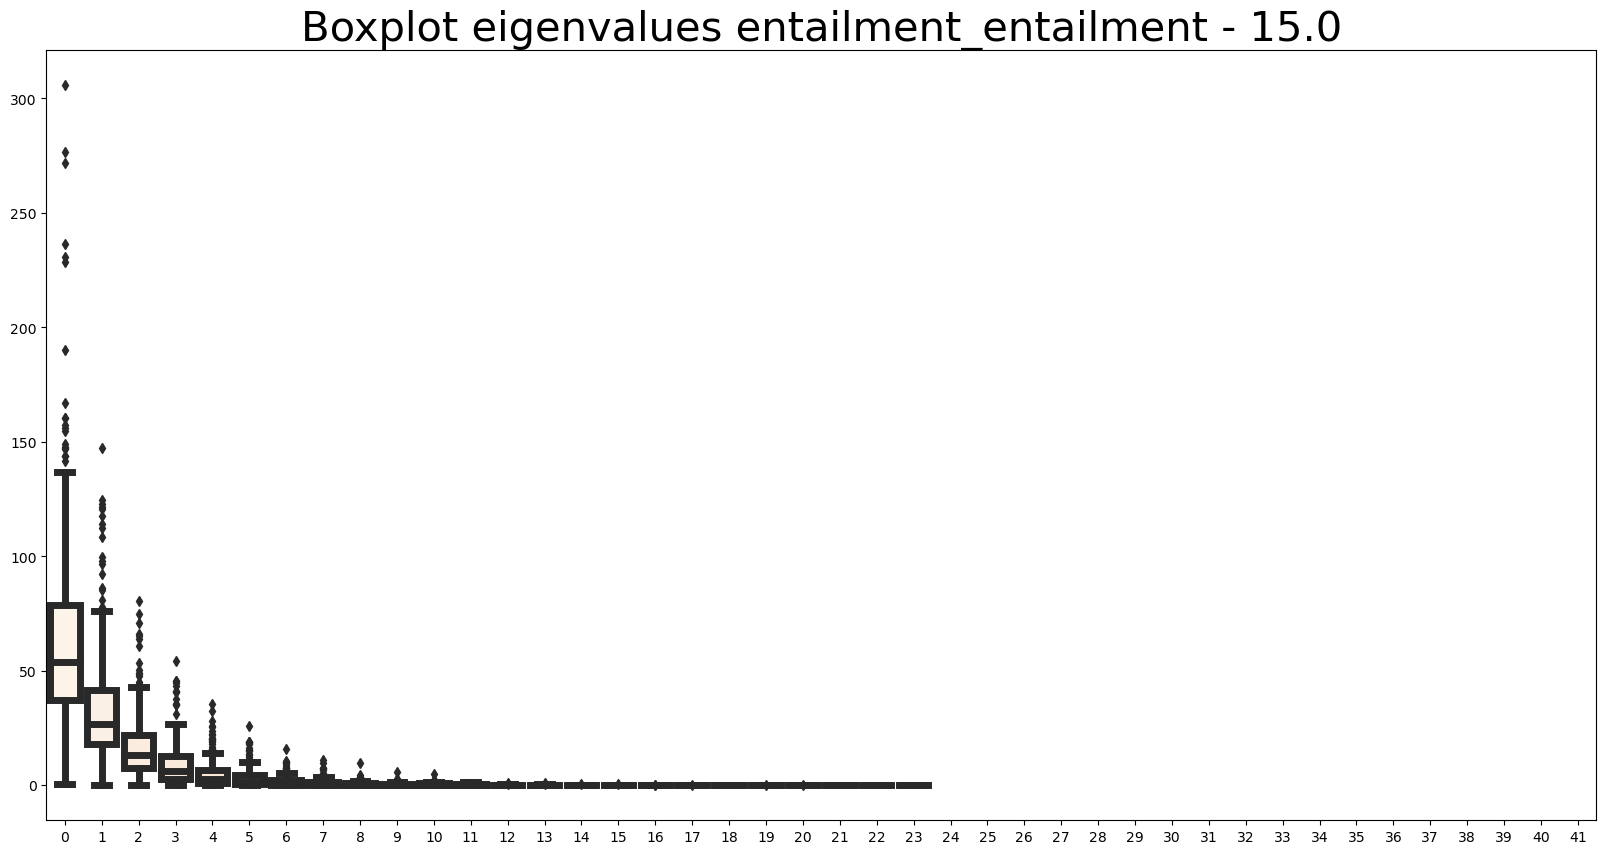

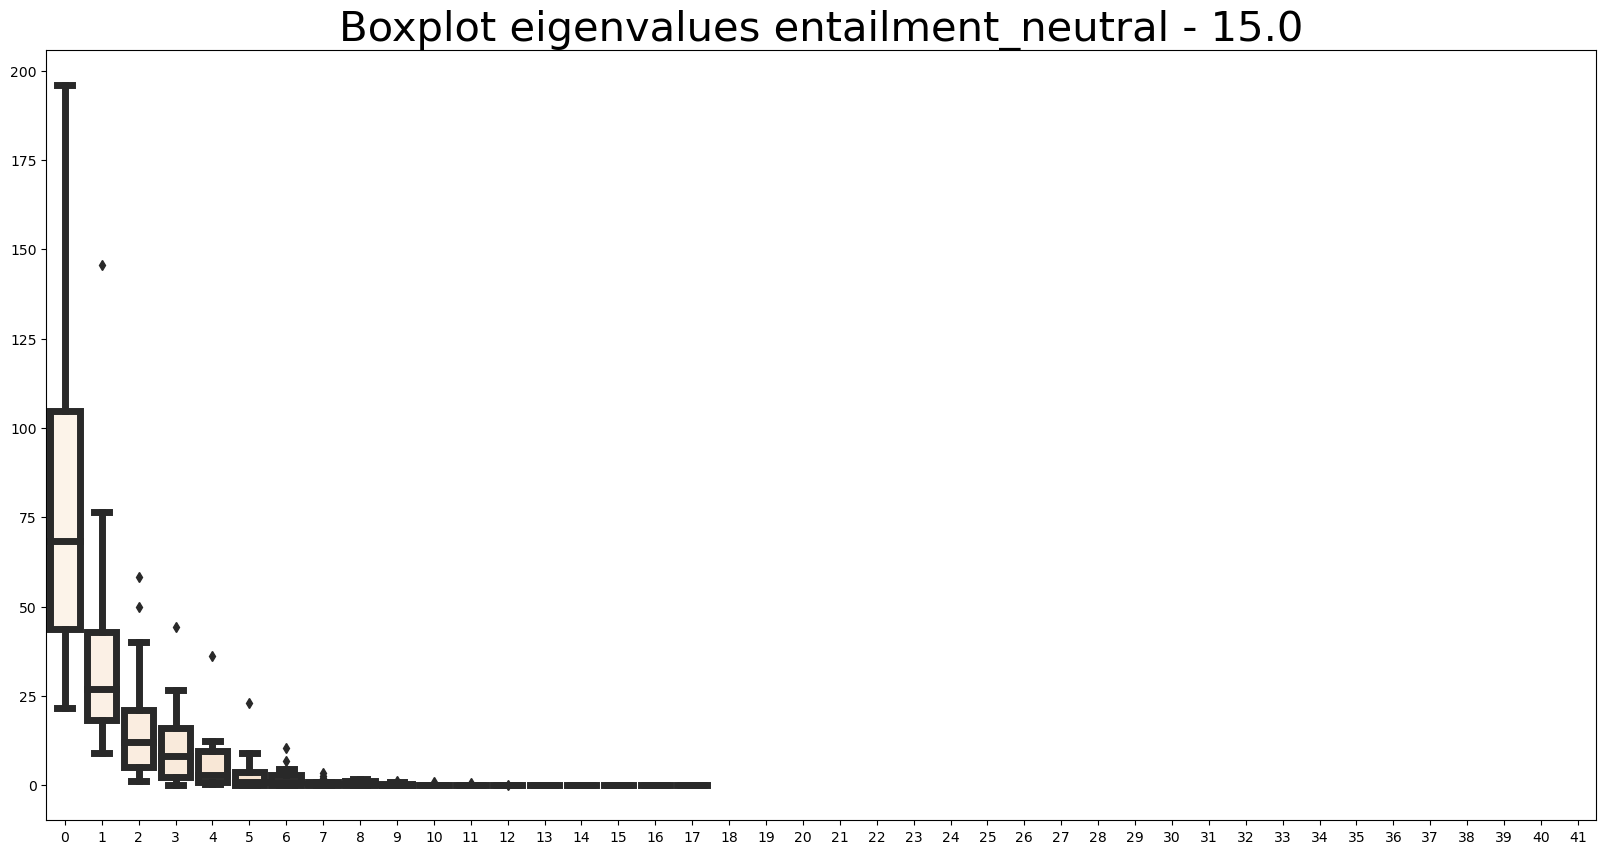

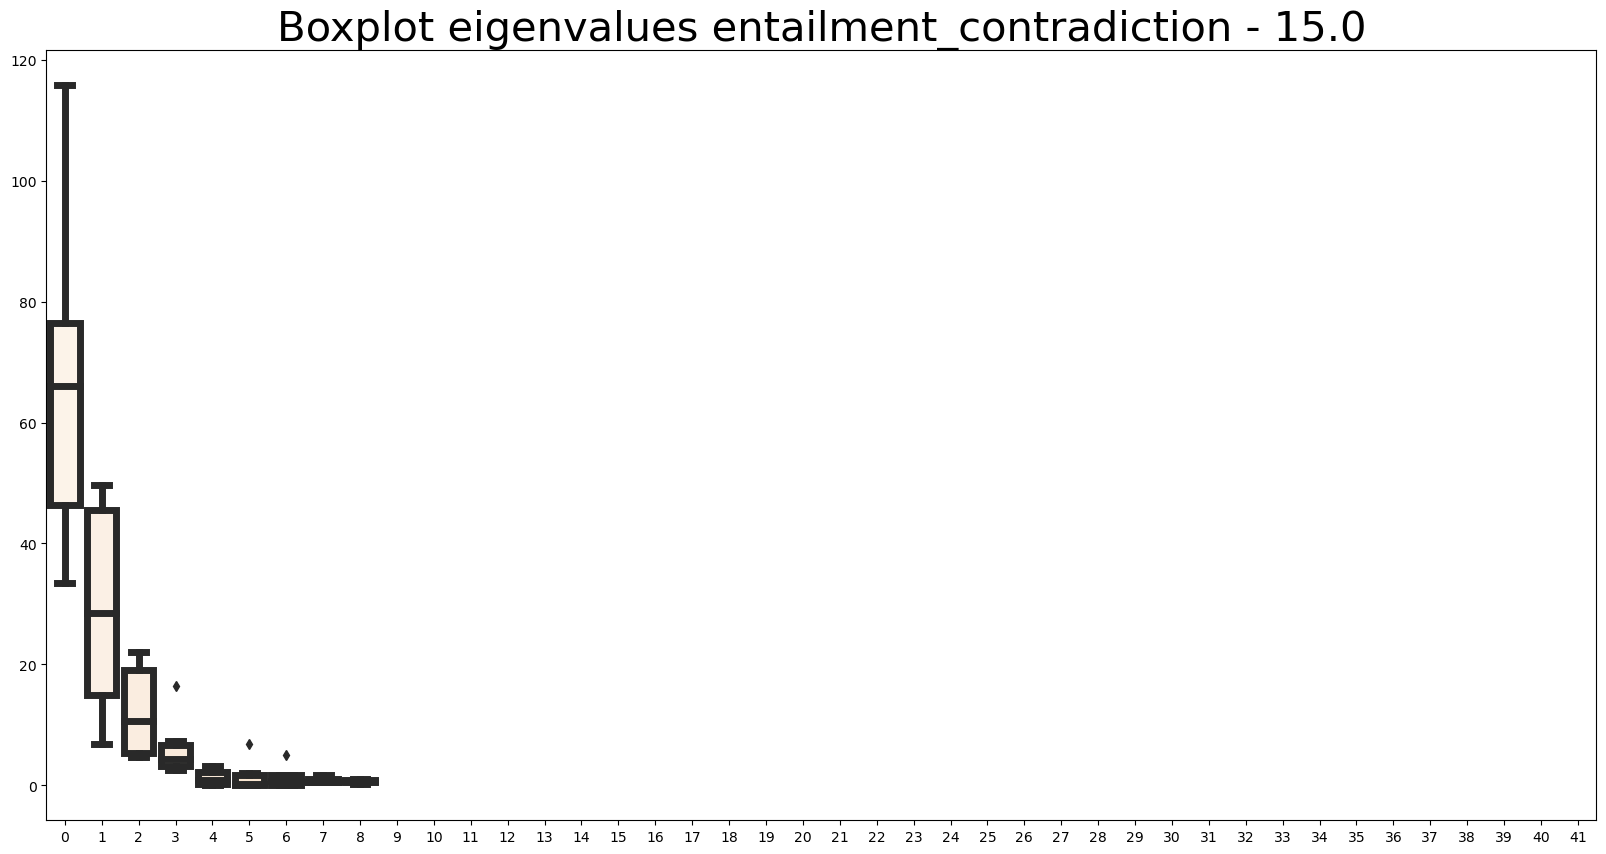

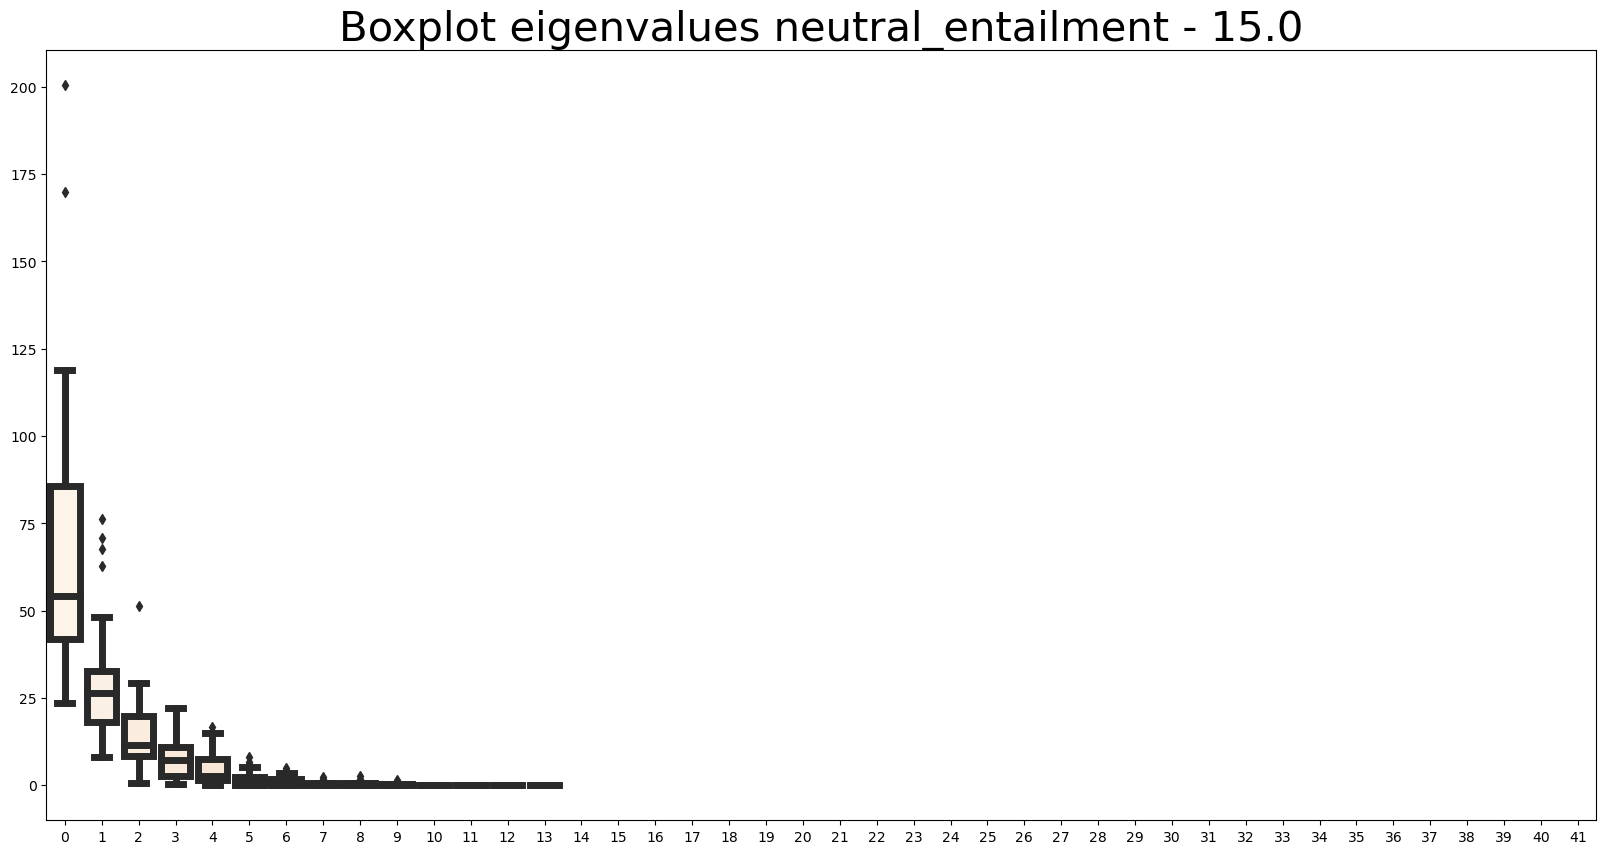

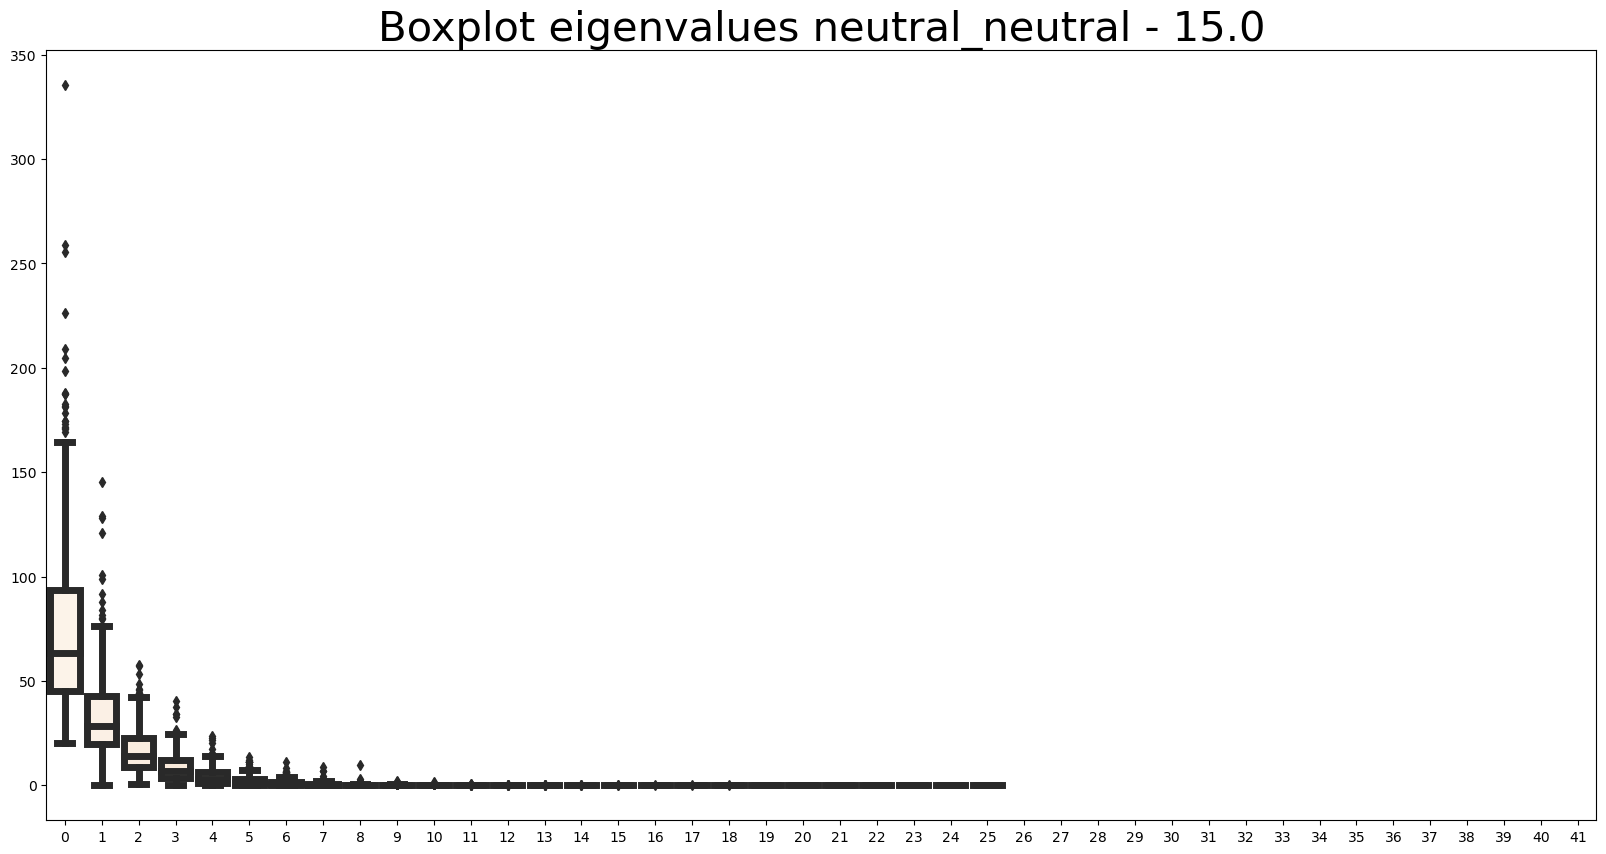

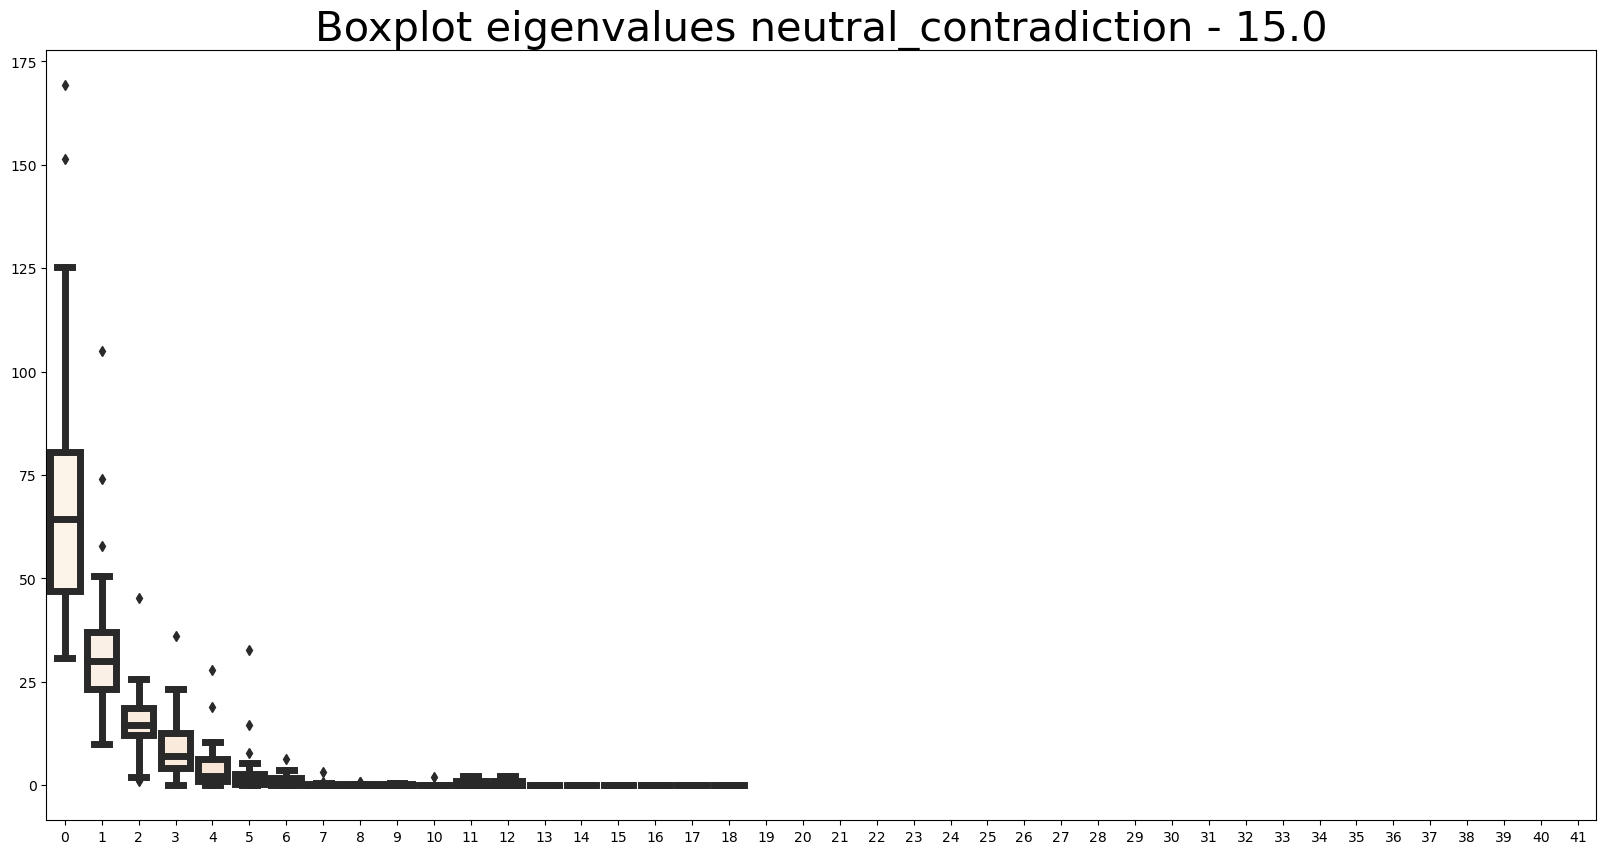

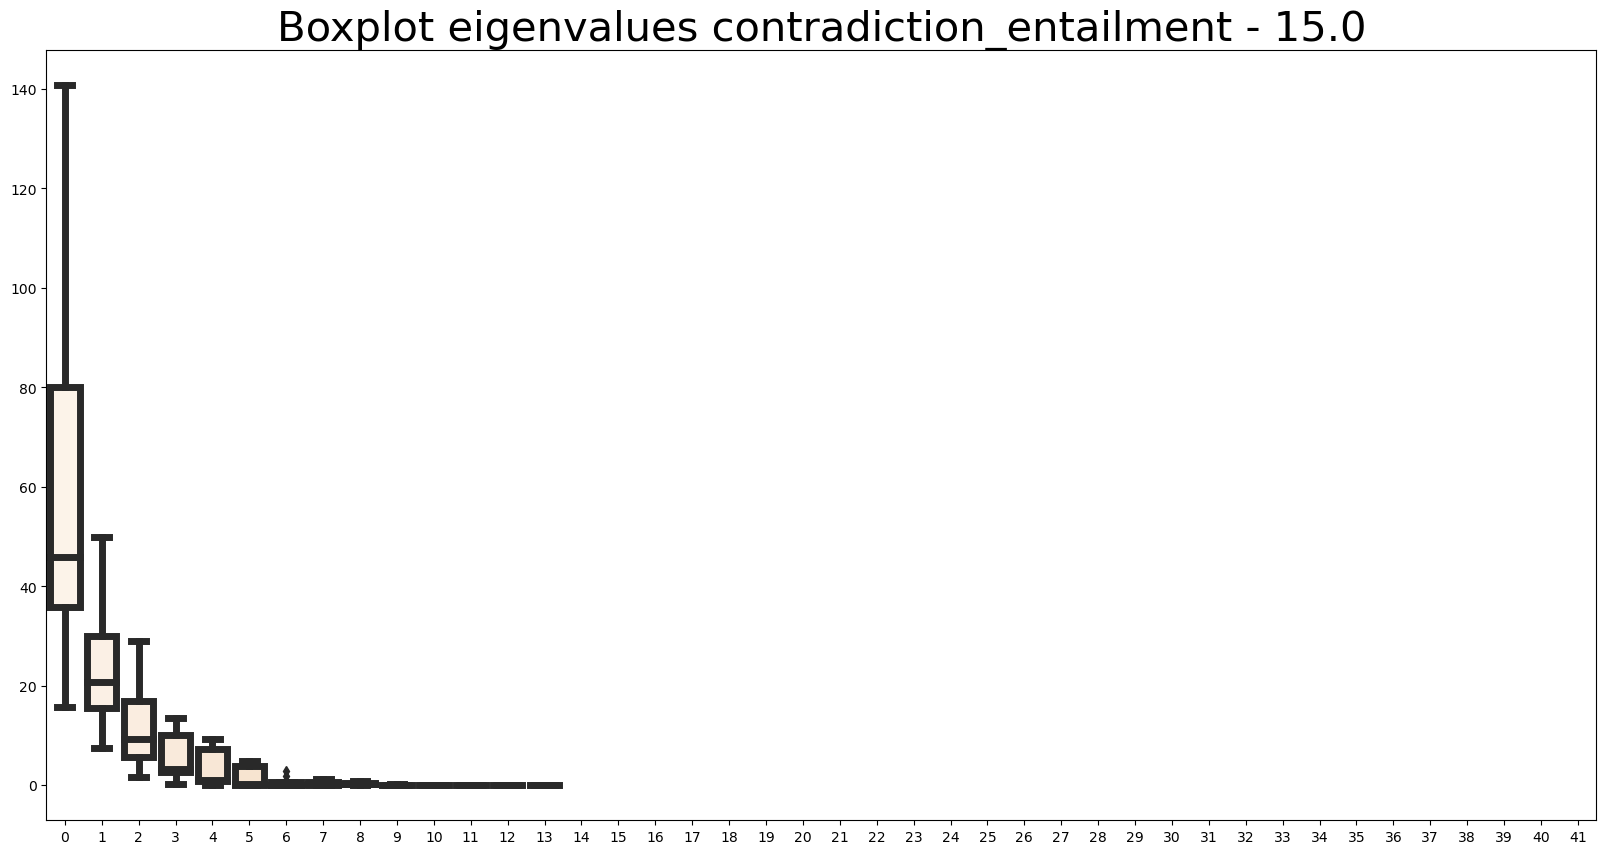

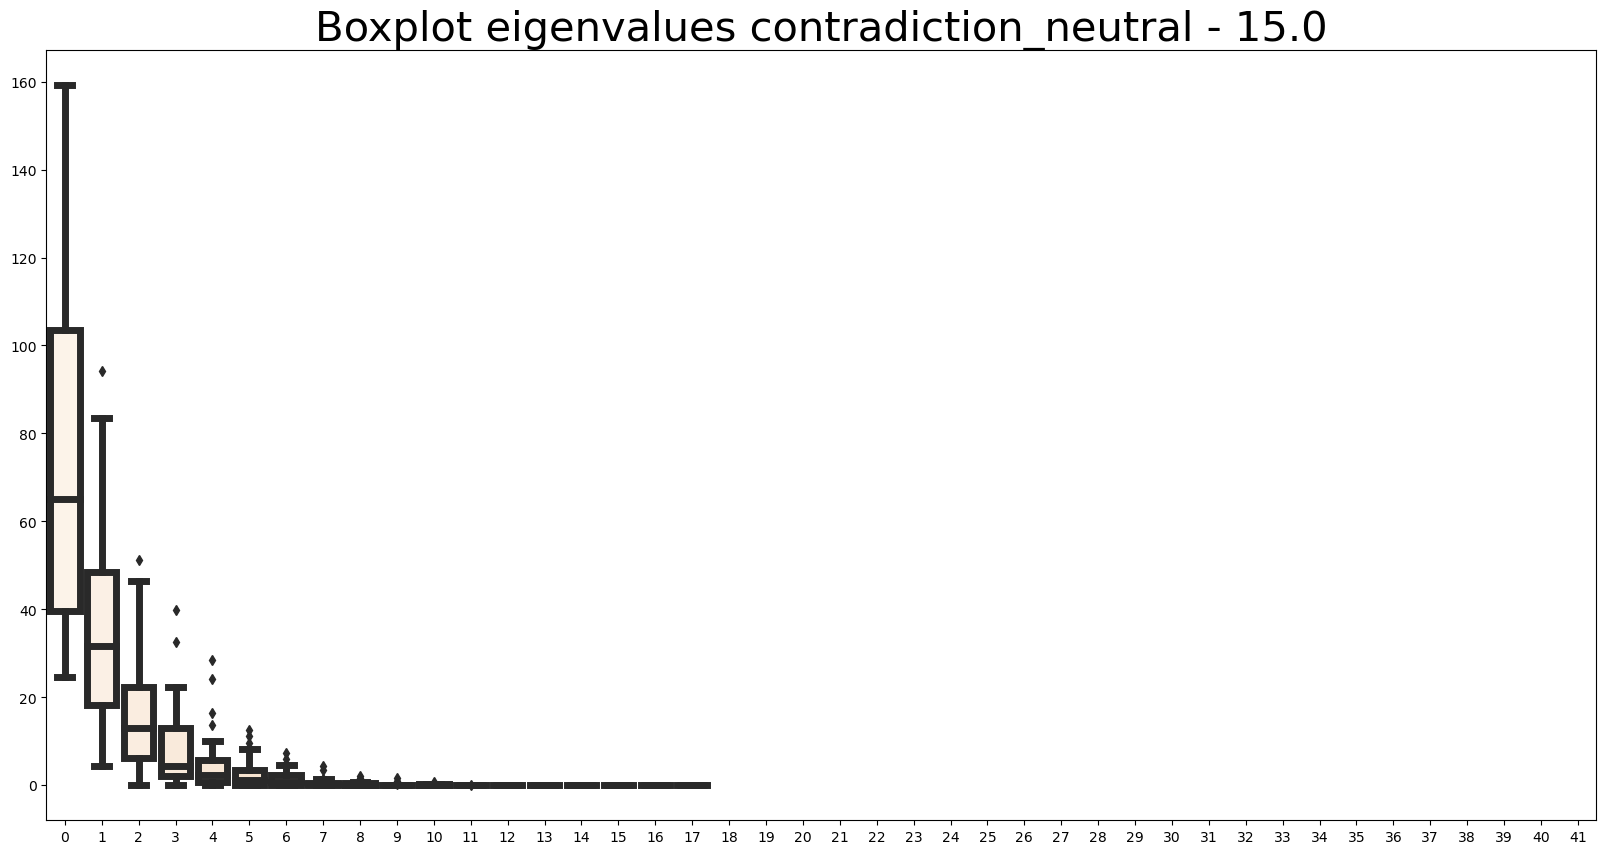

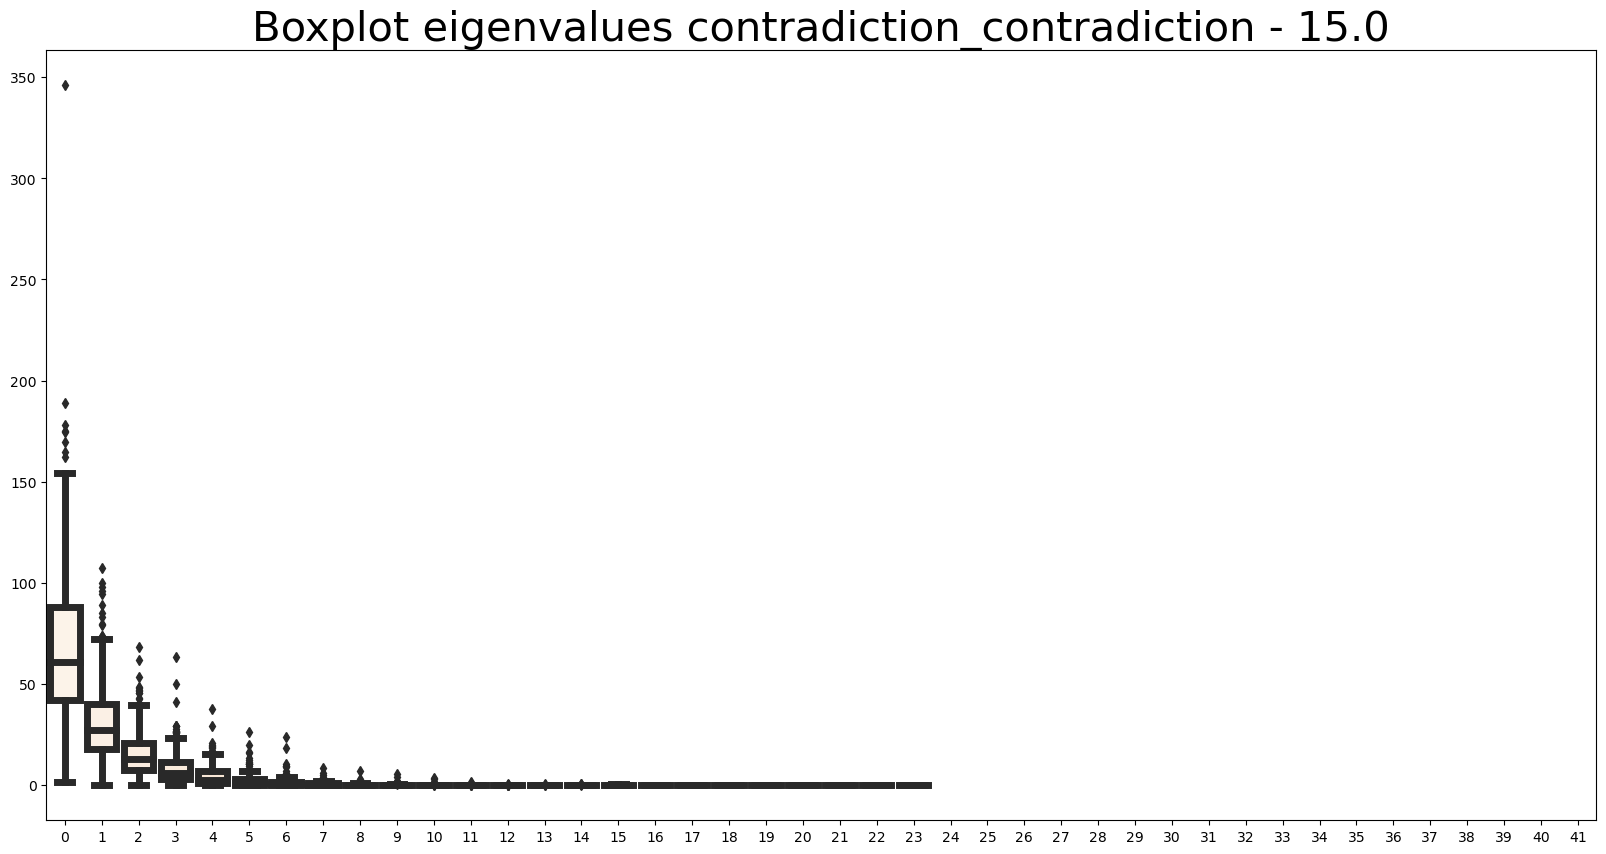

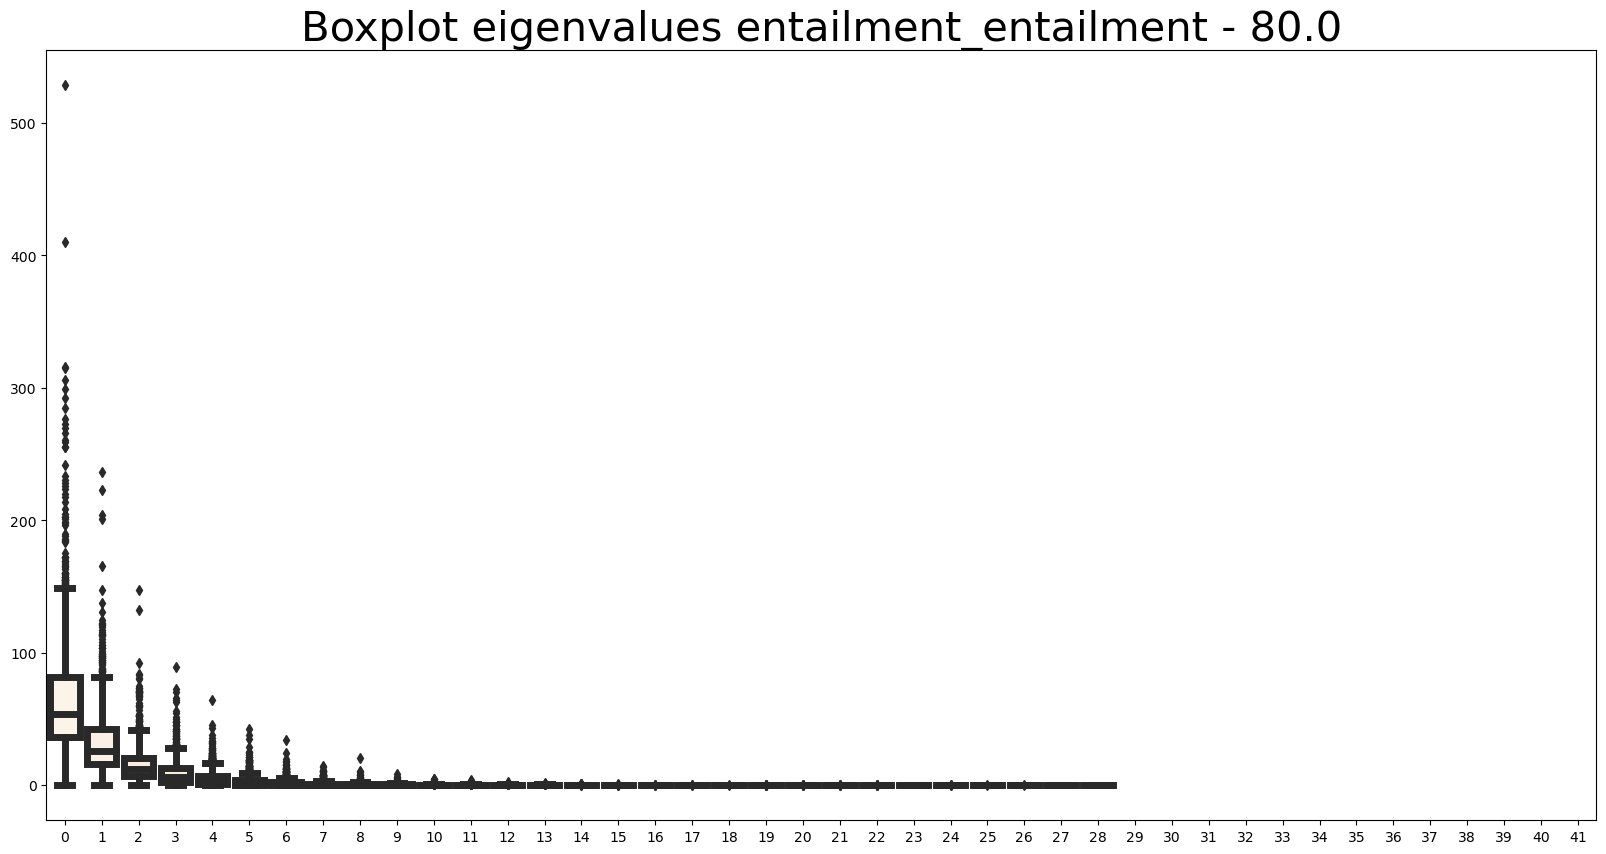

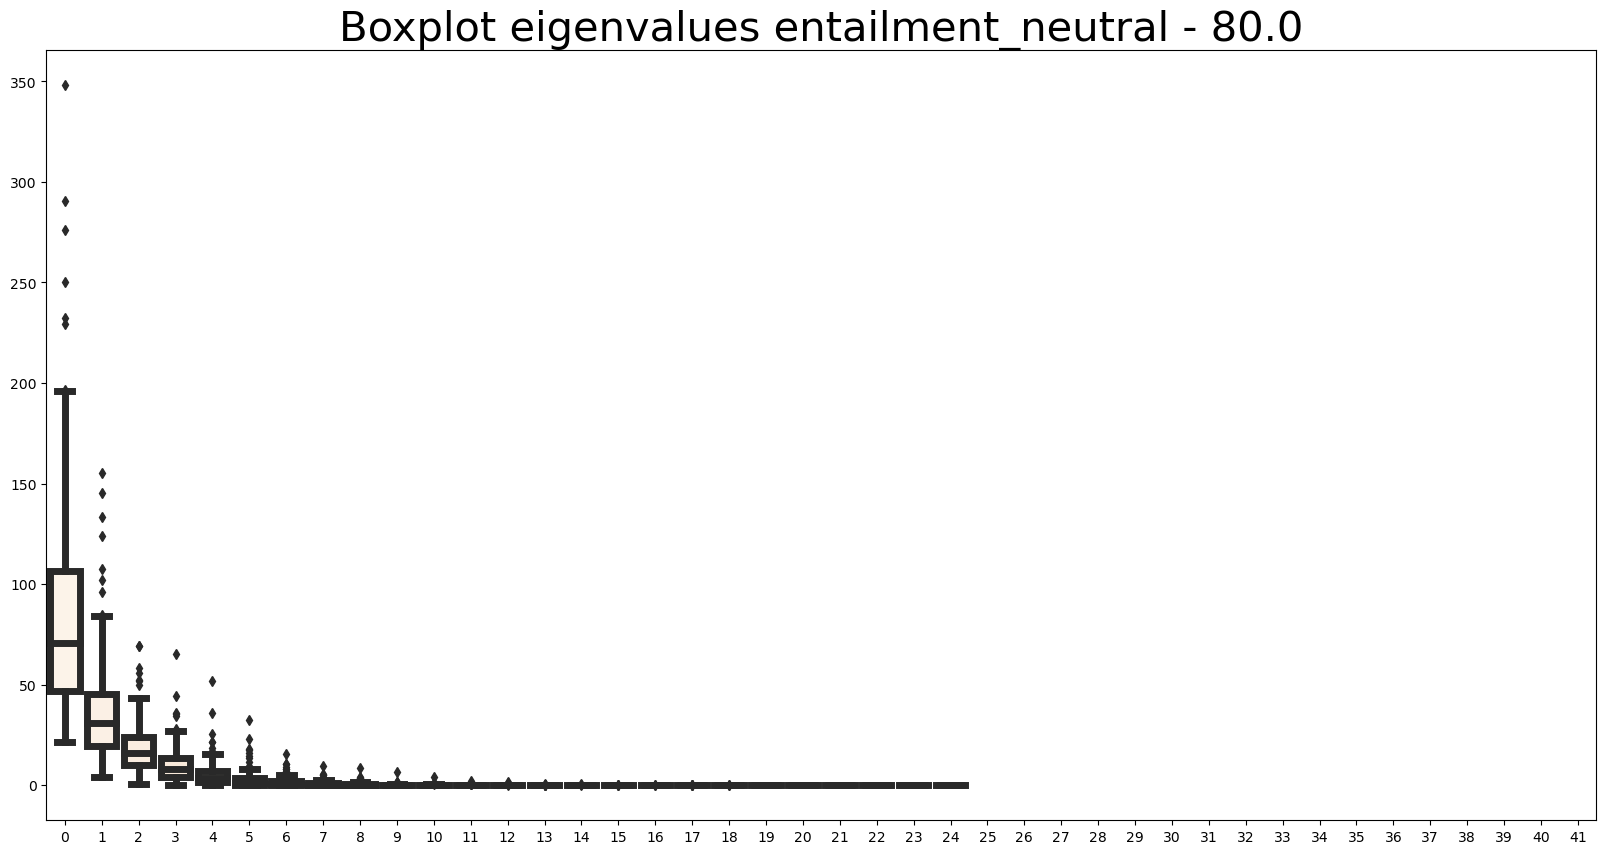

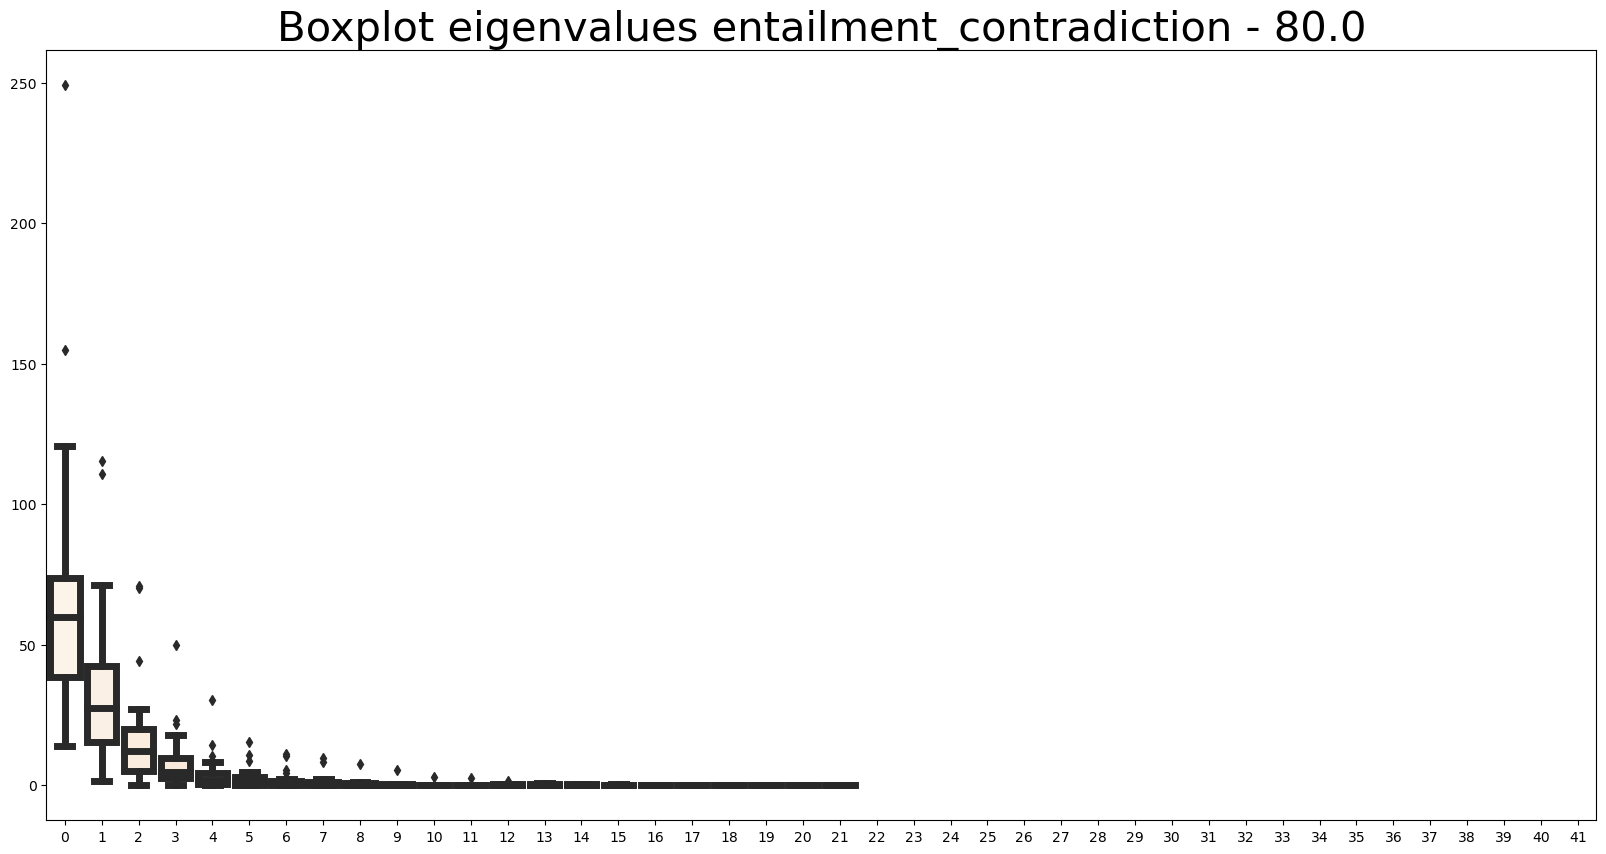

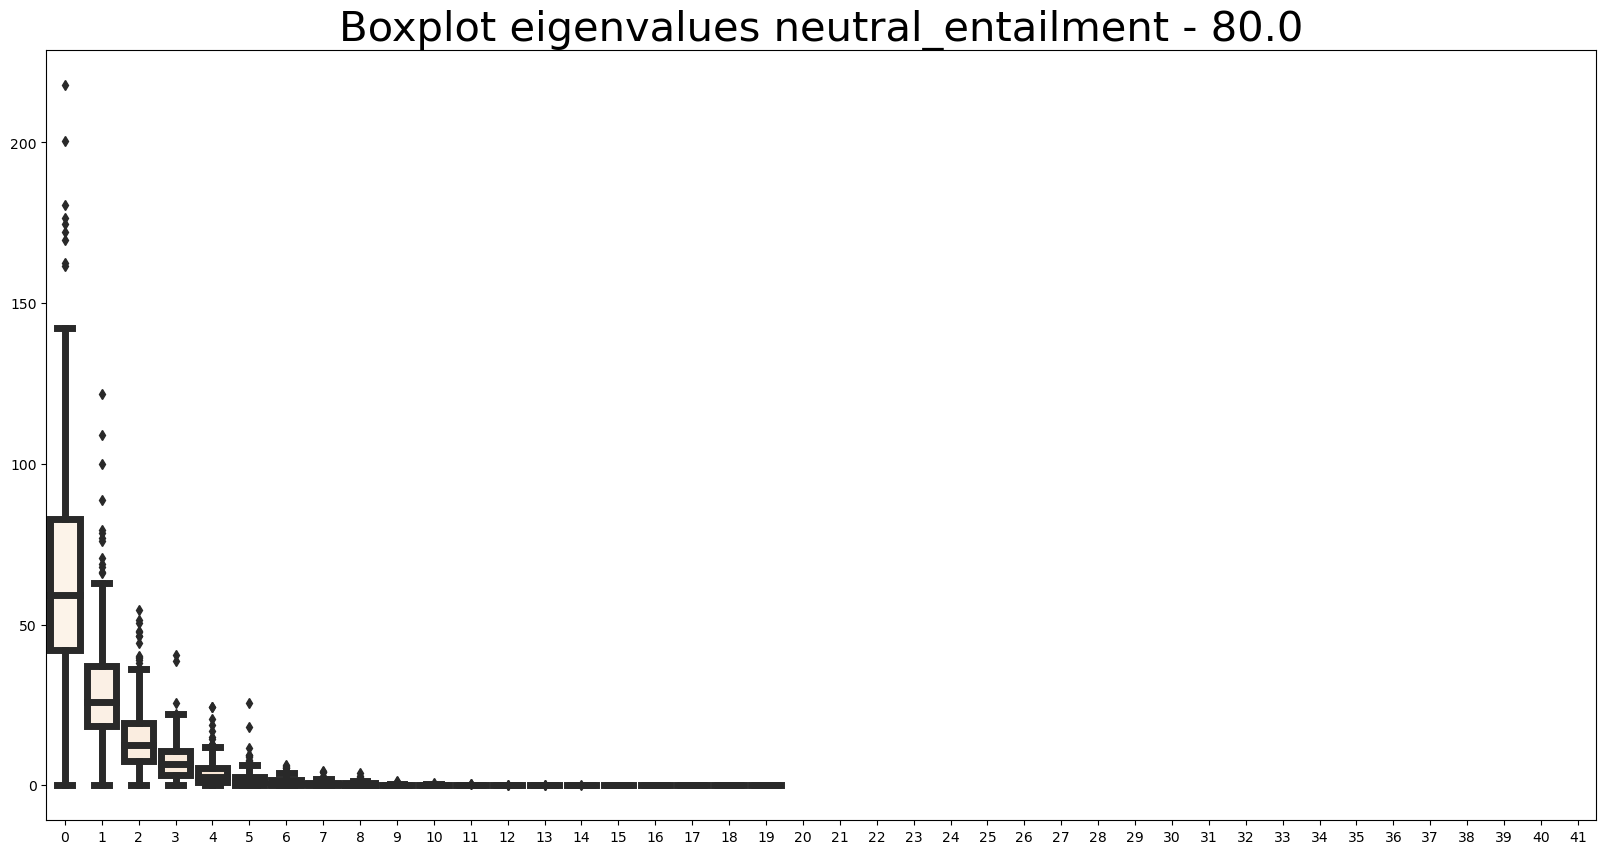

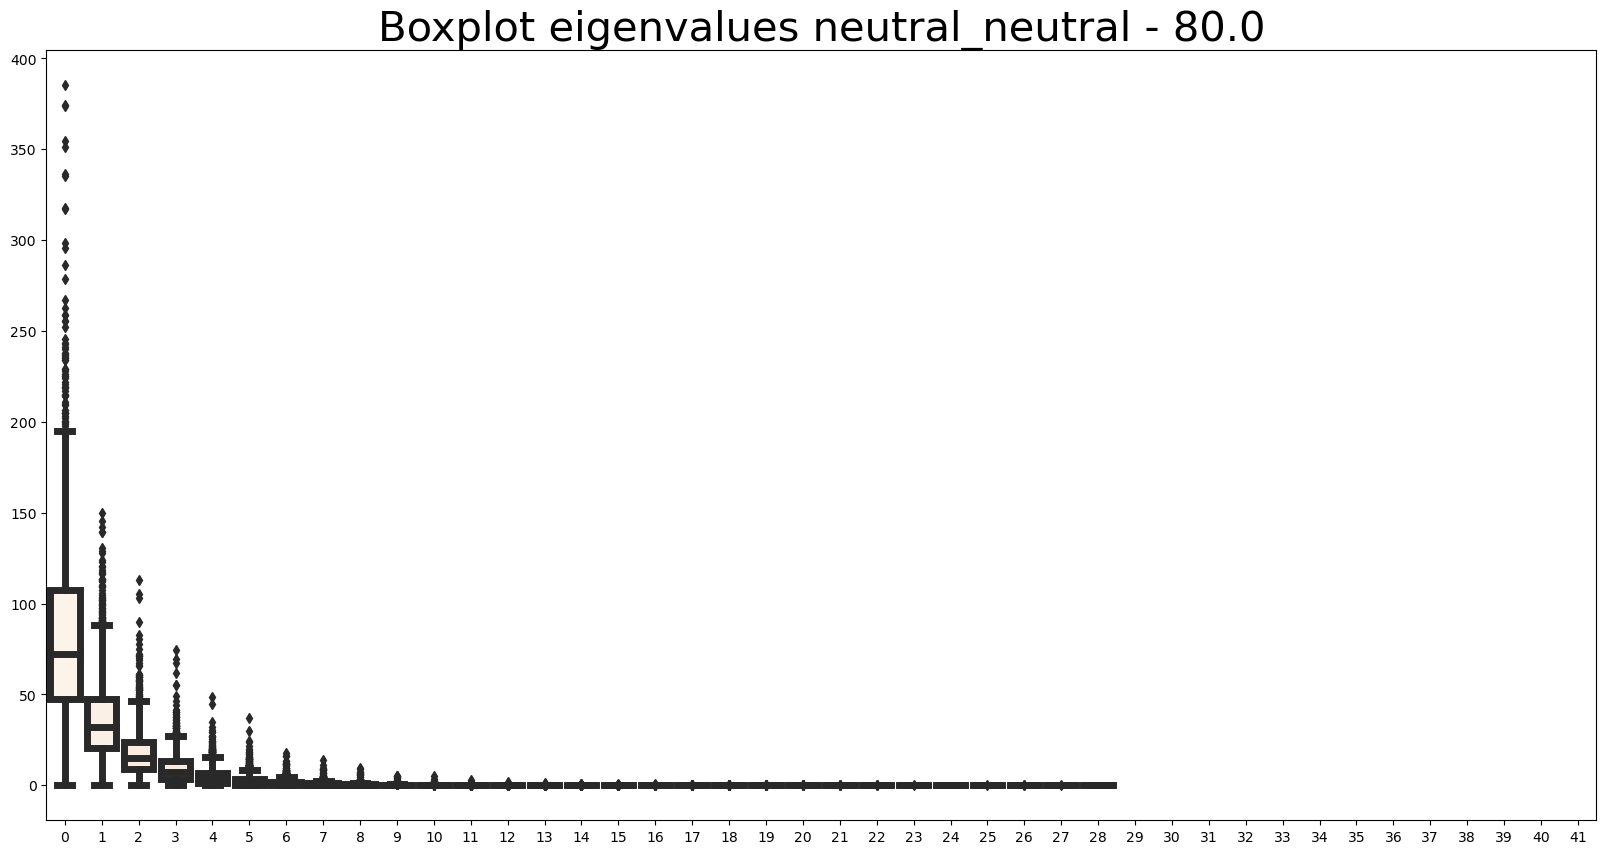

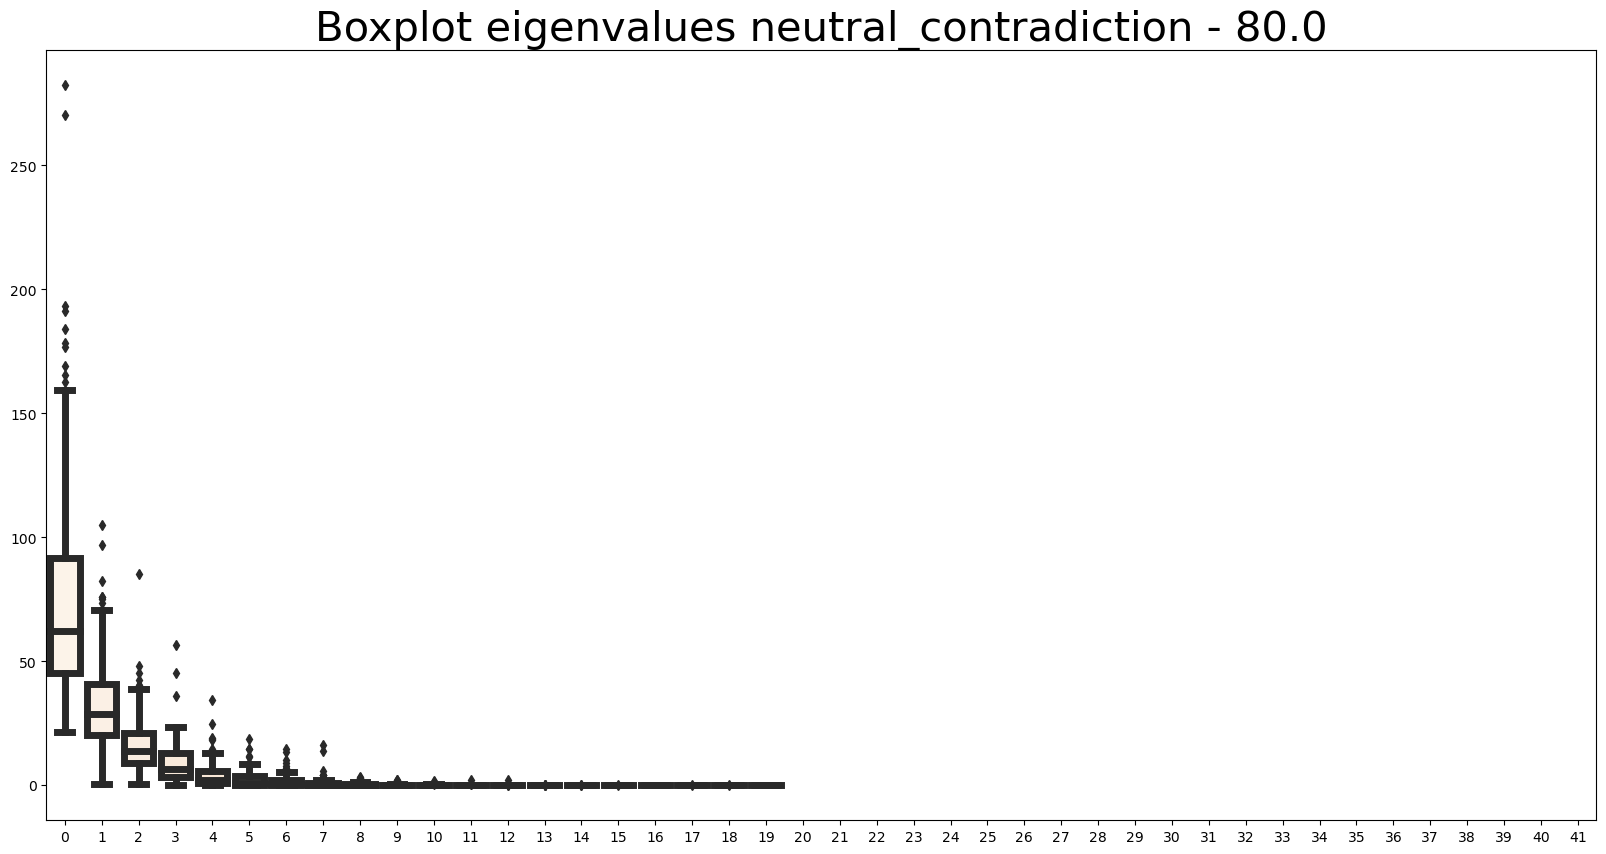

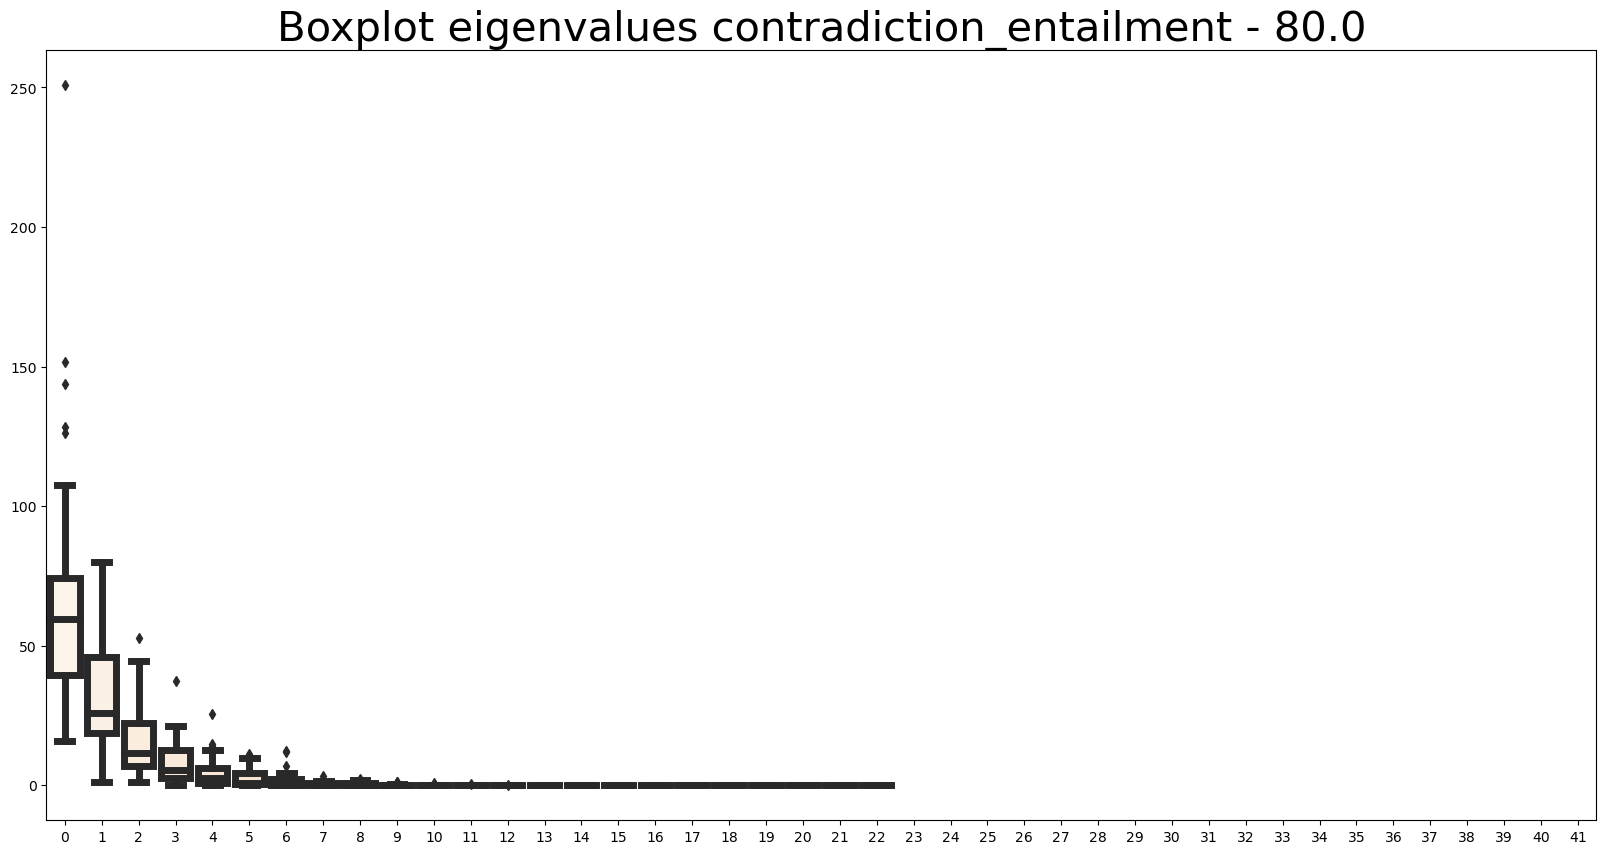

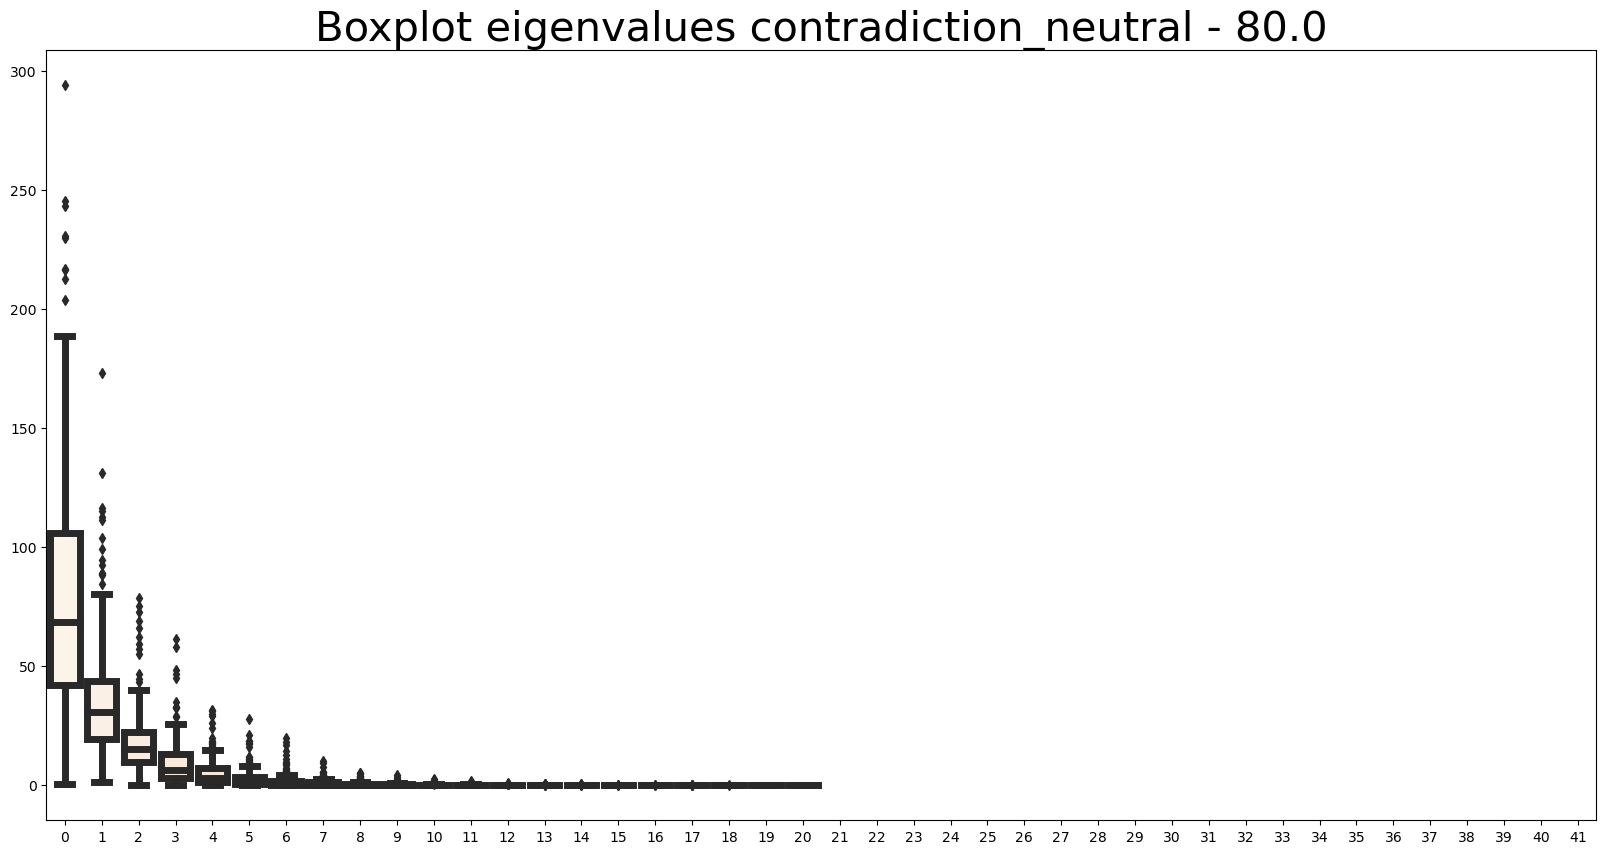

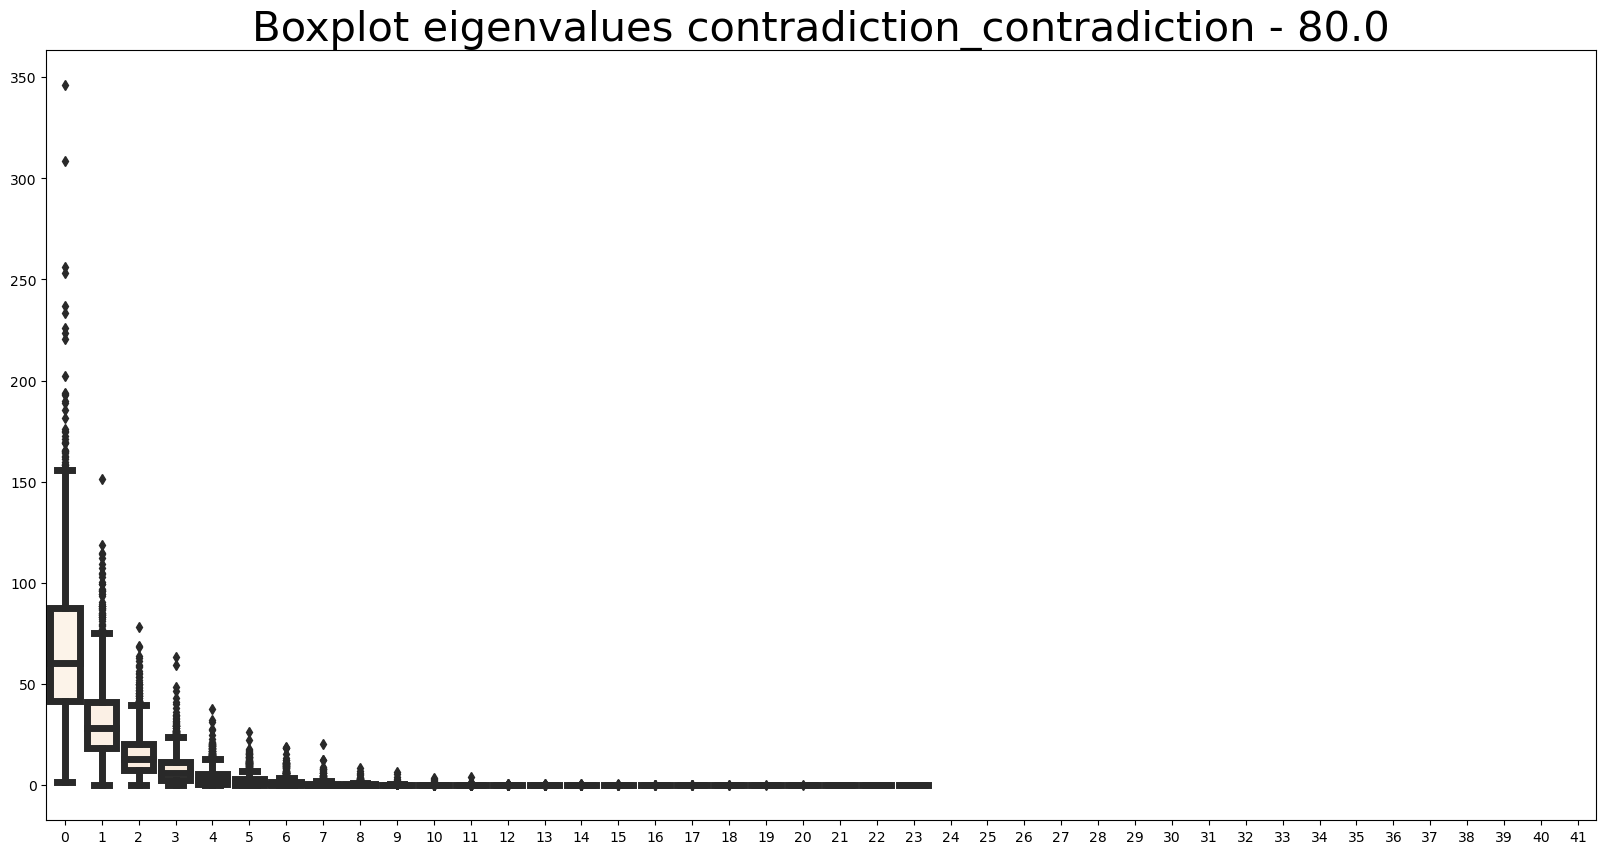

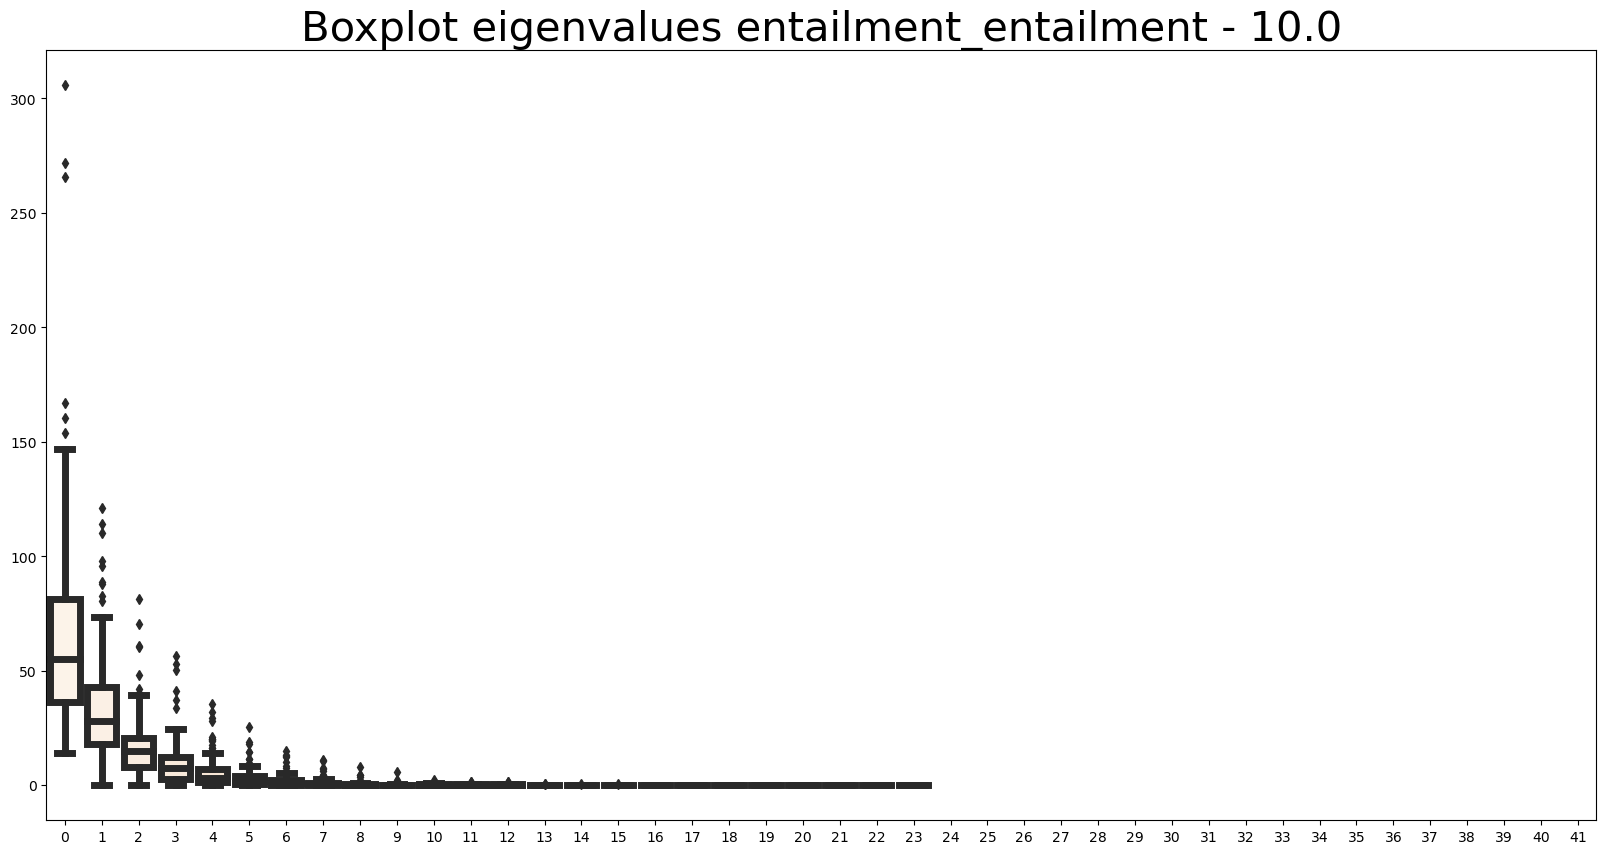

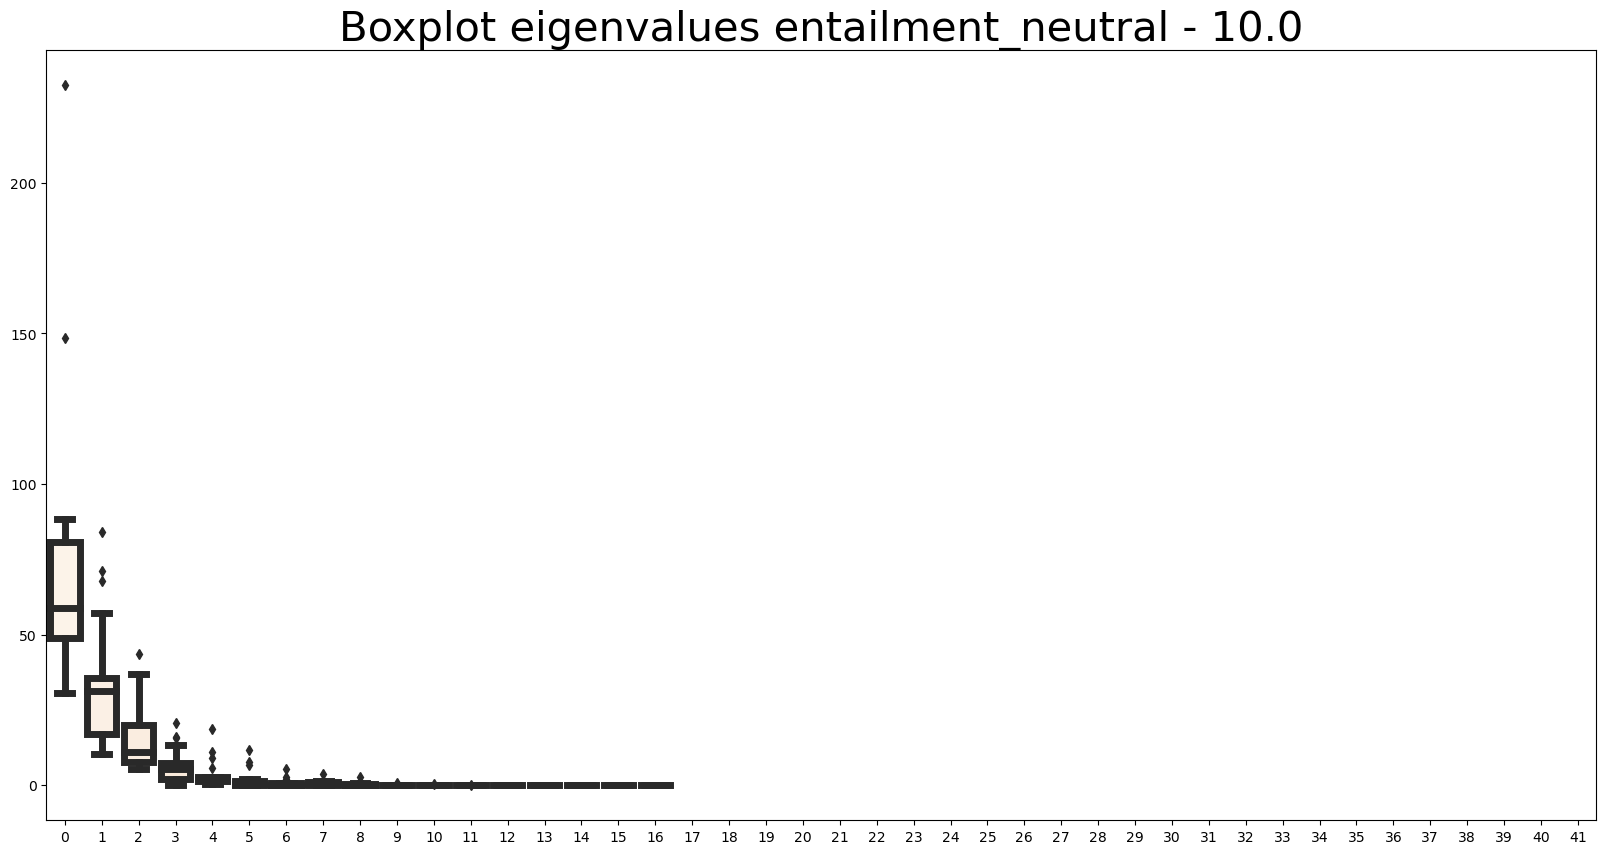

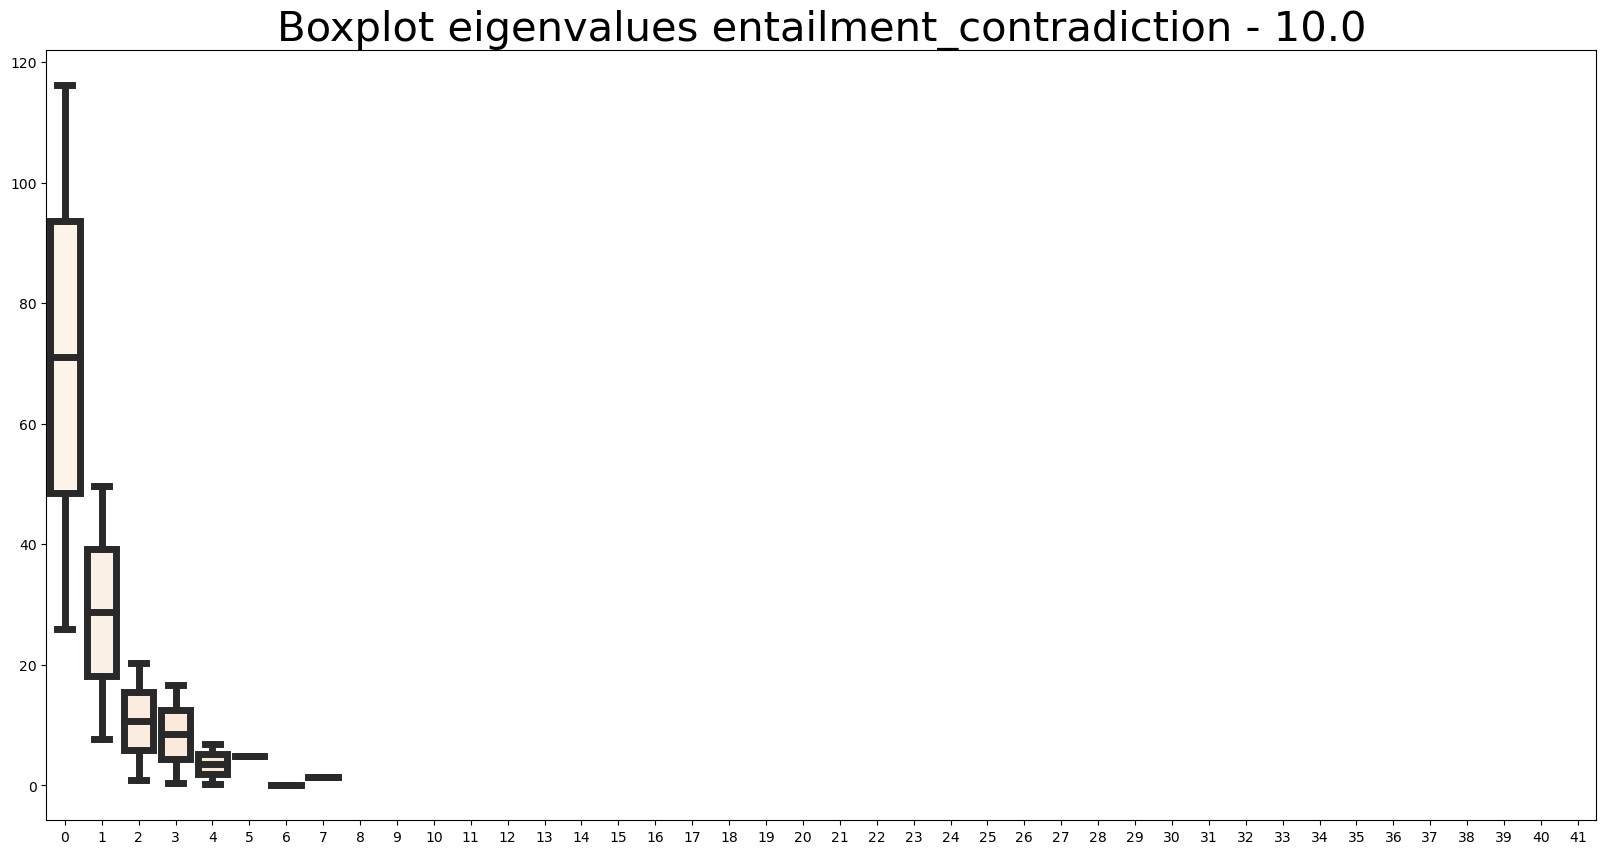

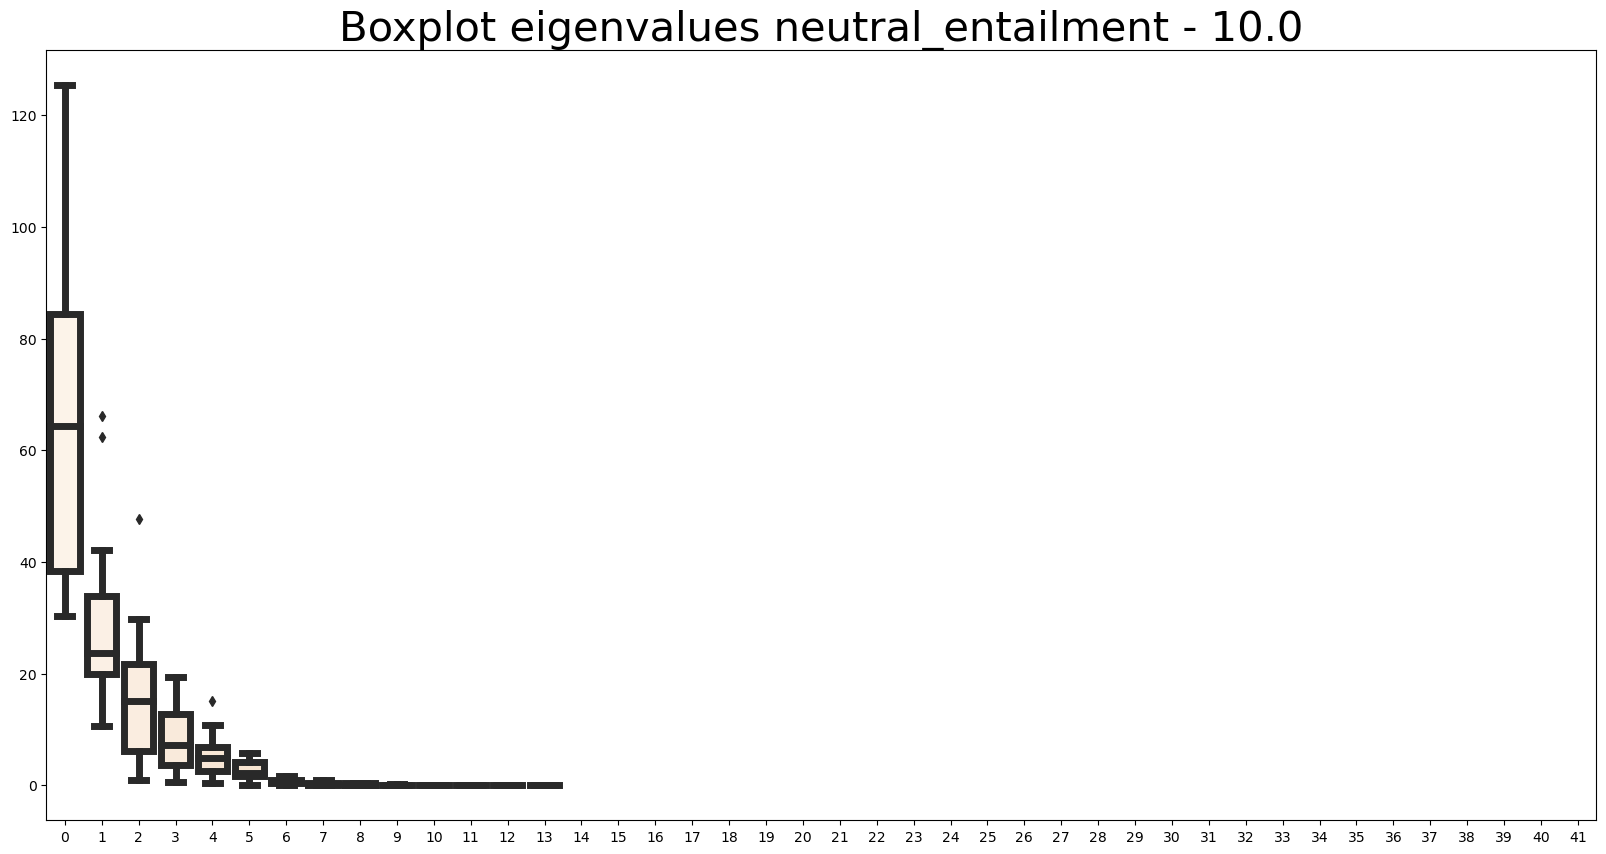

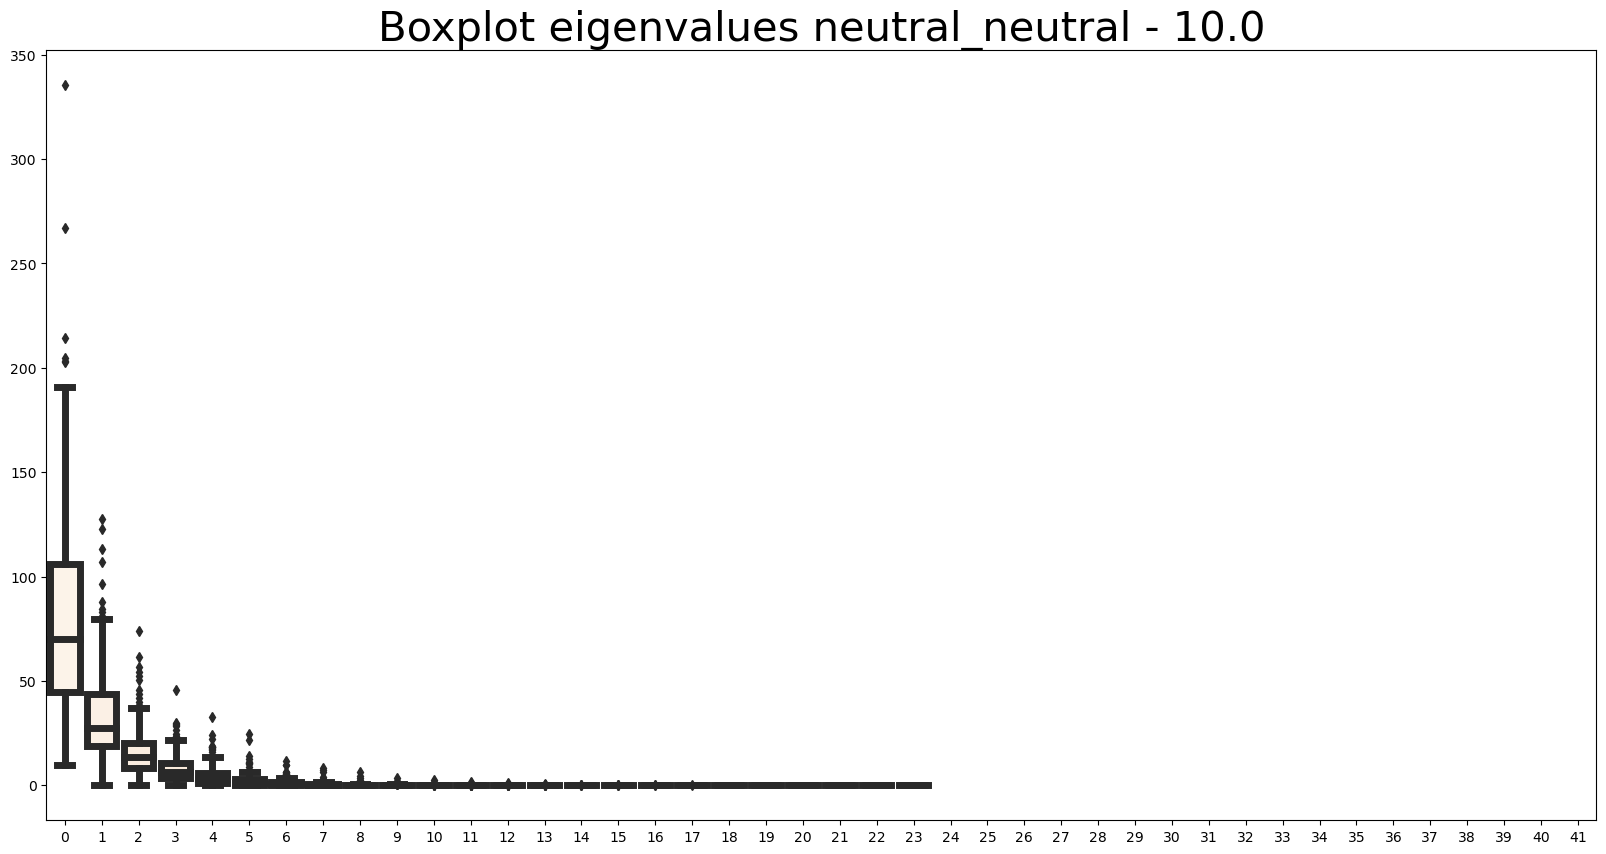

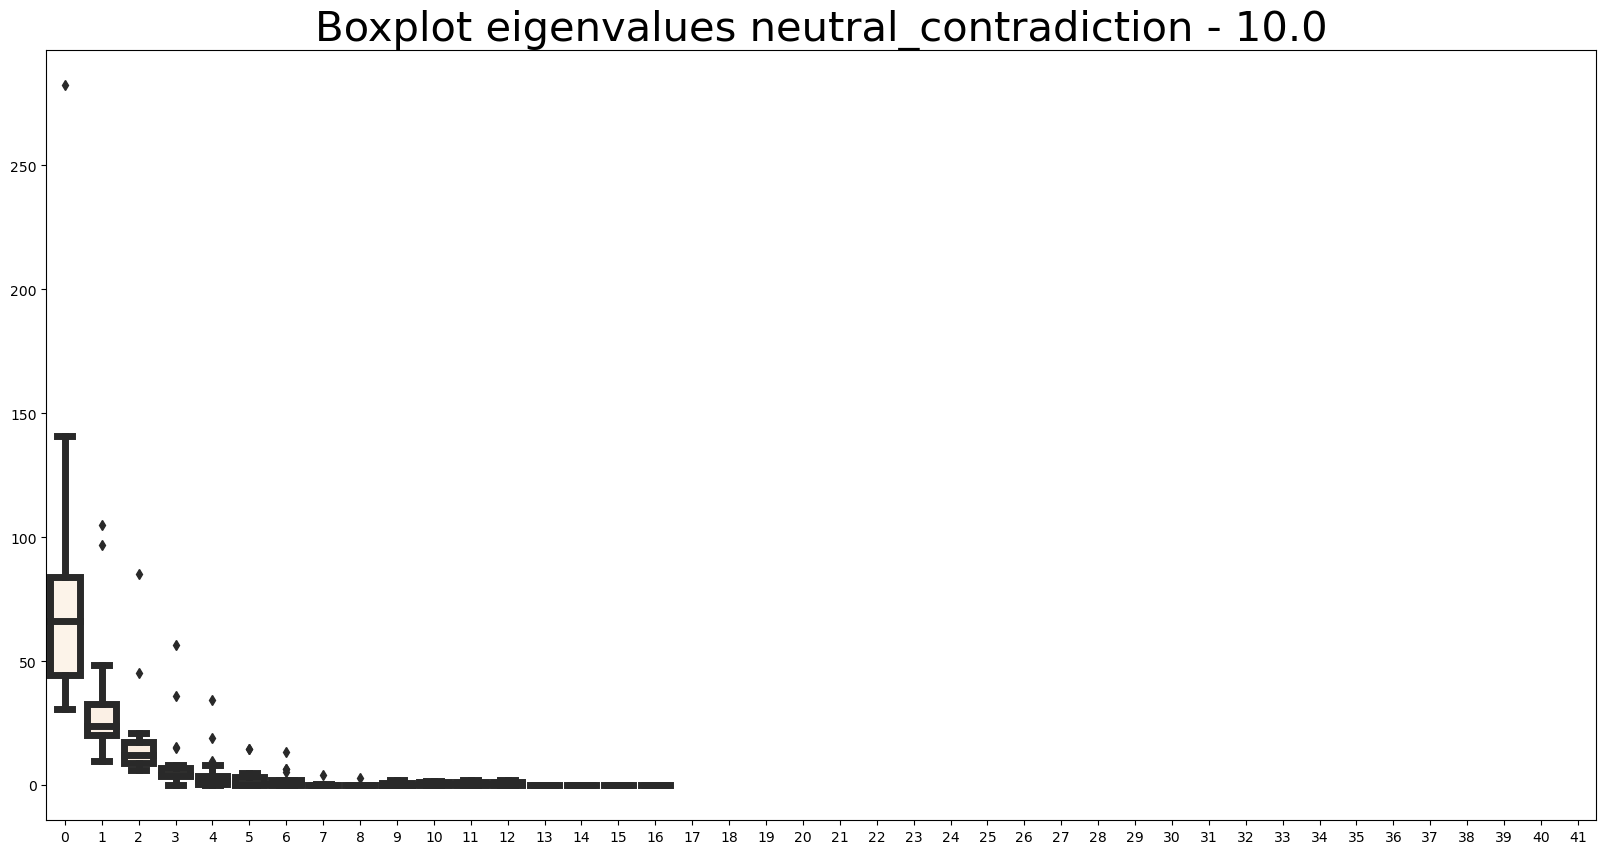

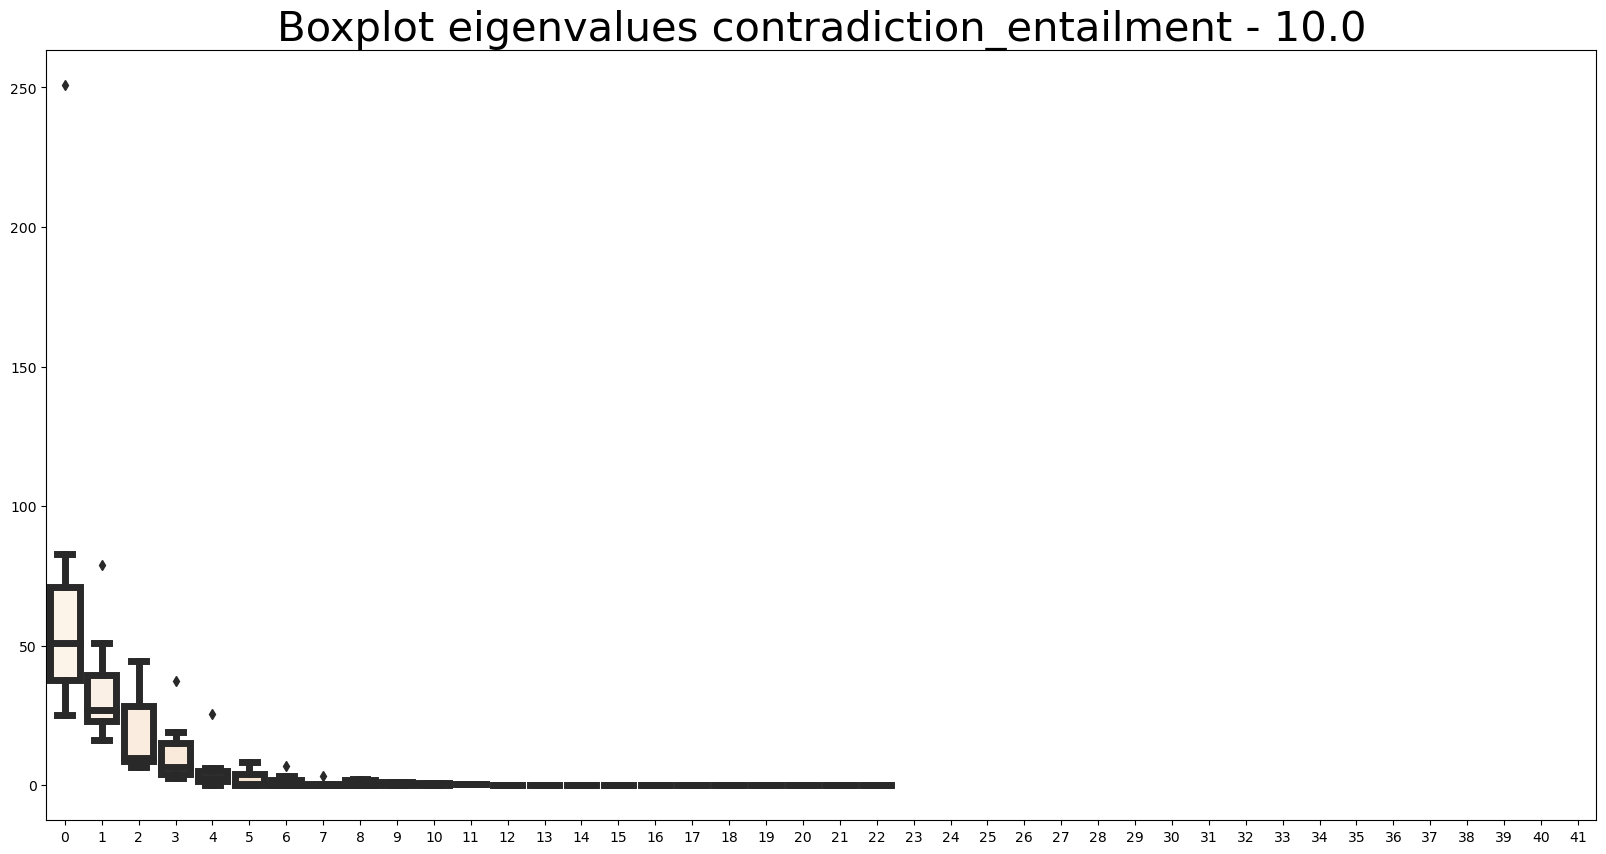

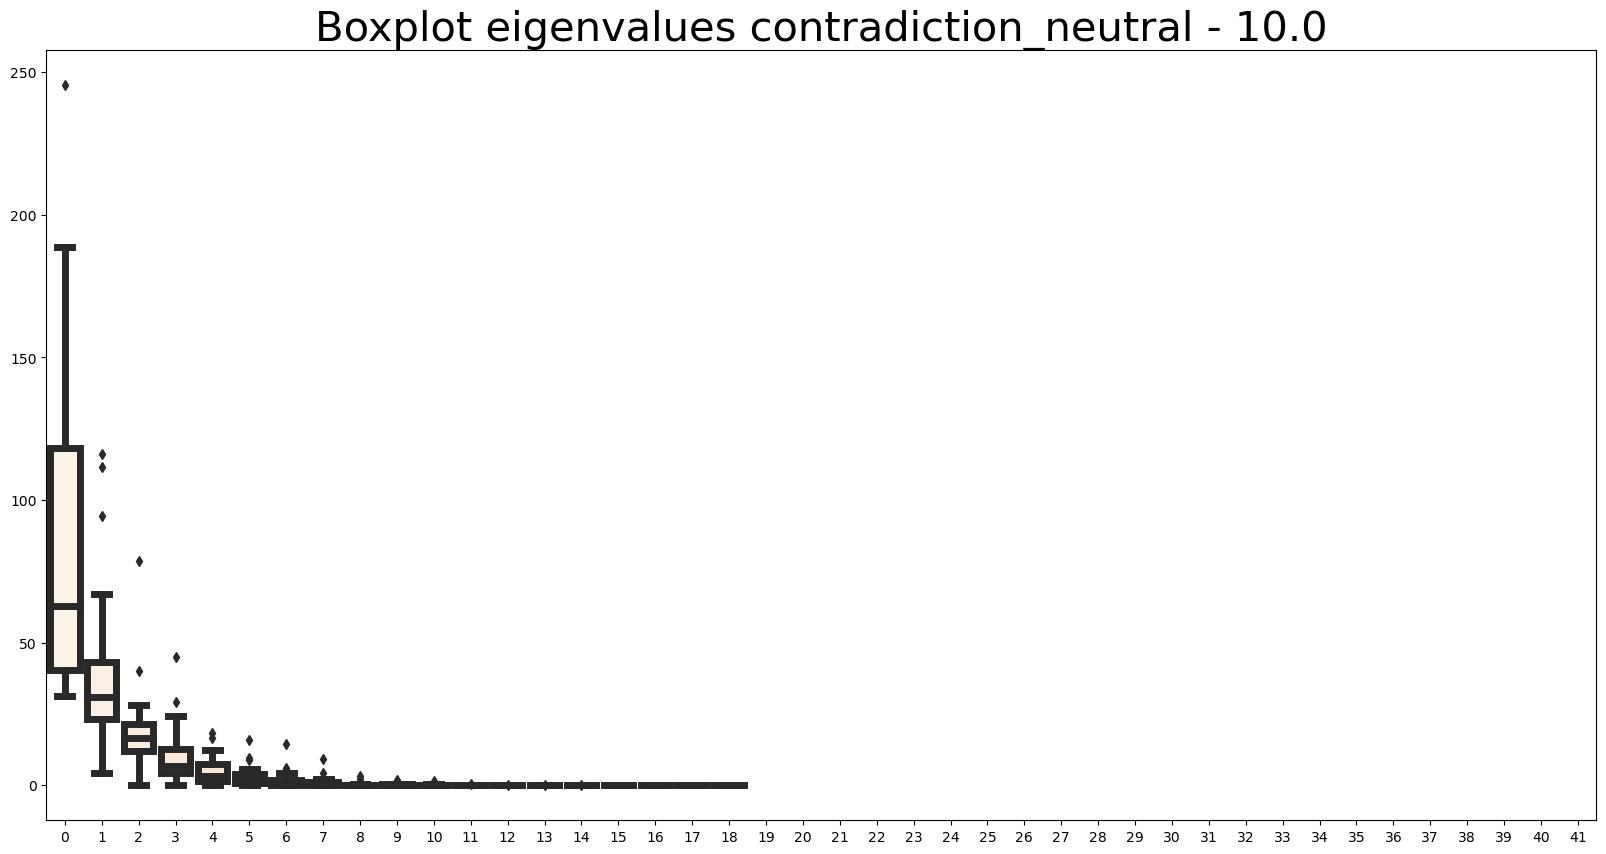

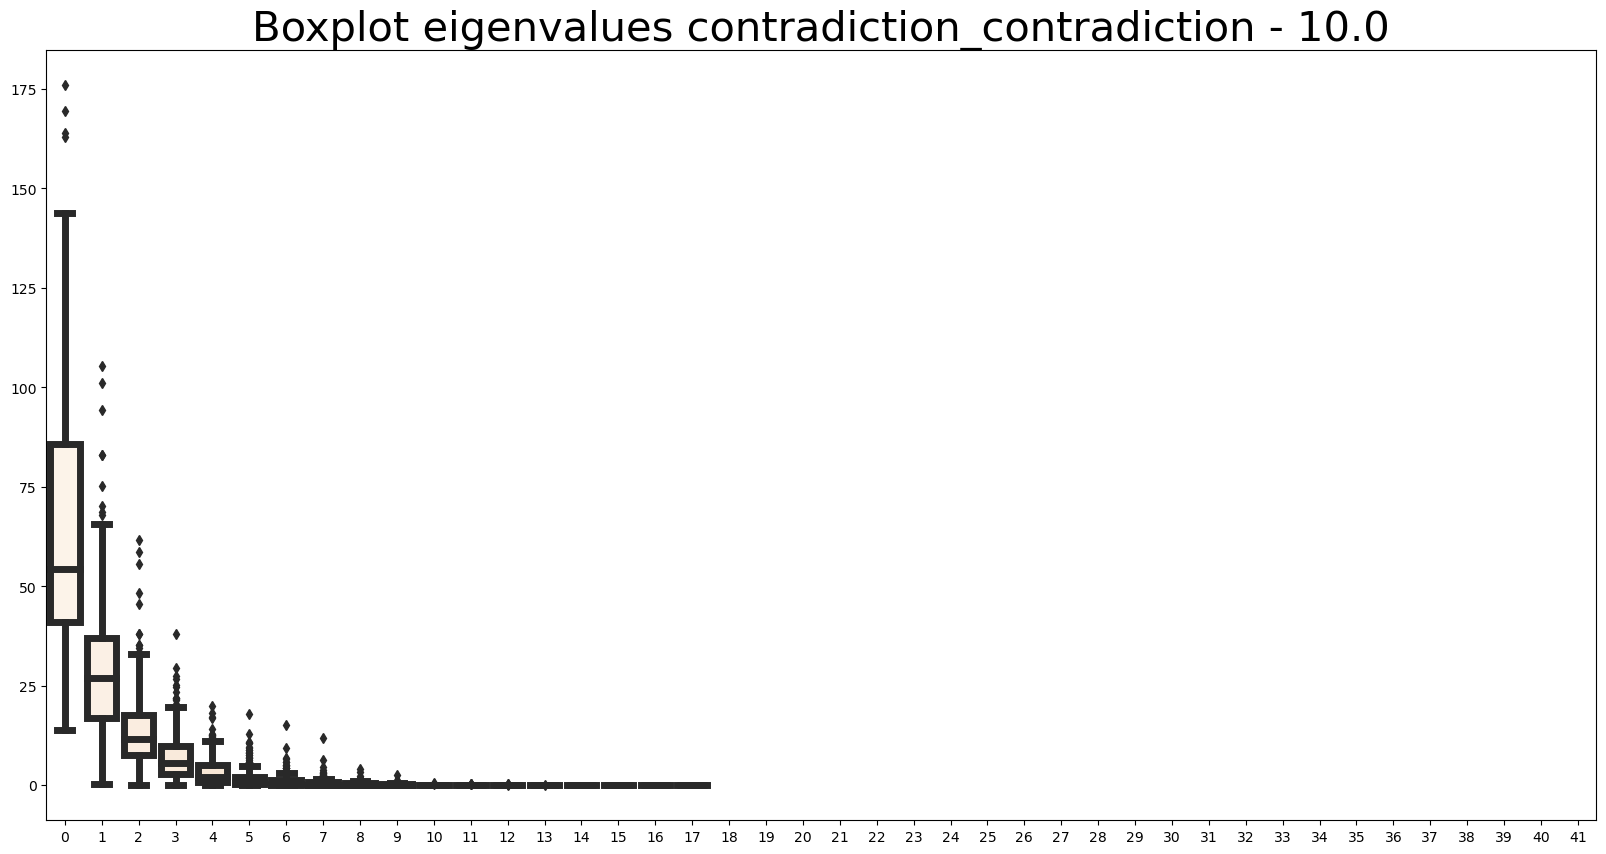

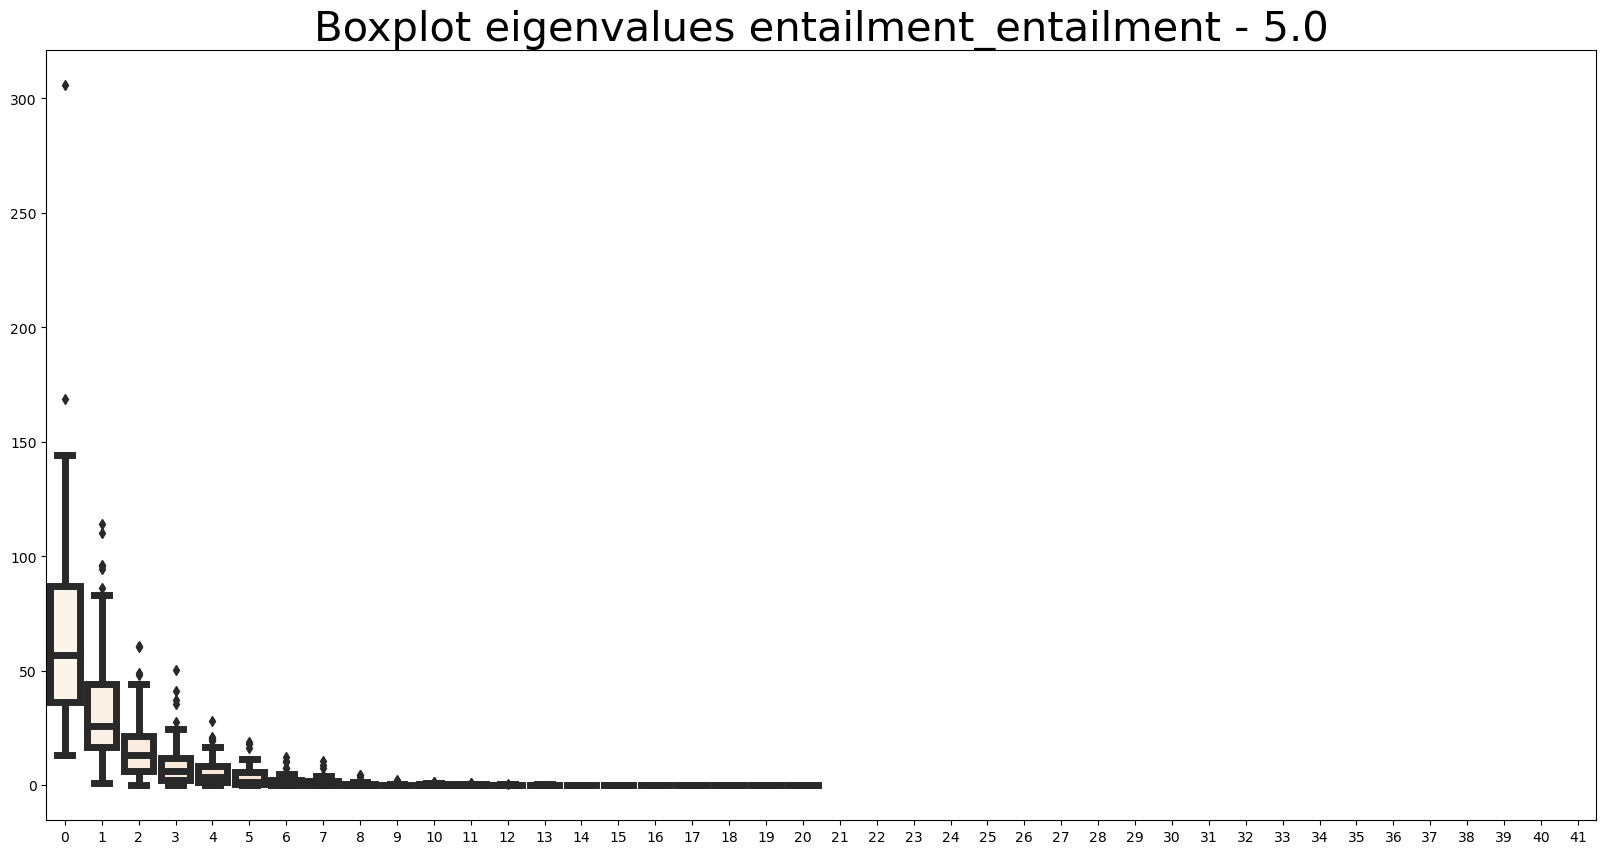

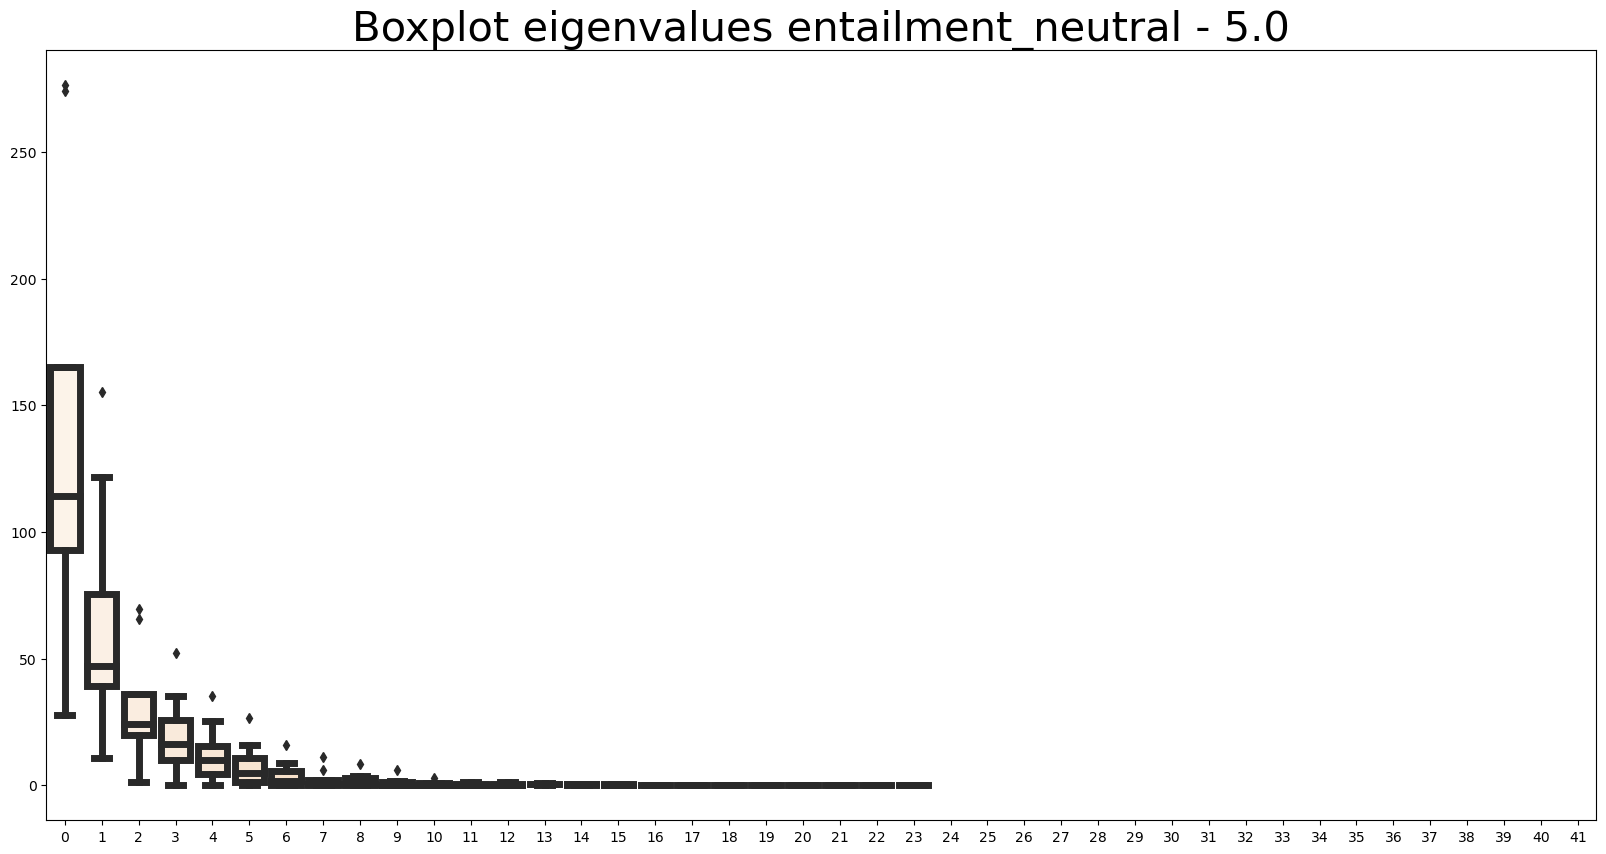

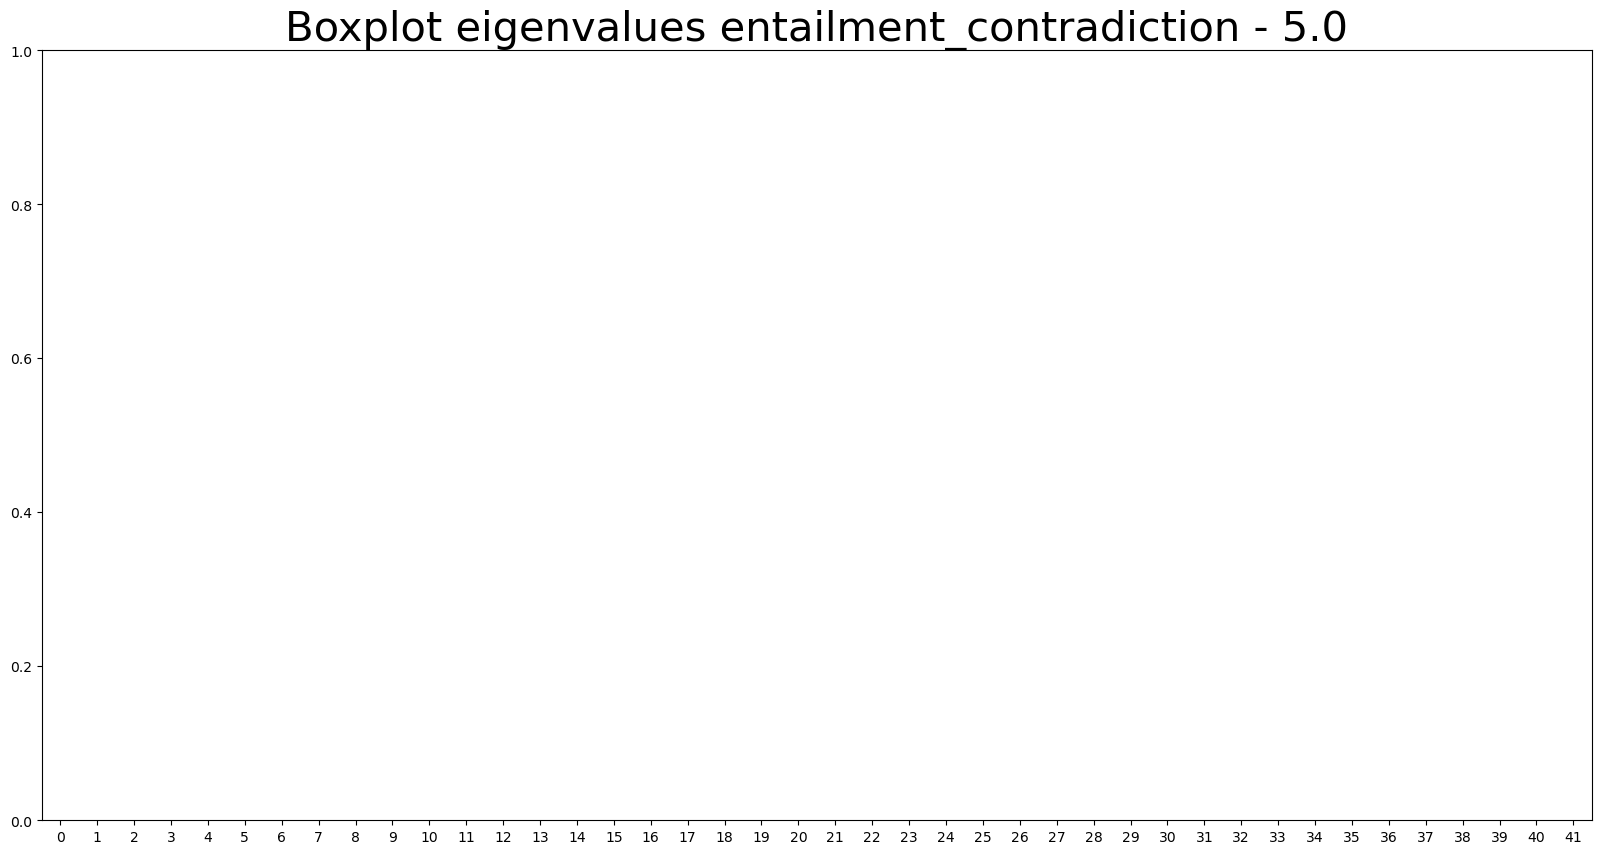

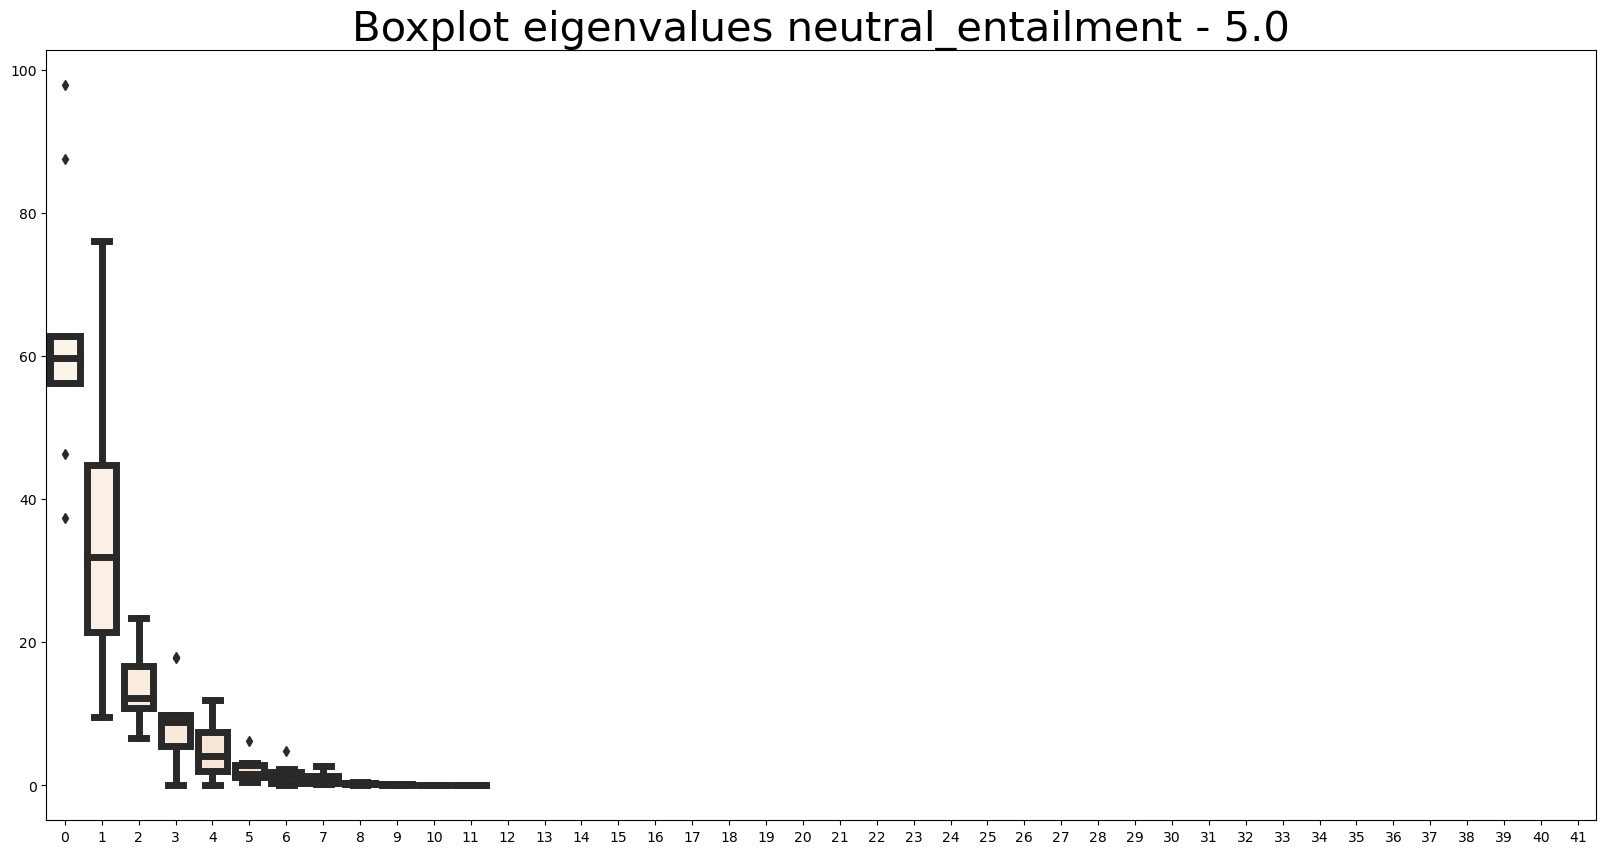

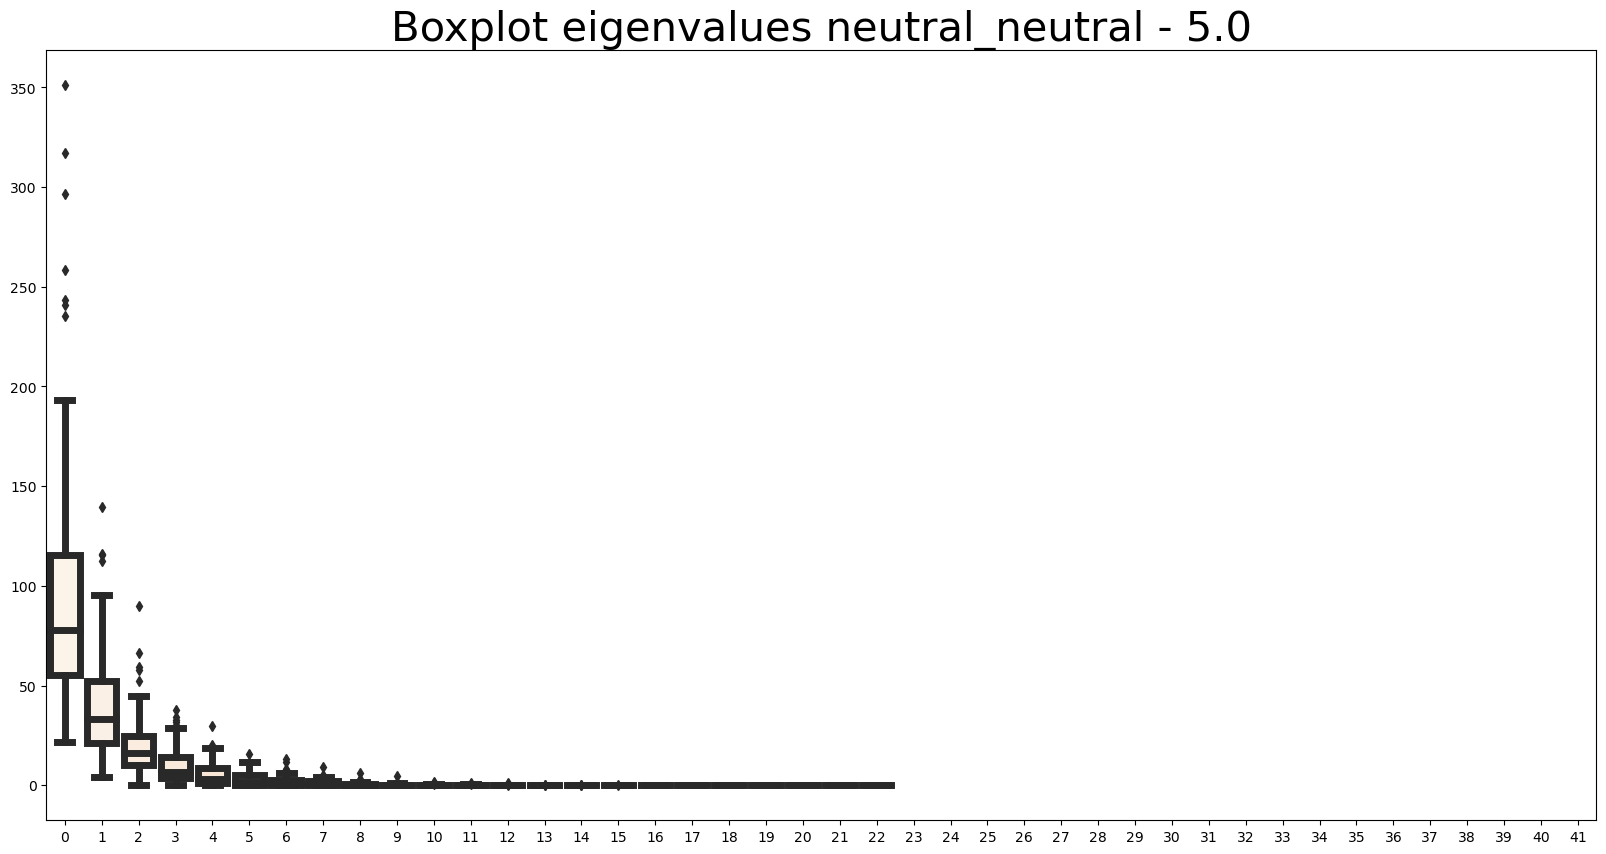

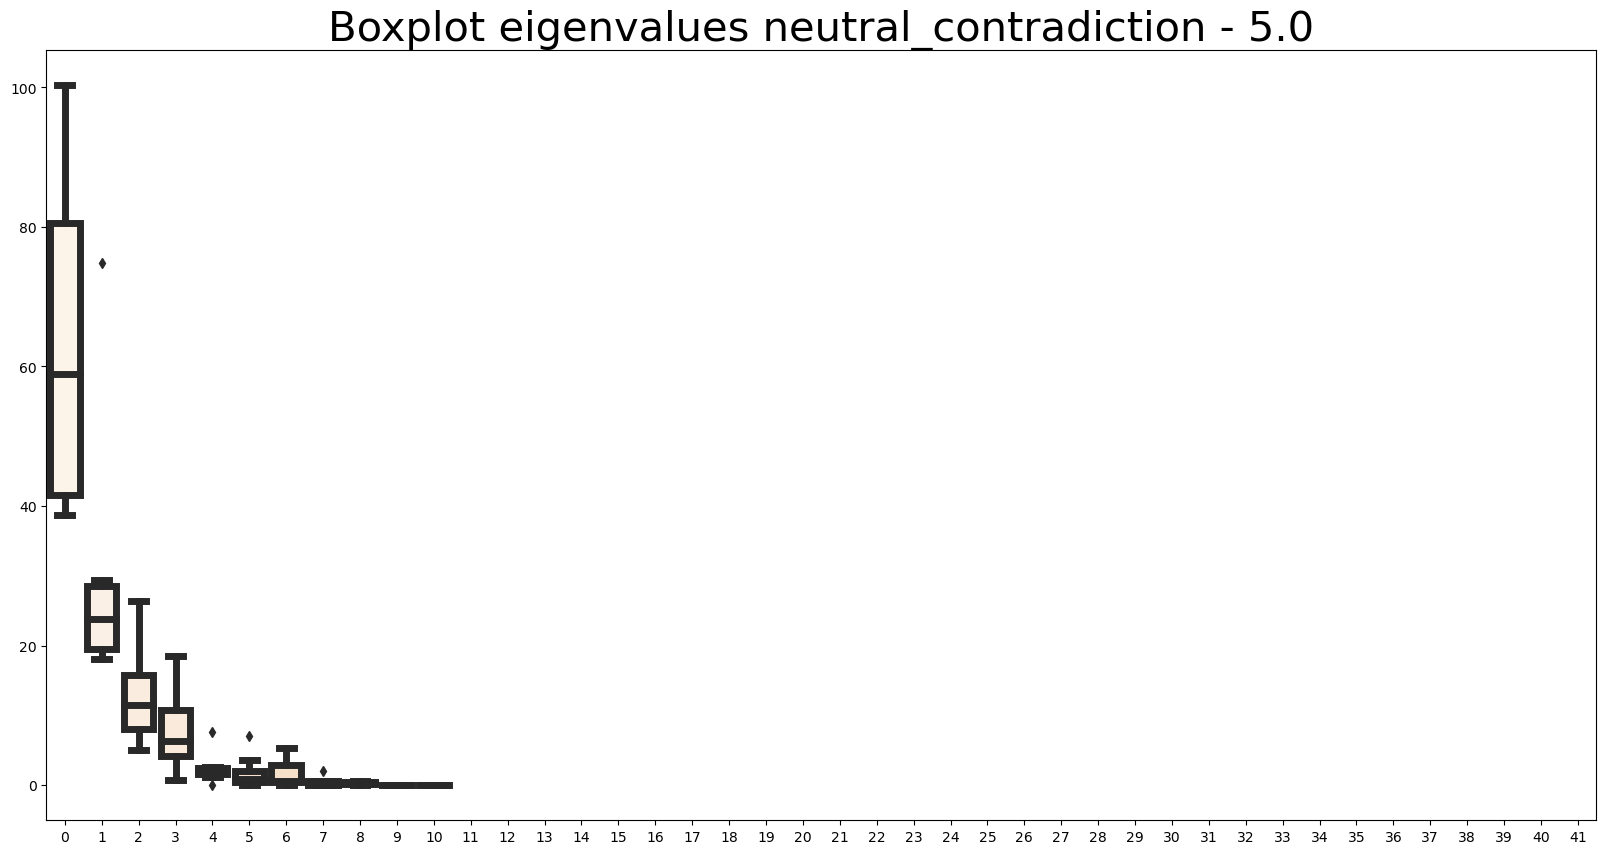

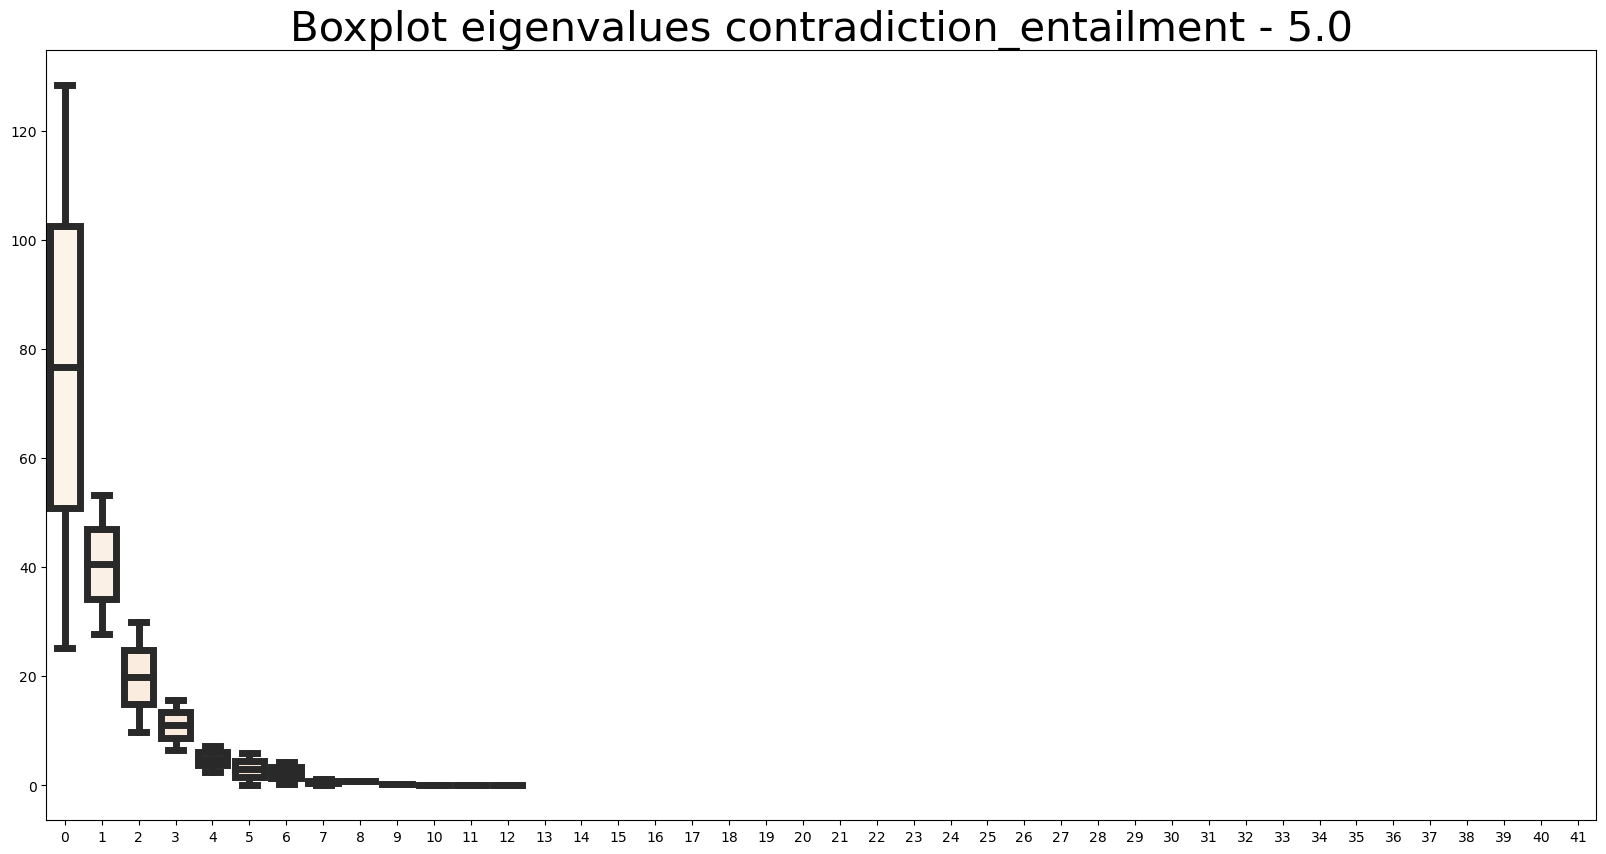

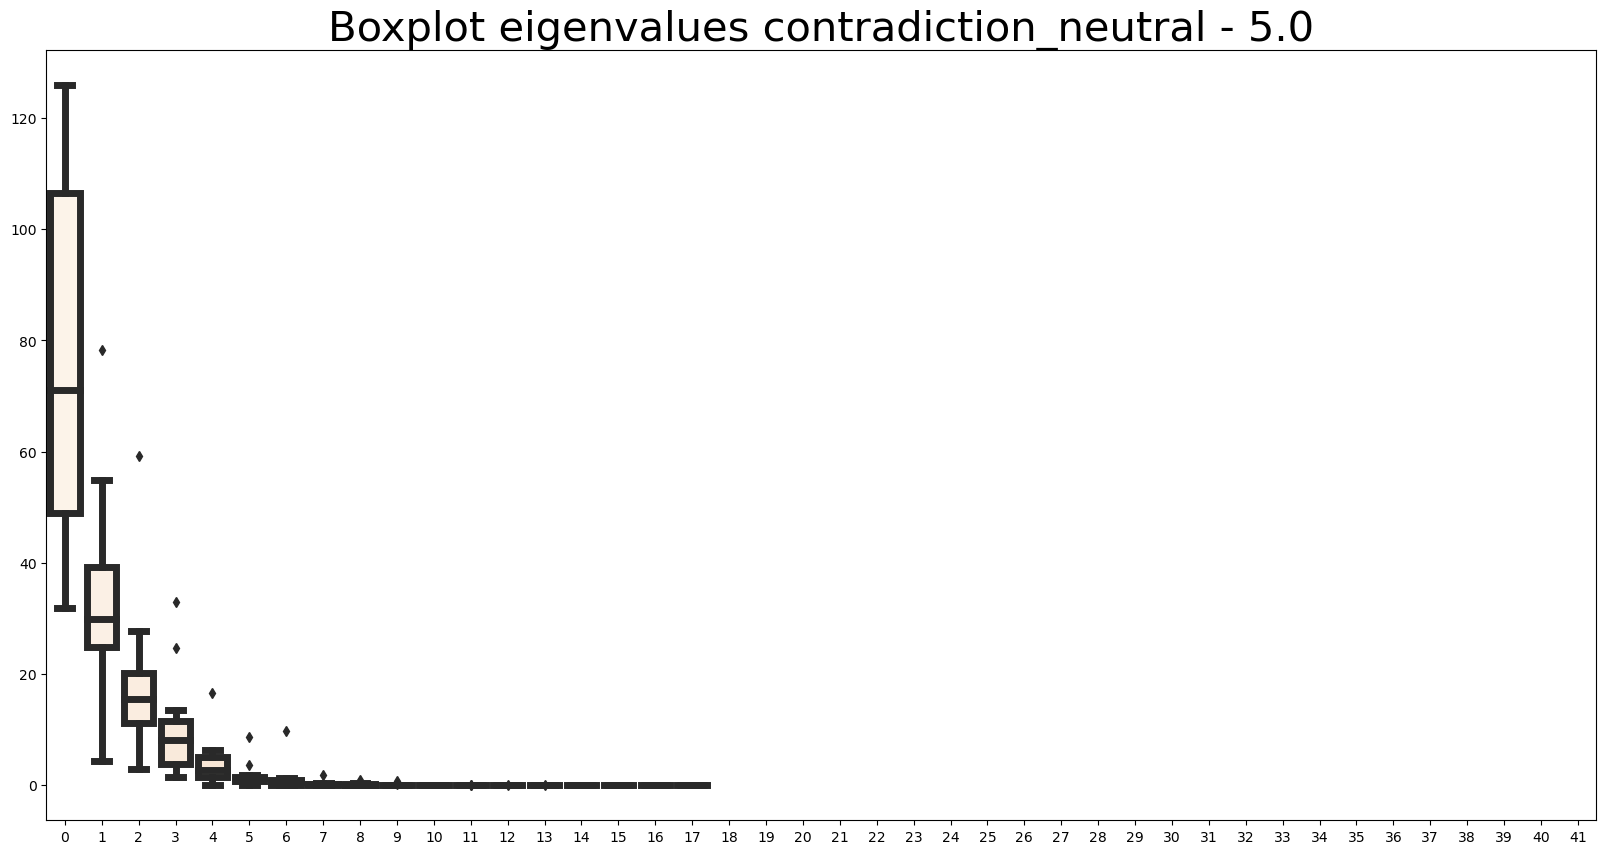

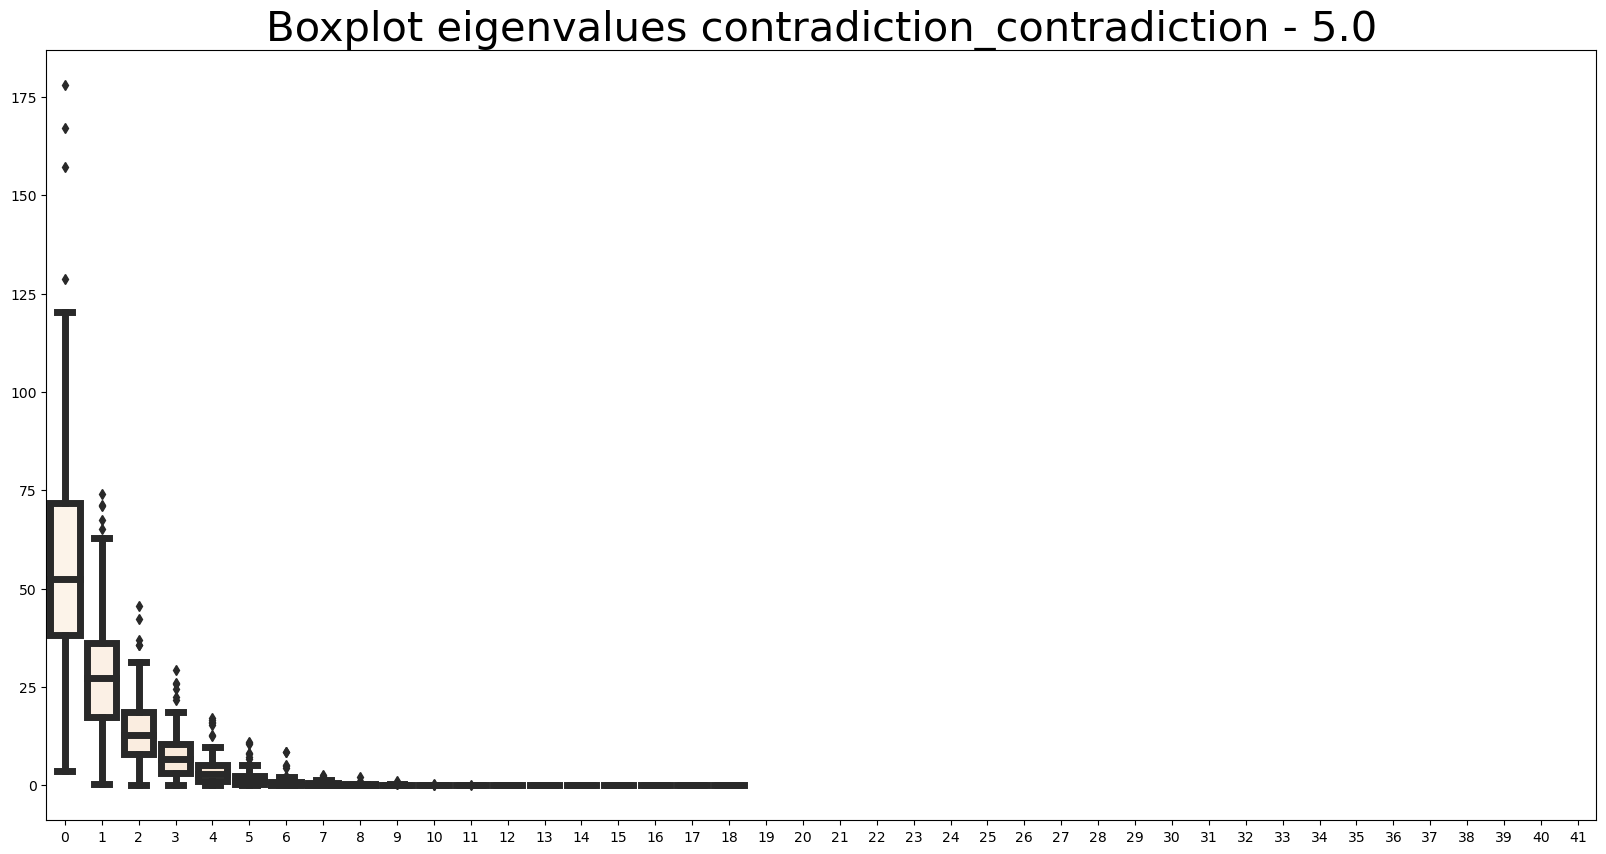

: 

In [84]:
for gb in grupos_box:
    for et in eti_box:
        df=dfn[(dfn["grupo"]==gb) & (dfn["E_P"]==et)]
        lista_eigenvalues=[]
        for index,strings in df.iterrows():
            data=strings[6]
            #print(strings["E_P"],strings["grupo"])
            #print(data[0])
            #print(data[1:])
            for i in range(42):
                columna = [float(fila[i]) for fila in data if i < len(fila)]
                #print(columna)
                lista_eigenvalues.append(columna)
            fig2 = plt.figure(figsize=(20,10))
            ax.tick_params(labelsize=10)
            ax.grid(visible=True)
            plt.title("Boxplot eigenvalues "+et+" - "+str(gb),fontsize=30)
            bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")
            break
        

In [49]:
lista_eigenvalues

[[42.08087,
  62.523476,
  29.60789,
  44.297653,
  92.12063,
  60.607395,
  42.469032,
  119.341385,
  137.86183,
  68.32848,
  72.568115,
  128.8557,
  84.73515,
  60.307728,
  49.487907,
  60.370274,
  36.55351,
  59.729183,
  48.716484,
  53.24939,
  36.488422,
  68.51858,
  34.771606,
  50.36612,
  98.3021,
  50.033985,
  37.76495,
  55.927387,
  66.861534,
  50.58563,
  53.636627,
  131.54169,
  47.412663,
  21.719042,
  40.18985,
  110.28296,
  54.602135,
  39.211994,
  33.709576,
  54.28029,
  68.82015,
  (147.6407+0j),
  74.34464,
  19.12077,
  32.718174,
  94.89795,
  144.18393,
  73.00247,
  63.791763,
  63.51944,
  71.594406,
  65.40456,
  122.21037,
  113.71737,
  35.96813,
  54.093864,
  28.649836,
  67.51706,
  48.720364,
  149.0954,
  71.75541,
  30.414722,
  57.593525,
  64.0102,
  65.64974,
  78.51613,
  77.28594,
  35.65043,
  49.371784,
  91.58573,
  60.141727,
  26.179317,
  25.00515,
  41.824158,
  41.32215,
  104.77101,
  49.932194,
  30.596998,
  55.64651,
  (19

/home/david/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x7efd4478b760>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41')])

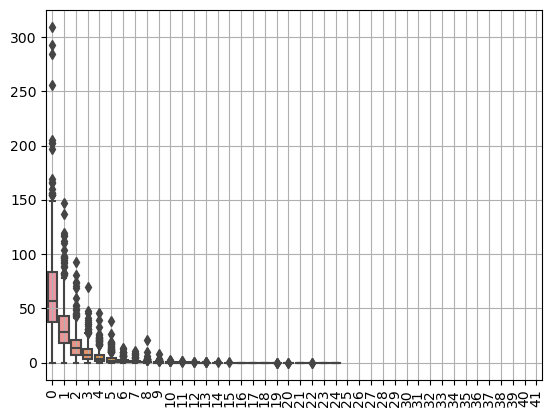

In [50]:
sns.boxplot(data=lista_eigenvalues)
plt.grid()
plt.xticks(np.arange(42),rotation=90)

/home/david/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


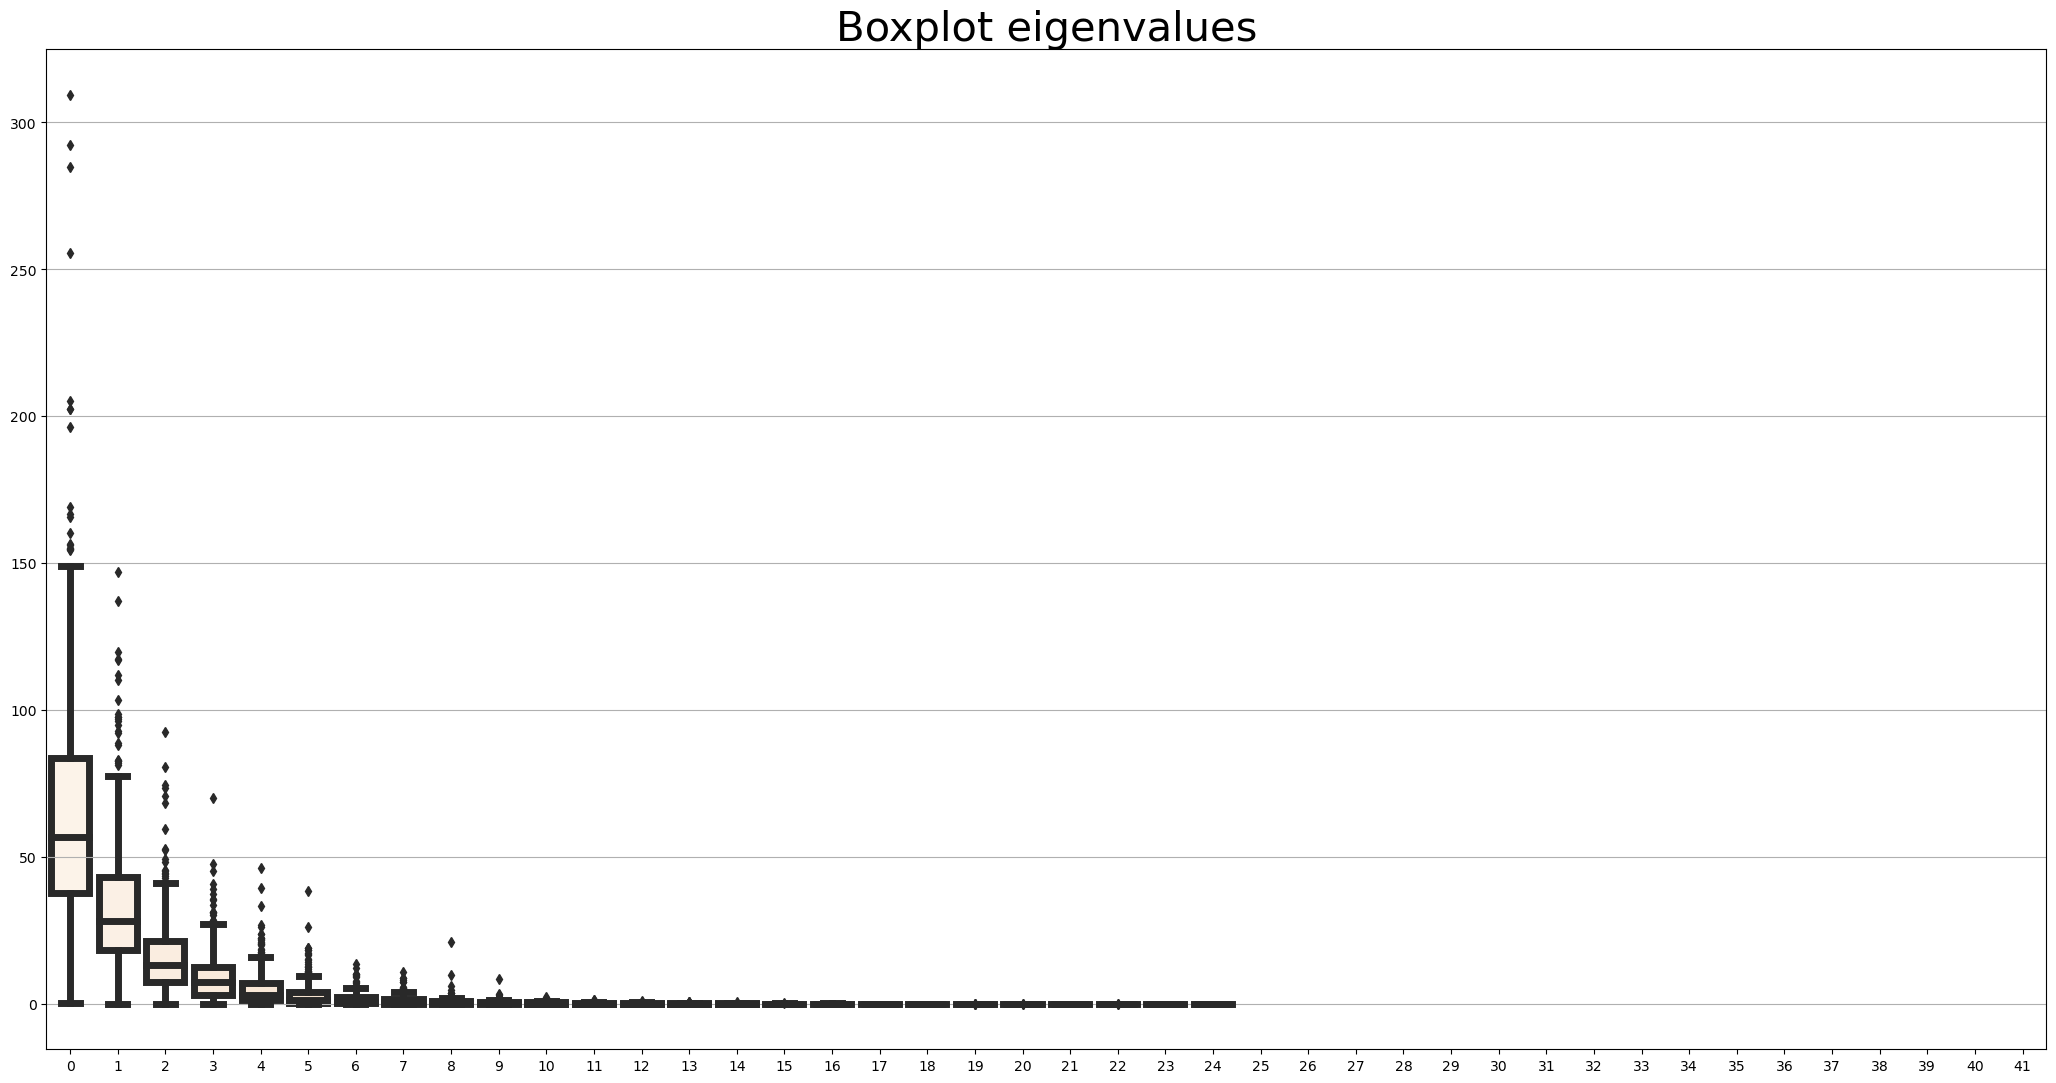

In [52]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=10)
ax.grid(visible=True)
plt.title("Boxplot eigenvalues",fontsize=30)
bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")

In [34]:
s=np.transpose(m)*m

In [35]:
m_n=normalize_2d(s)

In [36]:
x, v = np.linalg.eig (m_n)

In [37]:
x

array([ 8.2198036e-01,  4.4953737e-01,  3.3778334e-01,  9.0338141e-02,
        1.5342963e-03, -1.3962749e-03, -1.1090860e-03,  5.2070891e-04,
       -8.6099935e-05,  2.1168440e-04,  1.3158313e-04,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00], dtype=float32)

In [38]:
v

array([[-1.8347610e-03,  8.8550820e-04, -2.9179843e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.8047651e-02,  5.6653398e-01, -8.1549281e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.6764369e-01,  7.7380818e-01,  5.7283217e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.0000000e+00]], dtype=float32)

In [30]:
len(v)

42